# Выпускной проект: Промышленность

### Задание по проекту:

Чтобы оптимизировать производственные расходы, металлургический комбинат решил уменьшить потребление электроэнергии на этапе обработки стали. Необходимо построить модель, которая предскажет температуру стали.

### Описание этапа обработки

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

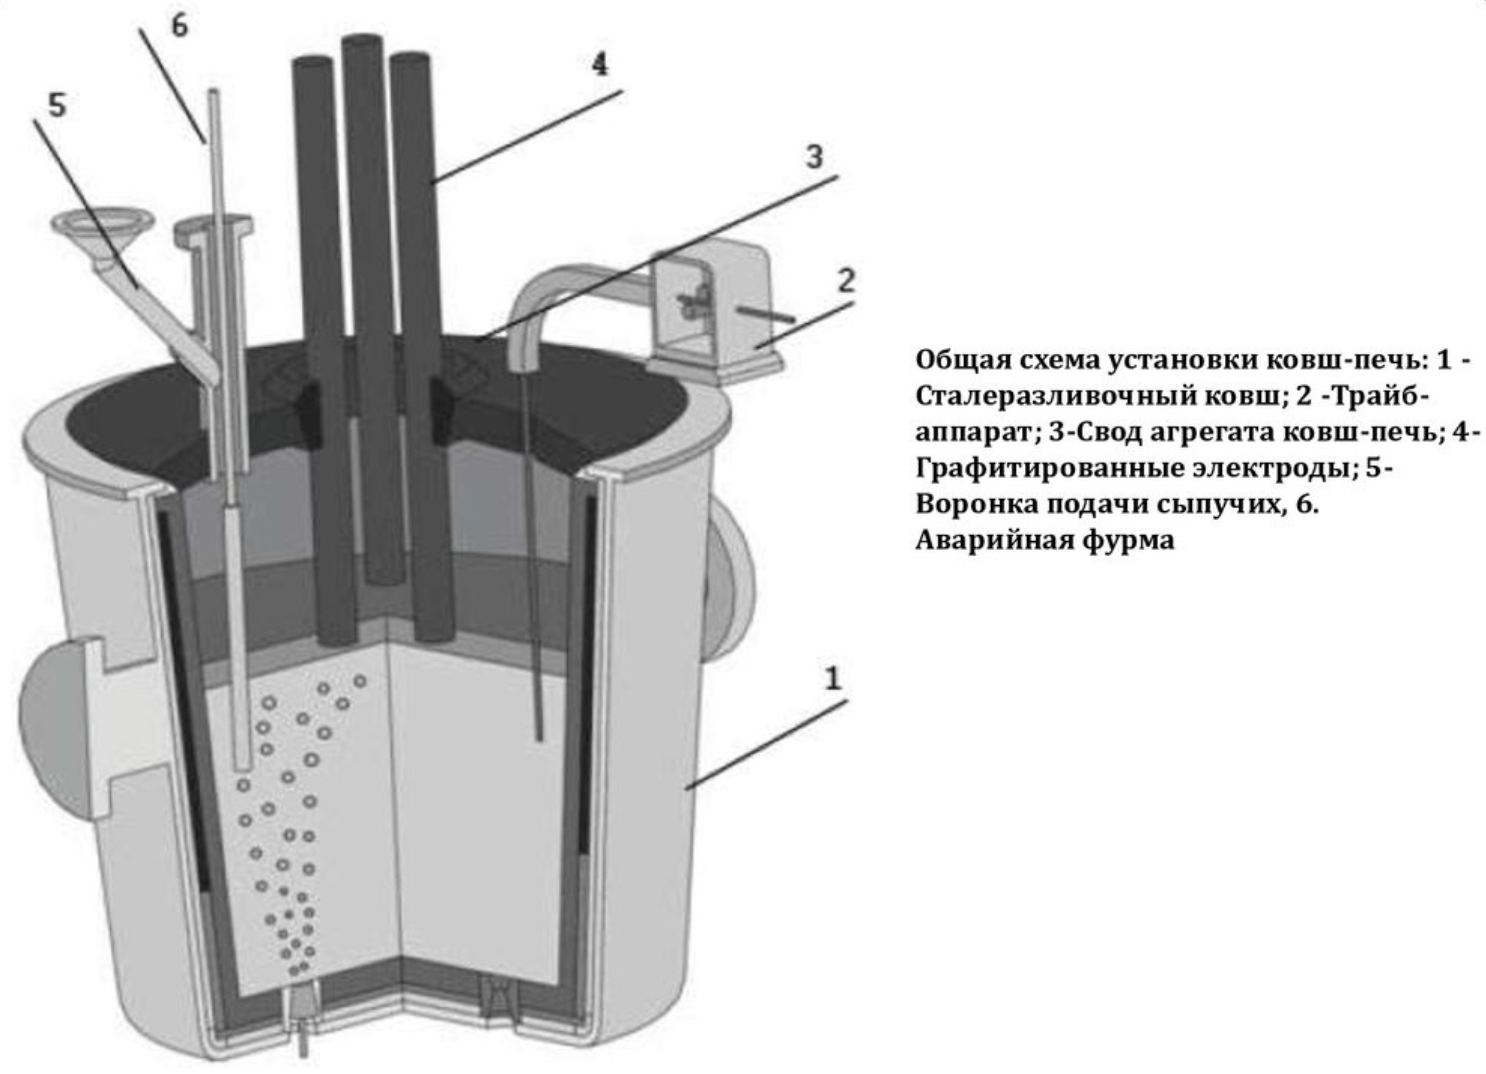


Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов (Bulk) или проволоку (Wire) через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).




### План работы:
    
- ШАГ 1. Исследовательский анализ данных (этап 1):

    - Импортируем библиотеки
    - Зафиксируем константы
    - Описание данных и их исследование:
         - Загрузим данные
         - Выведим общю информацию о данных.( рассмотрим кол-во столбцов, строк, какие типы данных,кол-во пропусков)
         - Построим графики: гистограммы, ящик с усами, корреляция, посмотрим как данные распределены и связаны.
         - Сделаем выводы по первому шагу и план действией по устранению замечаний в ШАГе 2
 
 
- ШАГ 2. Проведение предобработки данных (этап 2):

         - Переведем название столбцов в правильному виду.
         - Переведем значения к нужному типу данных.
         - Выполним заполнение пустых строк необходимым знаечнием.
         - Выполним удаление неинформативных строк, которые являются очевидными ошибками. При удалении строки фиксируем информацию есть ли связь с другими таблицами и в других таблицах данную связь тоже удаляем.
         - Выполним объединение нужных данных в одну таблицу.
         - Выделим в данной таблице признаки и целевой признак для последющей задачи обучения модели.
         - Выполним разделение собранной нашей выборки на обучающуюся и тестовую. (в соотношения 75:25).
         - При наблюдении выбросов не являющихся очевидными ошибками, то удаляем их только из обучающей выборки.
         - Выполним масштабирование данных.
         - Сделаем выводы по третьему шагу и напишем отчет.
    
- ШАГ 3. Построение модели (этап 2):

         - Обучение разных моделей и оценика их качества кросс-валидацией. 
         Модели: LinearRegression, CatBoostRegressor, LGBMRegressor. Значения будут перебираться с помощью GridSearch. Добавим необходимые метрики и модели в пункт "Импортируем библиотеки" Шага 1
         - оценка адекватности модели с помощью контсантной модели. Будем смотреть относительно среднего значения
         - Сравним полученные результаты наших моделей и выделим лучшую
         - Проверим на тестовой выборке
         - Сделаем выводы по третьему шагу 

- ШАГ 4. Выбор лучшей модели (этап 2):

         - Предсказание лучшей модели на тестовой выборке 
         - Сравнение с заданной по условию задачи метрикой 
         - Сравнение c константной модель.
     
- ШАГ 5. Написание отчета (этап 3):
         - выводы по всей работе и рекомендации



## Исследовательский анализ данных

### Импортируем библиотеки

In [1]:
# Шаг 2
# установим последнюю версию scikit-learn
!pip install scikit-learn==1.1.3

In [2]:
!pip install lightgbm

In [3]:
#Шаг 1
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import re 

import sklearn

from sklearn.model_selection import (
    GridSearchCV,
    train_test_split,
    cross_val_score
)

from sklearn.preprocessing import StandardScaler

import lightgbm as lgb

from sklearn.dummy import DummyRegressor

from catboost import CatBoostRegressor

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error

In [4]:
#версия pandas
print ('',pd.__version__)

 1.2.4


In [5]:
#версия numpy
print (np.__version__)

1.21.1


In [6]:
#версия seaborn
print (sns.__version__)

0.11.1


In [7]:
#версия matplotlib
print (matplotlib.__version__)

3.3.4


In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
# игнорирование предупреждений
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

In [10]:
# константа
RANDOM_STATE = 50623

### Описание данных 

Данные состоят из файлов, полученных из разных источников:

- `data_arc_new.csv` — данные об электродах;
- `data_bulk_new.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time_new.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas_new.csv` — данные о продувке сплава газом;
- `data_temp_new.csv` — результаты измерения температуры;
- `data_wire_new.csv` — данные о проволочных материалах (объём);
- `data_wire_time_new.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.


### Загружаем и получаем информацию о датасете

**Считаем данные из csv-файлов в датафрейм и сохраним в переменные data.**


In [11]:
data_arc_new = pd.read_csv('/datasets/data_arc_new.csv')
data_bulk_new = pd.read_csv('/datasets/data_bulk_new.csv')
data_bulk_time_new = pd.read_csv('/datasets/data_bulk_time_new.csv')
data_gas_new = pd.read_csv('/datasets/data_gas_new.csv')
data_temp_new = pd.read_csv('/datasets/data_temp_new.csv')
data_wire_new = pd.read_csv('/datasets/data_wire_new.csv')
data_wire_time_new = pd.read_csv('/datasets/data_wire_time_new.csv')

### Функция выода основной информации по датафреймам

In [12]:
def all_info(data,name_data):
    print('-----------------------','\033[1m'+name_data+'\033[0m','-----------------------')
    print('')
    
    print('')
    print('\033[1m'+'1) Вывод первых 5 строк датафрейма'+'\033[0m')
    display(data.head())
    print()
    print('\033[1m'+'2) Размер выборки.'+'\033[0m')
    print('')
    print(data.shape)
    print('')
    print('\033[1m'+'3) Выведим основную информацию о датафрейме.'+'\033[0m')
    print('')
    display(data.info())
    
    print('')
    print('Посмотрим на уникальные значения в столбцах базы данных.')
    print('')
    for j in data.columns:
        print('Кол-во уникальных значений в столбце', j, ':', data[j].nunique())
        print(pd.Series(data[j]).sort_values().unique())
        print('')
    
    
    a = []
    b = []
    c = []
    count = 0
    for value in data.columns:
        a.append(data[value].isna().sum())
        b.append((data[value].isna().sum()/len(data))*100)
        c.append(value)
        count += 1

    f = pd.DataFrame( {'name_columns': pd.Series(c),
                       'count': pd.Series(a),
                      'count,%': pd.Series(b)}
                    )
    print('')
    print('\033[1m'+'4) Таблица пропусков по столбцам.'+'\033[0m')
    print('')
    display(f.sort_values(by=['count'], ascending=False))
    print('')
    print('Колв-во столбцов с пропусками:', len(f[f['count']>0]))
    print('')
    
    print('\033[1m'+'5) Построение матрицы пропущенных значений'+'\033[0m')
    colours = ['#993366', '#FFFF00']
    sns.heatmap(data.isnull(), cmap=sns.color_palette(colours))
    
    plt.title('Матрица пропущенных значений набора данных', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
    
    print('\033[1m'+'6) Кол-во уникальных дупликатов.'+'\033[0m')
    print('')
    print('Уникальных дупликатов:', data.duplicated().sum())
    print('')
    print('')
    print('\033[1m'+'7) Выведим общую информацию о данных в столбцах.'+'\033[0m')
    print('')
    display(data.describe())
    print('')
    print('\033[1m'+'8) Построение "ящика с усами"'+'\033[0m')
    print('')
    plt.figure(figsize=(15,6))
    sns.boxplot(data=data)
    plt.title('График "ящика с усами" для всех столбцов датасета')
    plt.show()
    
    print('\033[1m'+'9) Построение общей гистограммы для всех числовых столбцов таблицы'+'\033[0m')
    print('')
    data.hist(bins = 100, figsize=(15,10))
    plt.show();
    print('')
    
    print('\033[1m'+'10) Корреляция между столбцами'+'\033[0m')
    print('')
    print('Посчет корреляции')
    display(data.corr())
    print('')
    print('Построение графиков')
    pd.plotting.scatter_matrix(data, figsize=(15, 15))
    plt.show()
    print('')
    

#### Данные об электродах

----------------------- Данные об электродах -----------------------


1) Вывод первых 5 строк датафрейма


key Начало нагрева дугой  Конец нагрева дугой  Активная мощность  \
0    1  2019-05-03 11:02:14  2019-05-03 11:06:02           0.305130   
1    1  2019-05-03 11:07:28  2019-05-03 11:10:33           0.765658   
2    1  2019-05-03 11:11:44  2019-05-03 11:14:36           0.580313   
3    1  2019-05-03 11:18:14  2019-05-03 11:24:19           0.518496   
4    1  2019-05-03 11:26:09  2019-05-03 11:28:37           0.867133   

   Реактивная мощность  
0             0.211253  
1             0.477438  
2             0.430460  
3             0.379979  
4             0.643691


2) Размер выборки.

(14876, 5)

3) Выведим основную информацию о датафрейме.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


None


Посмотрим на уникальные значения в столбцах базы данных.

Кол-во уникальных значений в столбце key : 3214
[   1    2    3 ... 3239 3240 3241]

Кол-во уникальных значений в столбце Начало нагрева дугой : 14876
['2019-05-03 11:02:14' '2019-05-03 11:07:28' '2019-05-03 11:11:44' ...
 '2019-09-06 17:06:48' '2019-09-06 17:21:58' '2019-09-06 17:24:54']

Кол-во уникальных значений в столбце Конец нагрева дугой : 14876
['2019-05-03 11:06:02' '2019-05-03 11:10:33' '2019-05-03 11:14:36' ...
 '2019-09-06 17:09:52' '2019-09-06 17:22:55' '2019-09-06 17:26:15']

Кол-во уникальных значений в столбце Активная мощность : 13846
[0.22312  0.223238 0.223895 ... 1.444904 1.458773 1.463773]

Кол-во уникальных значений в столбце Реактивная мощность : 14707
[-7.15479924e+02  1.53777000e-01  1.53921000e-01 ...  1.22306300e+00
  1.25862800e+00  1.27028400e+00]


4) Таблица пропусков по столбцам.



name_columns  count  count,%
0                   key      0      0.0
1  Начало нагрева дугой      0      0.0
2   Конец нагрева дугой      0      0.0
3     Активная мощность      0      0.0
4   Реактивная мощность      0      0.0


Колв-во столбцов с пропусками: 0

5) Построение матрицы пропущенных значений


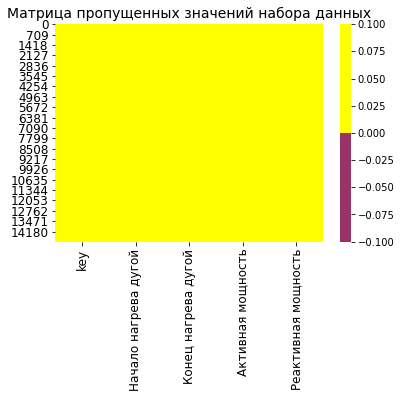

6) Кол-во уникальных дупликатов.

Уникальных дупликатов: 0


7) Выведим общую информацию о данных в столбцах.



key  Активная мощность  Реактивная мощность
count  14876.000000       14876.000000         14876.000000
mean    1615.220422           0.662752             0.438986
std      934.571502           0.258885             5.873485
min        1.000000           0.223120          -715.479924
25%      806.000000           0.467115             0.337175
50%     1617.000000           0.599587             0.441639
75%     2429.000000           0.830070             0.608201
max     3241.000000           1.463773             1.270284


8) Построение "ящика с усами"



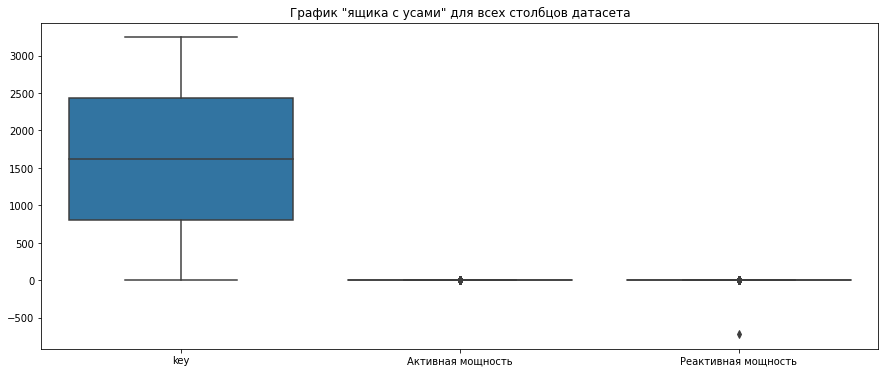

9) Построение общей гистограммы для всех числовых столбцов таблицы



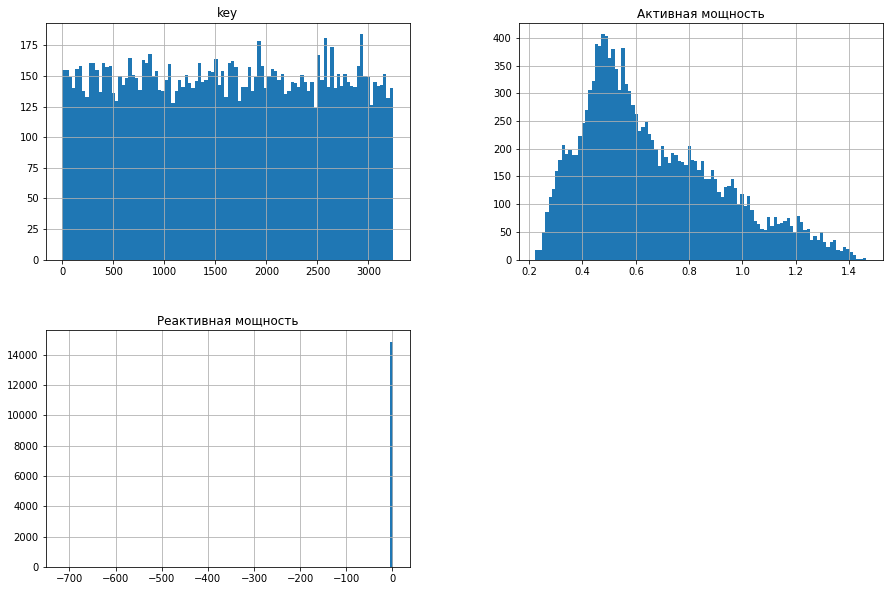


10) Корреляция между столбцами

Посчет корреляции


key  Активная мощность  Реактивная мощность
key                  1.000000          -0.010220            -0.004834
Активная мощность   -0.010220           1.000000             0.031164
Реактивная мощность -0.004834           0.031164             1.000000


Построение графиков


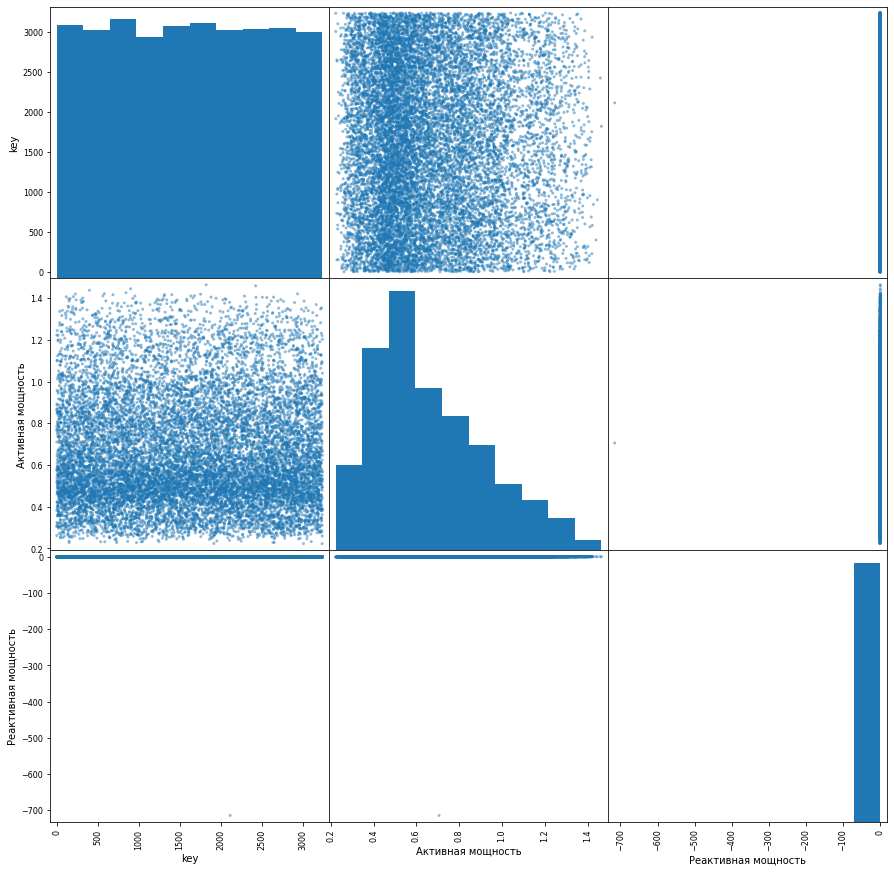

In [13]:
all_info(data_arc_new,'Данные об электродах')

На оснвании представленных данных можно выделить следующее:
- датасет содержит  14876 строк и 5 столбцами
- Значения в столбцах "Начало нагрева дугой" и "Конец нагрева дугой" необходимо будет перевести в datetime
- Пропуски в датасете отсутсвуют
- Дубликаты также отсутсвуют
- Кол-во партий: 3214
- Данные представлены за май-сентябрь 2019 года. По представленными датам и времени можно вычислить длительность нагрева дугой для каждого дйствия в партии и кол-во итераций в партии.
- Наблюдаются аномальные значения. Так в реактивной мощности всречаются аномальные значения вплодь до -715.479924. Для реактивной мощности в нашем случае это не подходит.Вероятно это ошибка измерения и партии с значением ниже нуля необходимо будет удалить
- необходимо будет столбцы все переименовать на англ язык.

Из-за аномалий и неинформативных  для нас столбцов (к примеру, номер партии) наши графики не особо получились информативными в заготовленной функции по выводу всей информации о датасете.
Рассмотрим графики по отдельности

**Построим график «ящик с усами» для реактивной и активной мощности.**

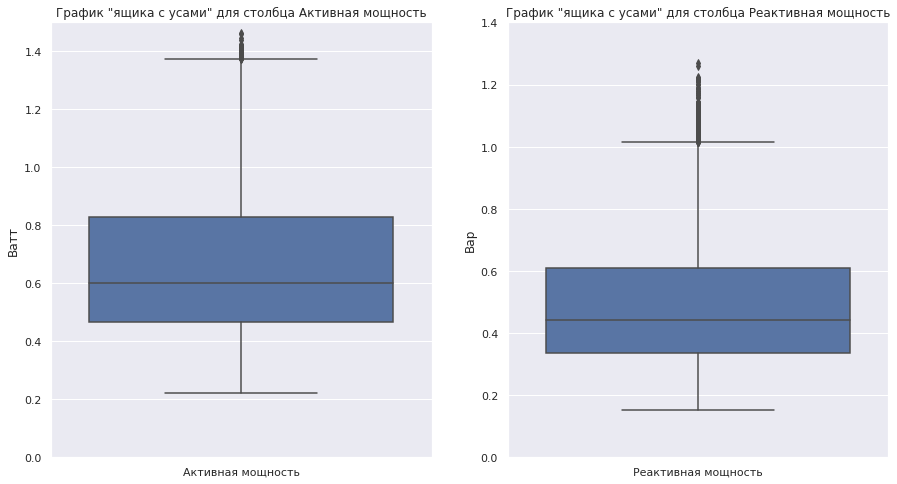

In [14]:
# построим диаграмму размаха
sns.set()
fig,axes = plt.subplots(nrows=1, ncols=2, figsize = (15,8))
sns.boxplot(data=data_arc_new.loc[:,['Активная мощность']],
            ax=axes[0]);
axes[0].set_title('График "ящика с усами" для столбца Активная мощность');
axes[0].set_ylabel('Ватт')
axes[0].set_ylim(bottom=0, top=1.5);

sns.boxplot(data=data_arc_new.loc[:,['Реактивная мощность']],
            ax=axes[1]);
axes[1].set_title('График "ящика с усами" для столбца Реактивная мощность');
axes[1].set_ylabel('Вар')
#наблюдались выбросы у реактивной мощности до -715.479924. Ограничили по оси Оу от 0 до 1.4
axes[1].set_ylim(bottom=0, top=1.4);

**Построим график распределения активной мощности.**

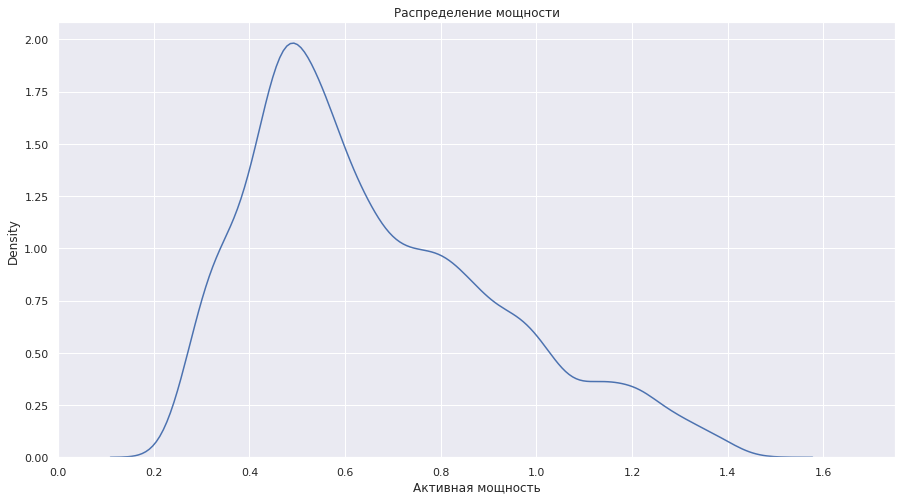

In [15]:
sns.set()
fig, ax = plt.subplots()

sns.kdeplot(data=data_arc_new, x="Активная мощность")

fig.set_figwidth(15)    #  ширина Figure
fig.set_figheight(8)    #  высота Figure

ax.set_title('Распределение мощности')
ax.set_xlim(0, 1.75);
plt.show();

**Построим график распределения  реактивной мощности.**

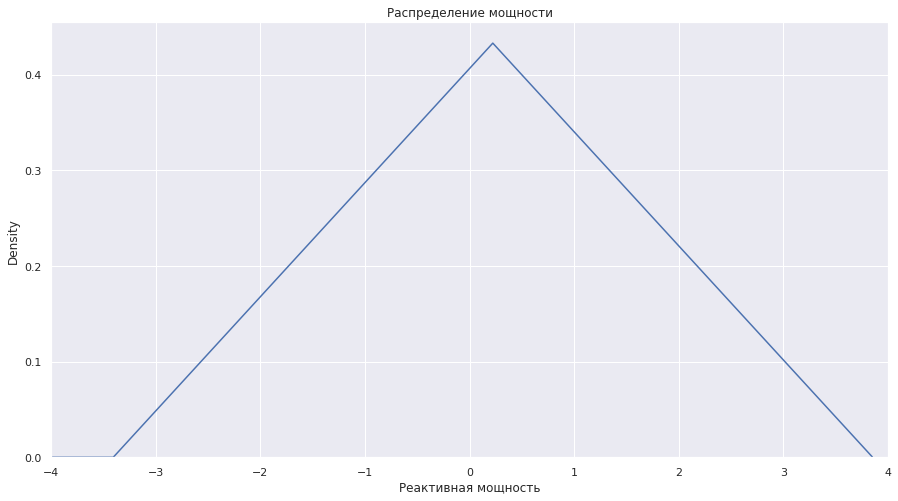

In [16]:
sns.set()
fig, ax = plt.subplots()

sns.kdeplot(data=data_arc_new, x="Реактивная мощность")

fig.set_figwidth(15)    #  ширина Figure
fig.set_figheight(8)    #  высота Figure

ax.set_title('Распределение мощности')
#огрничим построение графика в пределах от -4 до 4
ax.set_xlim(-4, 4);
plt.show();

**Корреляция между столбцами (без учета аномалий)**

Посчет корреляции
                          key  Активная мощность  Реактивная мощность
key                  1.000000          -0.010226            -0.013169
Активная мощность   -0.010226           1.000000             0.966373
Реактивная мощность -0.013169           0.966373             1.000000

Построение графиков


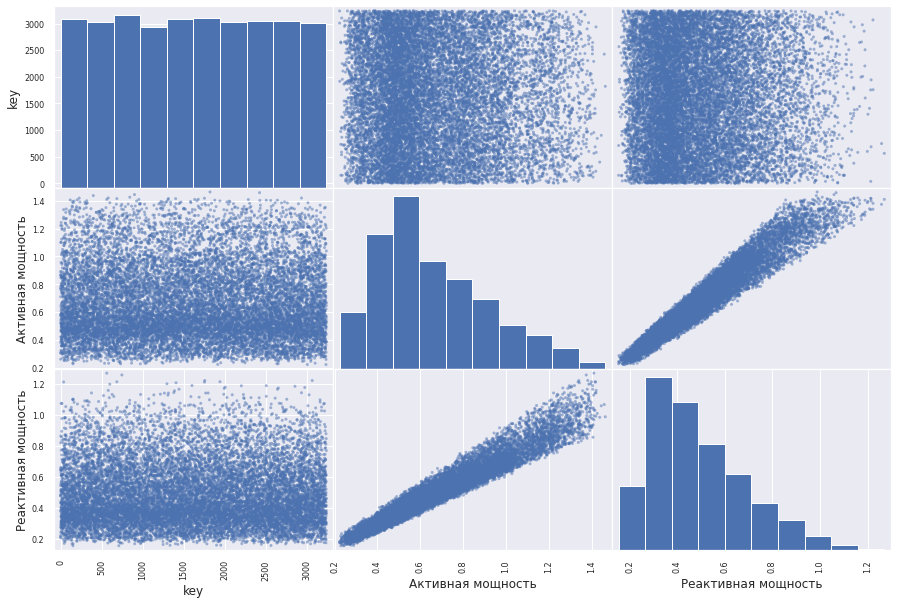

In [17]:
print('Посчет корреляции')

print(data_arc_new[data_arc_new['Реактивная мощность'] >= 0].corr())


print('')
print('Построение графиков')

pd.plotting.scatter_matrix(
    data_arc_new[data_arc_new['Реактивная мощность'] >= 0], 
    figsize=(15, 10)
)
plt.show()
print('')

По графику корреляции наблюдается сильная взаимосвязь межжду столбцами реактивной и активной мощности. Стоит рассмотреть, что из себя представляют данные виды мощности.

- Активная мощность — это полезная часть мощности, та часть, которая определяет прямое преобразования электрической энергии в другие необходимые виды энергии. Обозначение P, единица измерения: Ватт. Вычисляется как среднее за период Τ  значение мгновенной мощности называется активной  мощностью, и выражается формулой:
    

$$ P =  {1 \over T} \int\limits_{0}^{T} p(t) dt $$


- Реактивная мощность: обозначение Q, единица измерения: ВАр (Вольт Ампер реактивный)

Реактивная мощность — величина, характеризующая нагрузки, создаваемые в электротехнических устройствах колебаниями энергии электромагнитного поля в цепи синусоидального переменного тока, равна произведению среднеквадратичных значений напряжения U и тока I, умноженному на синус угла сдвига фаз φ между ними:

$$
{\displaystyle Q=U\cdot I\cdot \sin \varphi ~.}
$$

(если ток отстаёт от напряжения, сдвиг фаз считается положительным, если опережает — отрицательным). 


Физический смысл реактивной мощности — это энергия, перекачиваемая от источника на реактивные элементы приёмника (индуктивности, конденсаторы, обмотки двигателей), а затем возвращаемая этими элементами обратно в источник в течение одного периода колебаний, отнесённая к этому периоду.
Необходимо отметить, что величина sin φ для значений φ от 0 до плюс 90° является положительной величиной. Величина sin φ для значений φ от 0 до минус 90° является отрицательной величиной. В соответствии с формулой реактивная мощность может быть как положительной величиной (если нагрузка имеет активно-индуктивный характер), так и отрицательной (если нагрузка имеет активно-ёмкостный характер). Данное обстоятельство подчёркивает тот факт, что реактивная мощность не участвует в работе электрического тока. Когда устройство имеет положительную реактивную мощность, то принято говорить, что оно её потребляет, а когда отрицательную — то производит, но это чистая условность, связанная с тем, что большинство электропотребляющих устройств (например,асинхронные двигатели), а также чисто активная нагрузка, подключаемая через трансформатор, являются активно-индуктивными.

Так как сильная взаимосвязь между данными столбцами может повлиять на обучение, стоит их объединить. К примеру расчитав новый признак "Полная мощность"

**Полна мощность**
Единица измерения — В·А, вольт-ампер (русское обозначение: В·А; международное: V·A). В Российской Федерации эта единица допущена к использованию в качестве внесистемной единицы без ограничения срока с областью применения «электротехника».

Полная мощность — величина, равная произведению действующих значений периодического электрического тока I в цепи и напряжения U на её зажимах 
$$
S=U\cdot I
$$

связана с активной и реактивной мощностями соотношением:

$$
{\displaystyle S={\sqrt {P^{2}+Q^{2}}}~,}
$$
где:
P — активная мощность;
Q — реактивная мощность (при индуктивной нагрузке Q>0, а при ёмкостной Q<0)


Полная мощность имеет практическое значение, как величина, описывающая нагрузки, фактически налагаемые потребителем на элементы подводящей электросети (провода, кабели, распределительные щиты, трансформаторы, линии электропередачи), так как эти нагрузки зависят от потребляемого тока, а не от фактически использованной потребителем энергии. Именно поэтому полная мощность трансформаторов и распределительных щитов измеряется в вольт-амперах, а не в ваттах.

#### Данные о подаче сыпучих материалов (объём)

-----------------------  Данные о подаче сыпучих материалов (объём) -----------------------


1) Вывод первых 5 строк датафрейма


key  Bulk 1  Bulk 2  Bulk 3  Bulk 4  Bulk 5  Bulk 6  Bulk 7  Bulk 8  \
0    1     NaN     NaN     NaN    43.0     NaN     NaN     NaN     NaN   
1    2     NaN     NaN     NaN    73.0     NaN     NaN     NaN     NaN   
2    3     NaN     NaN     NaN    34.0     NaN     NaN     NaN     NaN   
3    4     NaN     NaN     NaN    81.0     NaN     NaN     NaN     NaN   
4    5     NaN     NaN     NaN    78.0     NaN     NaN     NaN     NaN   

   Bulk 9  Bulk 10  Bulk 11  Bulk 12  Bulk 13  Bulk 14  Bulk 15  
0     NaN      NaN      NaN    206.0      NaN    150.0    154.0  
1     NaN      NaN      NaN    206.0      NaN    149.0    154.0  
2     NaN      NaN      NaN    205.0      NaN    152.0    153.0  
3     NaN      NaN      NaN    207.0      NaN    153.0    154.0  
4     NaN      NaN      NaN    203.0      NaN    151.0    152.0


2) Размер выборки.

(3129, 16)

3) Выведим основную информацию о датафрейме.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


None


Посмотрим на уникальные значения в столбцах базы данных.

Кол-во уникальных значений в столбце key : 3129
[   1    2    3 ... 3239 3240 3241]

Кол-во уникальных значений в столбце Bulk 1 : 47
[ 10.  16.  19.  21.  22.  24.  26.  27.  28.  29.  30.  31.  32.  33.
  34.  36.  37.  38.  39.  41.  43.  44.  46.  47.  48.  50.  51.  52.
  54.  58.  60.  62.  63.  65.  67.  69.  73.  74.  75.  78.  83.  90.
  92.  94. 104. 118. 185.  nan]

Кол-во уникальных значений в столбце Bulk 2 : 15
[228. 232. 233. 236. 242. 246. 247. 248. 249. 254. 257. 258. 270. 282.
 325.  nan]

Кол-во уникальных значений в столбце Bulk 3 : 278
[  6.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  34.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.
  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.
  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.
  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.
  88.  89.  90.  91.  9

name_columns  count    count,%
8        Bulk 8   3128  99.968041
13      Bulk 13   3111  99.424736
9        Bulk 9   3110  99.392777
2        Bulk 2   3107  99.296900
7        Bulk 7   3104  99.201023
5        Bulk 5   3052  97.539150
10      Bulk 10   2953  94.375200
11      Bulk 11   2952  94.343241
1        Bulk 1   2877  91.946309
6        Bulk 6   2553  81.591563
4        Bulk 4   2115  67.593480
3        Bulk 3   1831  58.517098
15      Bulk 15    881  28.155960
12      Bulk 12    679  21.700224
14      Bulk 14    323  10.322787
0           key      0   0.000000


Колв-во столбцов с пропусками: 15

5) Построение матрицы пропущенных значений


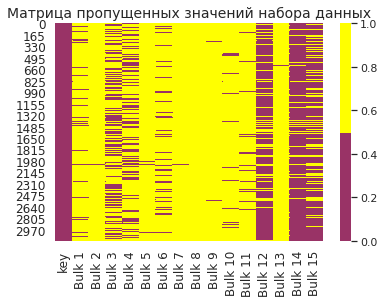

6) Кол-во уникальных дупликатов.

Уникальных дупликатов: 0


7) Выведим общую информацию о данных в столбцах.



key      Bulk 1      Bulk 2       Bulk 3       Bulk 4  \
count  3129.000000  252.000000   22.000000  1298.000000  1014.000000   
mean   1624.383509   39.242063  253.045455   113.879045   104.394477   
std     933.337642   18.277654   21.180578    75.483494    48.184126   
min       1.000000   10.000000  228.000000     6.000000    12.000000   
25%     816.000000   27.000000  242.000000    58.000000    72.000000   
50%    1622.000000   31.000000  251.500000    97.500000   102.000000   
75%    2431.000000   46.000000  257.750000   152.000000   133.000000   
max    3241.000000  185.000000  325.000000   454.000000   281.000000   

           Bulk 5      Bulk 6      Bulk 7  Bulk 8      Bulk 9     Bulk 10  \
count   77.000000  576.000000   25.000000     1.0   19.000000  176.000000   
mean   107.025974  118.925347  305.600000    49.0   76.315789   83.284091   
std     81.790646   72.057776  191.022904     NaN   21.720581   26.060347   
min     11.000000   17.000000   47.000000    49.0   63.000000   24.000000   
25%     70.000000   69.750000  155.000000    49.0   66.000000   64.000000   
50%     86.000000  100.000000  298.000000    49.0   68.000000   86.500000   
75%    132.000000  157.000000  406.000000    49.0   70.500000  102.000000   
max    603.000000  503.000000  772.000000    49.0  147.000000  159.000000   

          Bulk 11      Bulk 12     Bulk 13      Bulk 14      Bulk 15  
count  177.000000  2450.000000   18.000000  2806.000000  2248.000000  
mean    76.819209   260.471020  181.111111   170.284747   160.513345  
std     59.655365   120.649269   46.088009    65.868652    51.765319  
min      8.000000    53.000000  151.000000    16.000000     1.000000  
25%     25.000000   204.000000  153.250000   119.000000   105.000000  
50%     64.000000   208.000000  155.500000   151.000000   160.000000  
75%    106.000000   316.000000  203.500000   205.750000   205.000000  
max    313.000000  1849.000000  305.000000   636.000000   405.000000


8) Построение "ящика с усами"



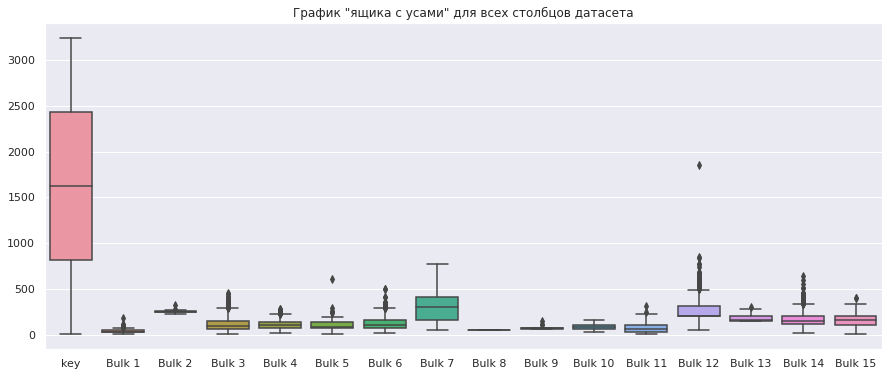

9) Построение общей гистограммы для всех числовых столбцов таблицы



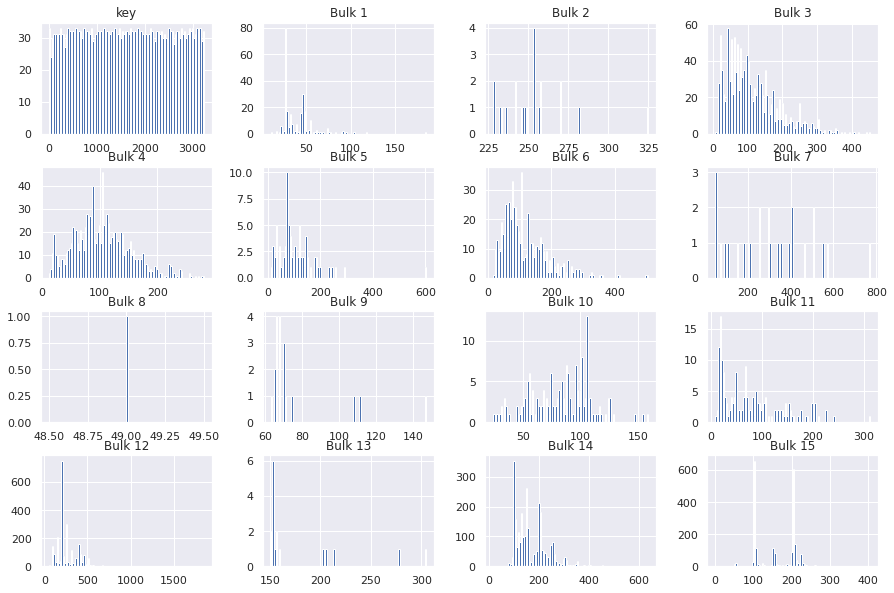


10) Корреляция между столбцами

Посчет корреляции


key    Bulk 1    Bulk 2    Bulk 3    Bulk 4    Bulk 5    Bulk 6  \
key      1.000000 -0.192066 -0.038643 -0.080335 -0.101955 -0.018074 -0.063539   
Bulk 1  -0.192066  1.000000 -0.073762  0.016731 -0.040465 -0.368980  0.141745   
Bulk 2  -0.038643 -0.073762  1.000000       NaN  0.393882  0.070350       NaN   
Bulk 3  -0.080335  0.016731       NaN  1.000000 -0.260918  0.144410  0.253080   
Bulk 4  -0.101955 -0.040465  0.393882 -0.260918  1.000000 -0.077214 -0.333841   
Bulk 5  -0.018074 -0.368980  0.070350  0.144410 -0.077214  1.000000 -0.511112   
Bulk 6  -0.063539  0.141745       NaN  0.253080 -0.333841 -0.511112  1.000000   
Bulk 7  -0.049425 -0.086223 -0.010043       NaN  0.324940  0.304476       NaN   
Bulk 8        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
Bulk 9   0.262741       NaN       NaN  0.072850  0.766565       NaN       NaN   
Bulk 10  0.288135 -0.278055       NaN -0.244532 -0.516399       NaN       NaN   
Bulk 11 -0.156748  0.461895       NaN  0.137997       NaN       NaN -0.104251   
Bulk 12 -0.030981  0.370501       NaN  0.011648  0.051112  0.007650 -0.079822   
Bulk 13  0.050304  1.000000       NaN -0.582598 -0.311659       NaN  0.844690   
Bulk 14 -0.149840  0.409188       NaN  0.026257  0.022925 -0.256040  0.154429   
Bulk 15 -0.169873 -0.119006       NaN -0.023689  0.041190 -0.248216 -0.038363   

           Bulk 7  Bulk 8    Bulk 9   Bulk 10   Bulk 11   Bulk 12   Bulk 13  \
key     -0.049425     NaN  0.262741  0.288135 -0.156748 -0.030981  0.050304   
Bulk 1  -0.086223     NaN       NaN -0.278055  0.461895  0.370501  1.000000   
Bulk 2  -0.010043     NaN       NaN       NaN       NaN       NaN       NaN   
Bulk 3        NaN     NaN  0.072850 -0.244532  0.137997  0.011648 -0.582598   
Bulk 4   0.324940     NaN  0.766565 -0.516399       NaN  0.051112 -0.311659   
Bulk 5   0.304476     NaN       NaN       NaN       NaN  0.007650       NaN   
Bulk 6        NaN     NaN       NaN       NaN -0.104251 -0.079822  0.844690   
Bulk 7   1.000000     NaN       NaN       NaN       NaN  0.538671       NaN   
Bulk 8        NaN     NaN       NaN       NaN       NaN       NaN       NaN   
Bulk 9        NaN     NaN  1.000000       NaN       NaN  0.946954       NaN   
Bulk 10       NaN     NaN       NaN  1.000000       NaN -0.026418       NaN   
Bulk 11       NaN     NaN       NaN       NaN  1.000000  0.050729       NaN   
Bulk 12  0.538671     NaN  0.946954 -0.026418  0.050729  1.000000  0.695261   
Bulk 13       NaN     NaN       NaN       NaN       NaN  0.695261  1.000000   
Bulk 14  1.000000     NaN -0.479974 -0.248683 -0.039783  0.427247  0.365168   
Bulk 15       NaN     NaN       NaN  0.076409  0.101309  0.418691  0.408845   

          Bulk 14   Bulk 15  
key     -0.149840 -0.169873  
Bulk 1   0.409188 -0.119006  
Bulk 2        NaN       NaN  
Bulk 3   0.026257 -0.023689  
Bulk 4   0.022925  0.041190  
Bulk 5  -0.256040 -0.248216  
Bulk 6   0.154429 -0.038363  
Bulk 7   1.000000       NaN  
Bulk 8        NaN       NaN  
Bulk 9  -0.479974       NaN  
Bulk 10 -0.248683  0.076409  
Bulk 11 -0.039783  0.101309  
Bulk 12  0.427247  0.418691  
Bulk 13  0.365168  0.408845  
Bulk 14  1.000000  0.099170  
Bulk 15  0.099170  1.000000


Построение графиков


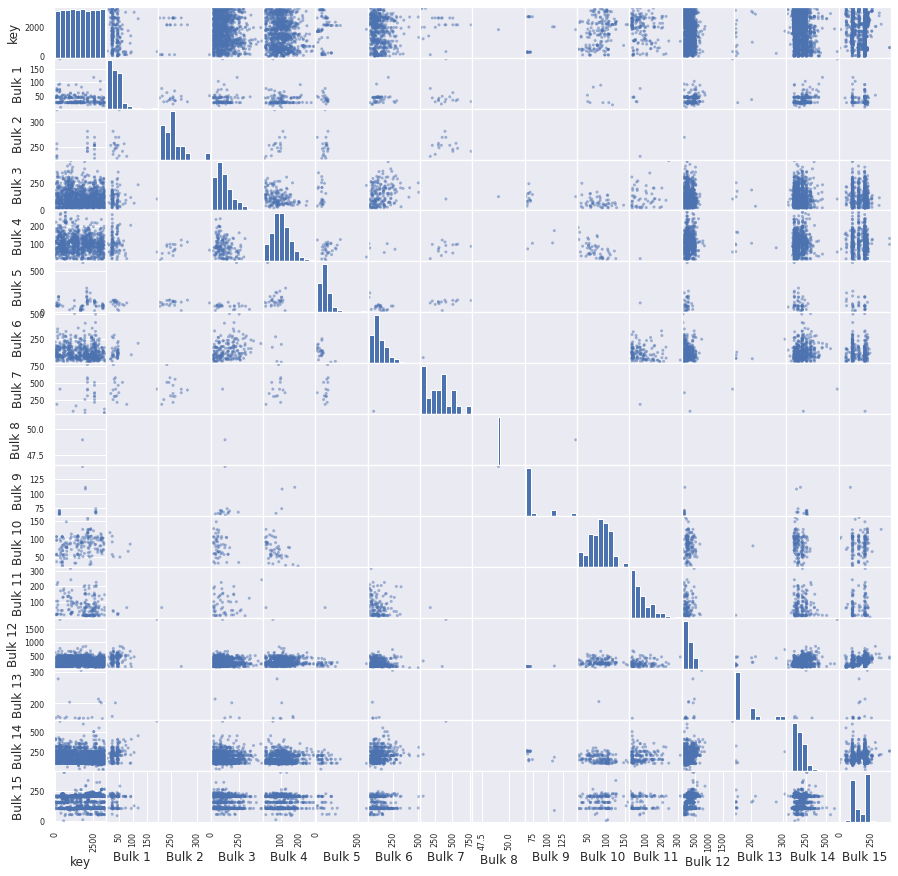

In [18]:
all_info(data_bulk_new,' Данные о подаче сыпучих материалов (объём)')

На оснвании представленных данных можно выделить следующее:
- датасет содержит  3129 строк и 16 столбцами
- В датасете присутсвует большое кол-во пропусков. Вероятно значения некоторых видов сыпучих материалов не добавлялось в партию. И следовательно пустые значения можно будет заполнить 0.
- Дубликаты также отсутсвуют
- Кол-во партий: 3129
- Аномальные значения не наблюдаются.
- столбцы не записаны по правилам хорошего тона. Надо будет их скорректировать.

#### Данные о подаче сыпучих материалов (время)

----------------------- Данные о подаче сыпучих материалов (время) -----------------------


1) Вывод первых 5 строк датафрейма


key Bulk 1 Bulk 2 Bulk 3               Bulk 4 Bulk 5 Bulk 6 Bulk 7 Bulk 8  \
0    1    NaN    NaN    NaN  2019-05-03 11:28:48    NaN    NaN    NaN    NaN   
1    2    NaN    NaN    NaN  2019-05-03 11:36:50    NaN    NaN    NaN    NaN   
2    3    NaN    NaN    NaN  2019-05-03 12:32:39    NaN    NaN    NaN    NaN   
3    4    NaN    NaN    NaN  2019-05-03 12:43:22    NaN    NaN    NaN    NaN   
4    5    NaN    NaN    NaN  2019-05-03 13:30:47    NaN    NaN    NaN    NaN   

  Bulk 9 Bulk 10 Bulk 11              Bulk 12 Bulk 13              Bulk 14  \
0    NaN     NaN     NaN  2019-05-03 11:24:31     NaN  2019-05-03 11:14:50   
1    NaN     NaN     NaN  2019-05-03 11:53:30     NaN  2019-05-03 11:48:37   
2    NaN     NaN     NaN  2019-05-03 12:27:13     NaN  2019-05-03 12:21:01   
3    NaN     NaN     NaN  2019-05-03 12:58:00     NaN  2019-05-03 12:51:11   
4    NaN     NaN     NaN  2019-05-03 13:30:47     NaN  2019-05-03 13:34:12   

               Bulk 15  
0  2019-05-03 11:10:43  
1  2019-05-03 11:44:39  
2  2019-05-03 12:16:16  
3  2019-05-03 12:46:36  
4  2019-05-03 13:30:47


2) Размер выборки.

(3129, 16)

3) Выведим основную информацию о датафрейме.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


None


Посмотрим на уникальные значения в столбцах базы данных.

Кол-во уникальных значений в столбце key : 3129
[   1    2    3 ... 3239 3240 3241]

Кол-во уникальных значений в столбце Bulk 1 : 252
['2019-05-03 17:42:46' '2019-05-05 16:26:52' '2019-05-05 17:18:36'
 '2019-05-05 18:32:50' '2019-05-05 19:34:07' '2019-05-05 20:36:08'
 '2019-05-05 21:41:07' '2019-05-05 22:07:40' '2019-05-06 03:19:35'
 '2019-05-07 17:37:05' '2019-05-07 22:54:29' '2019-05-08 01:46:58'
 '2019-05-08 01:53:35' '2019-05-08 09:50:17' '2019-05-08 14:10:47'
 '2019-05-08 18:38:10' '2019-05-08 19:41:48' '2019-05-08 20:35:02'
 '2019-05-09 00:10:01' '2019-05-09 14:14:29' '2019-05-11 03:53:30'
 '2019-05-11 03:58:38' '2019-05-11 06:21:38' '2019-05-11 07:01:15'
 '2019-05-11 22:08:02' '2019-05-11 23:59:58' '2019-05-12 04:52:28'
 '2019-05-13 03:00:10' '2019-05-13 04:58:40' '2019-05-13 09:44:14'
 '2019-05-14 01:20:24' '2019-05-14 02:50:28' '2019-05-14 23:59:20'
 '2019-05-15 02:23:25' '2019-05-15 04:41:54' '2019-05-15 10:09:57'
 '

name_columns  count    count,%
8        Bulk 8   3128  99.968041
13      Bulk 13   3111  99.424736
9        Bulk 9   3110  99.392777
2        Bulk 2   3107  99.296900
7        Bulk 7   3104  99.201023
5        Bulk 5   3052  97.539150
10      Bulk 10   2953  94.375200
11      Bulk 11   2952  94.343241
1        Bulk 1   2877  91.946309
6        Bulk 6   2553  81.591563
4        Bulk 4   2115  67.593480
3        Bulk 3   1831  58.517098
15      Bulk 15    881  28.155960
12      Bulk 12    679  21.700224
14      Bulk 14    323  10.322787
0           key      0   0.000000


Колв-во столбцов с пропусками: 15

5) Построение матрицы пропущенных значений


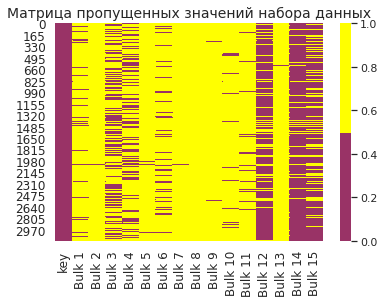

6) Кол-во уникальных дупликатов.

Уникальных дупликатов: 0


7) Выведим общую информацию о данных в столбцах.



key
count  3129.000000
mean   1624.383509
std     933.337642
min       1.000000
25%     816.000000
50%    1622.000000
75%    2431.000000
max    3241.000000


8) Построение "ящика с усами"



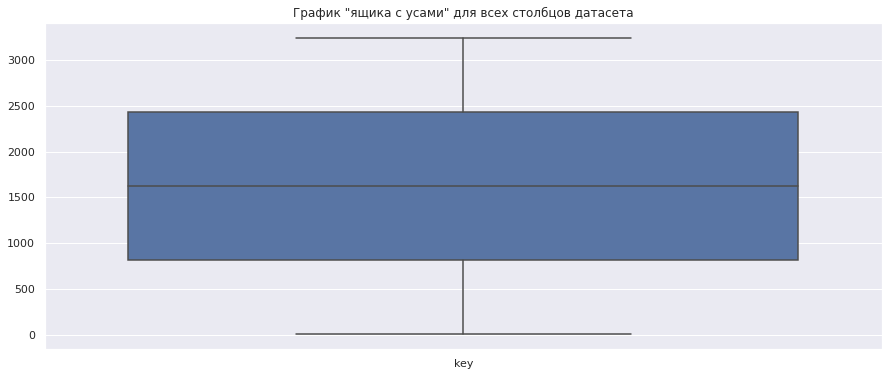

9) Построение общей гистограммы для всех числовых столбцов таблицы



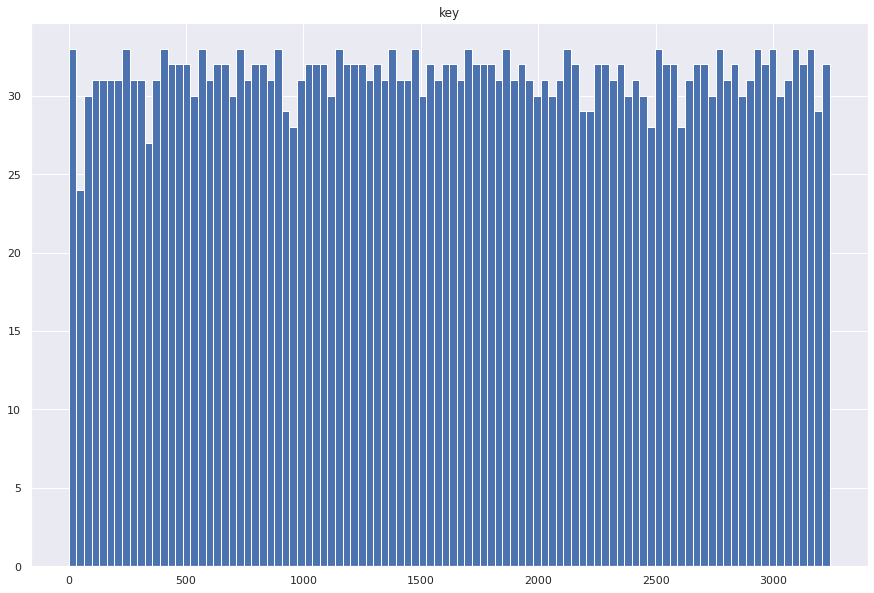


10) Корреляция между столбцами

Посчет корреляции


key
key  1.0


Построение графиков


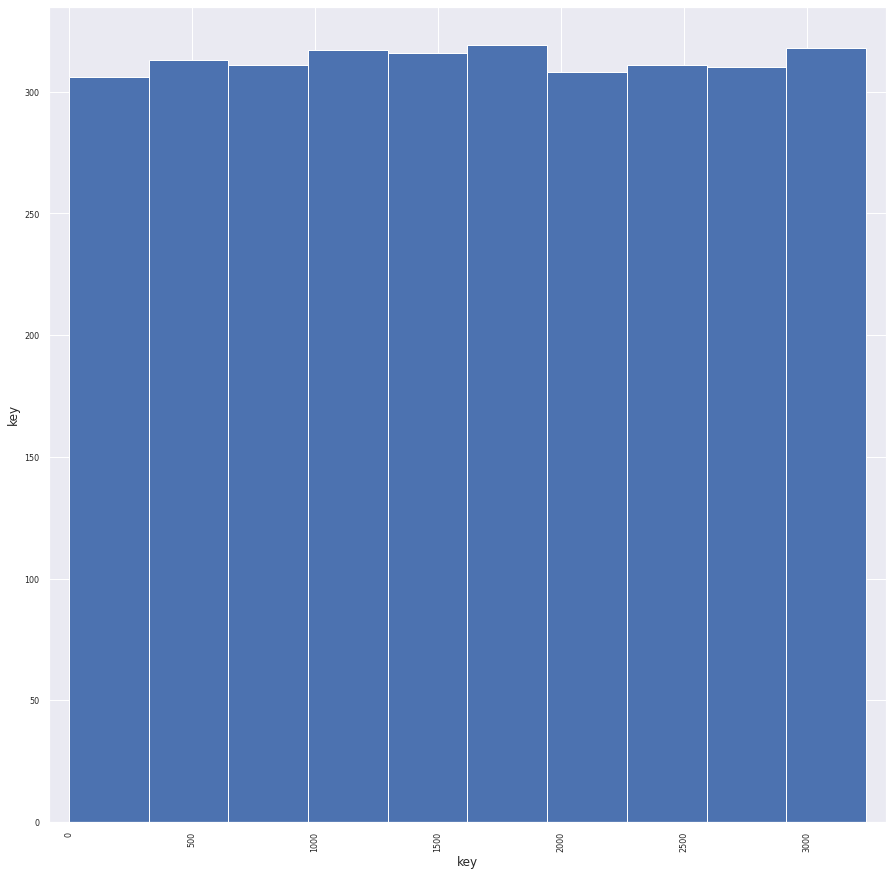

In [19]:
all_info(data_bulk_time_new,'Данные о подаче сыпучих материалов (время)')

На оснвании представленных данных можно выделить следующее:
- датасет содержит  3129 строк и 16 столбцами
- В датасете присутсвует большое кол-во пропусков. Вероятно сыпучие материалы не добавлялись в партию и время не фиксировалось. Данные можно заполнить 0 или значением "unknown"
- Дубликаты также отсутсвуют
- Кол-во партий: 3129
- Аномальные значения не наблюдаются.

Данный датасет полезную инфомрацию для нашего исследования не несет. В дальнейшем его использовать не будем.

#### Данные о продувке сплава газом

----------------------- Данные о продувке сплава газом -----------------------


1) Вывод первых 5 строк датафрейма


key      Газ 1
0    1  29.749986
1    2  12.555561
2    3  28.554793
3    4  18.841219
4    5   5.413692


2) Размер выборки.

(3239, 2)

3) Выведим основную информацию о датафрейме.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


None


Посмотрим на уникальные значения в столбцах базы данных.

Кол-во уникальных значений в столбце key : 3239
[   1    2    3 ... 3239 3240 3241]

Кол-во уникальных значений в столбце Газ 1 : 3239
[8.39852910e-03 1.66956024e-02 2.63028954e-01 ... 5.21423726e+01
 6.09356892e+01 7.79950397e+01]


4) Таблица пропусков по столбцам.



name_columns  count  count,%
0          key      0      0.0
1        Газ 1      0      0.0


Колв-во столбцов с пропусками: 0

5) Построение матрицы пропущенных значений


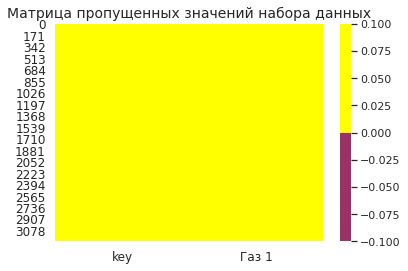

6) Кол-во уникальных дупликатов.

Уникальных дупликатов: 0


7) Выведим общую информацию о данных в столбцах.



key        Газ 1
count  3239.000000  3239.000000
mean   1621.861377    11.002062
std     935.386334     6.220327
min       1.000000     0.008399
25%     812.500000     7.043089
50%    1622.000000     9.836267
75%    2431.500000    13.769915
max    3241.000000    77.995040


8) Построение "ящика с усами"



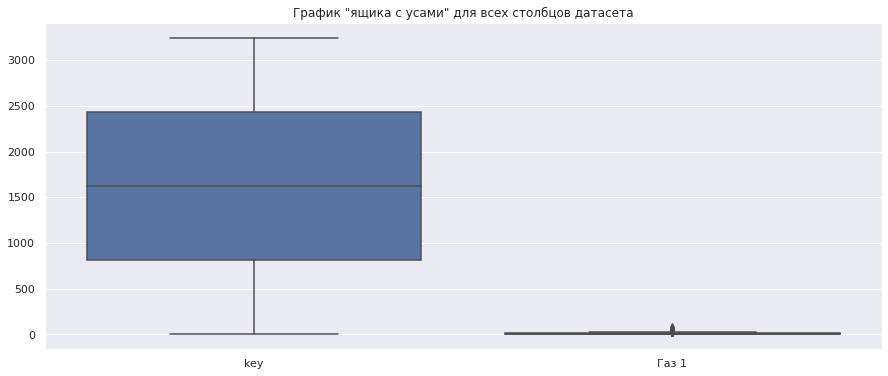

9) Построение общей гистограммы для всех числовых столбцов таблицы



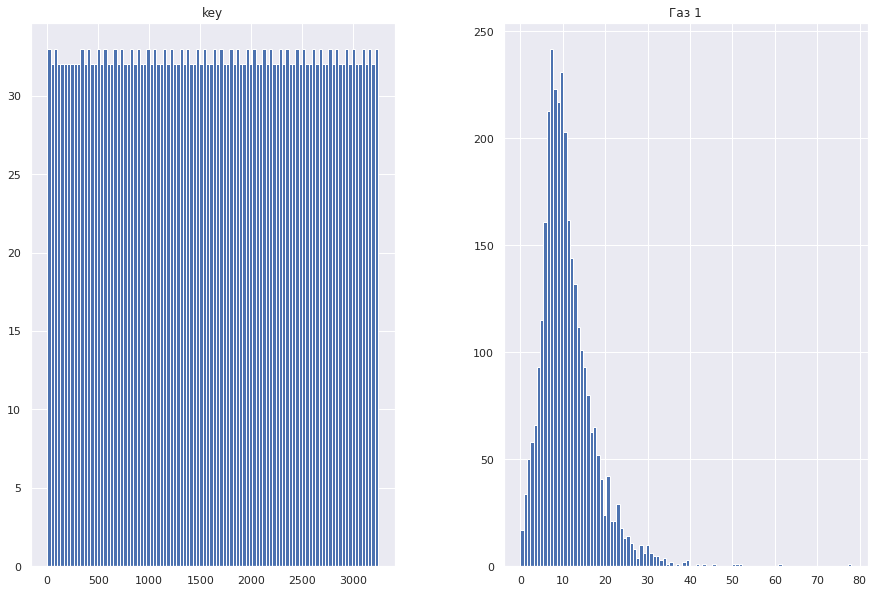


10) Корреляция между столбцами

Посчет корреляции


key     Газ 1
key    1.000000 -0.040655
Газ 1 -0.040655  1.000000


Построение графиков


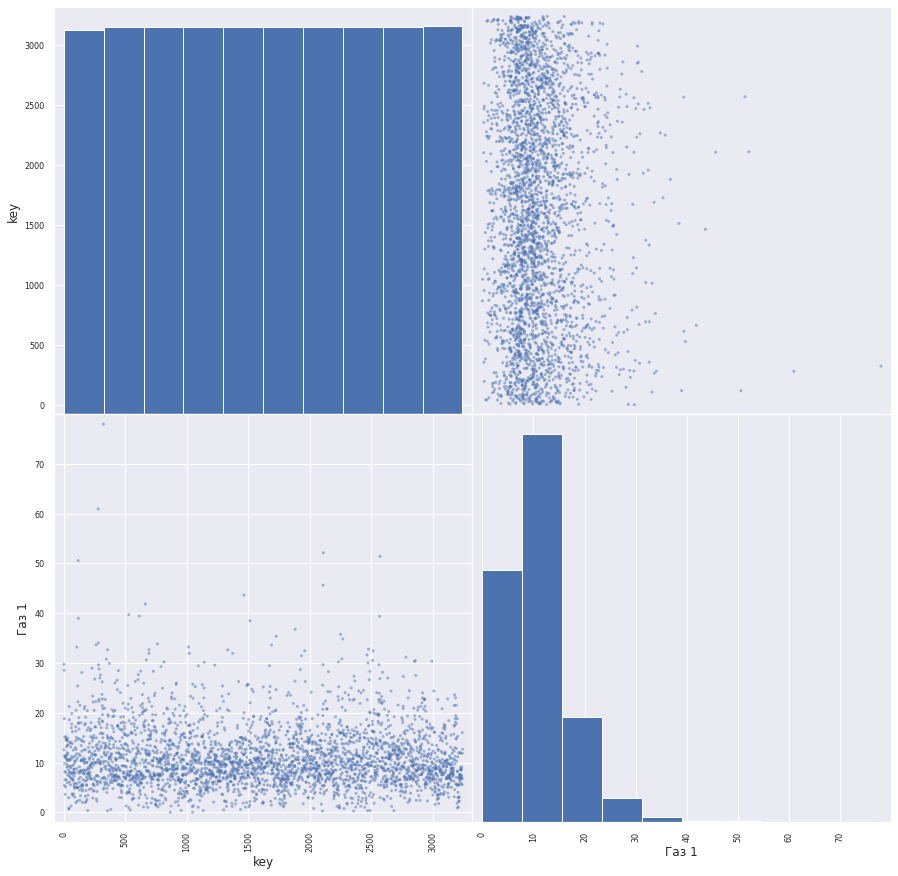

In [20]:
all_info(data_gas_new,'Данные о продувке сплава газом')

На оснвании представленных данных можно выделить следующее:
- датасет содержит  3239 строк и 2 столбца
- Пропуски в датасете отсутсвуют
- Дубликаты также отсутсвуют
- Кол-во партий: 3129
- Аномальные значения не наблюдаются.
- Данные распределены равномерно.
- необходимо будет столбец "Газ 1" переименовать.

Рассмотрим график "ящик с усами" для столбца "Газ 1" отдельно.

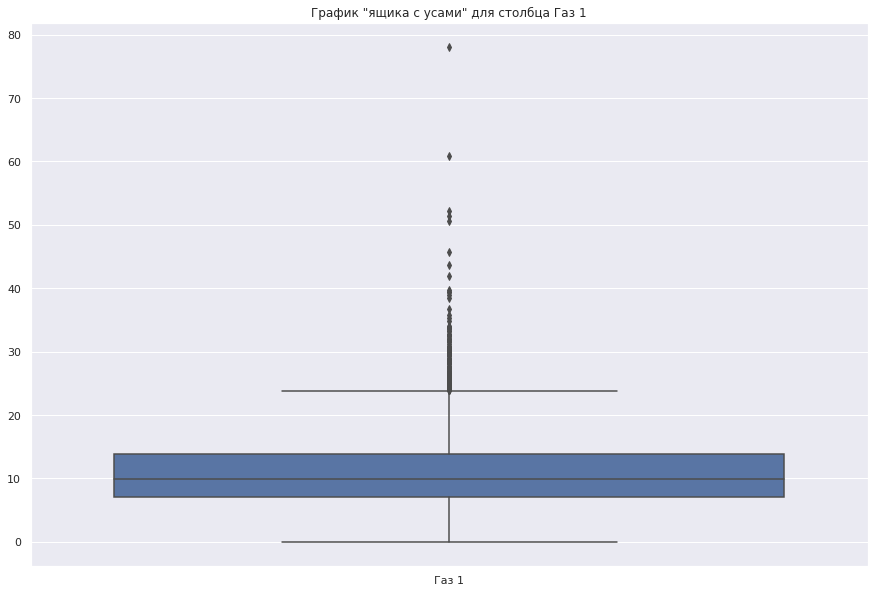

In [21]:
# построим диаграмму размаха
plt.figure(figsize=(15,10))
sns.boxplot(data=data_gas_new.loc[:,['Газ 1']])
plt.title('График "ящика с усами" для столбца Газ 1');

#### Результаты измерения температуры

----------------------- Результаты измерения температуры -----------------------


1) Вывод первых 5 строк датафрейма


key         Время замера  Температура
0    1  2019-05-03 11:02:04       1571.0
1    1  2019-05-03 11:07:18       1604.0
2    1  2019-05-03 11:11:34       1618.0
3    1  2019-05-03 11:18:04       1601.0
4    1  2019-05-03 11:25:59       1606.0


2) Размер выборки.

(18092, 3)

3) Выведим основную информацию о датафрейме.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


None


Посмотрим на уникальные значения в столбцах базы данных.

Кол-во уникальных значений в столбце key : 3216
[   1    2    3 ... 3239 3240 3241]

Кол-во уникальных значений в столбце Время замера : 18092
['2019-05-03 11:02:04' '2019-05-03 11:07:18' '2019-05-03 11:11:34' ...
 '2019-09-06 17:21:48' '2019-09-06 17:24:44' '2019-09-06 17:30:05']

Кол-во уникальных значений в столбце Температура : 172
[1191. 1204. 1208. 1218. 1227. 1515. 1519. 1520. 1521. 1522. 1525. 1526.
 1527. 1528. 1529. 1530. 1531. 1532. 1533. 1534. 1535. 1536. 1537. 1538.
 1539. 1540. 1541. 1542. 1543. 1544. 1545. 1546. 1547. 1548. 1549. 1550.
 1551. 1552. 1553. 1554. 1555. 1556. 1557. 1558. 1559. 1560. 1561. 1562.
 1563. 1564. 1565. 1566. 1567. 1568. 1569. 1570. 1571. 1572. 1573. 1574.
 1575. 1576. 1577. 1578. 1579. 1580. 1581. 1582. 1583. 1584. 1585. 1586.
 1587. 1588. 1589. 1590. 1591. 1592. 1593. 1594. 1595. 1596. 1597. 1598.
 1599. 1600. 1601. 1602. 1603. 1604. 1605. 1606. 1607. 1608. 1609. 1610.
 1611. 1612. 1613. 

name_columns  count    count,%
2   Температура   3427  18.942074
0           key      0   0.000000
1  Время замера      0   0.000000


Колв-во столбцов с пропусками: 1

5) Построение матрицы пропущенных значений


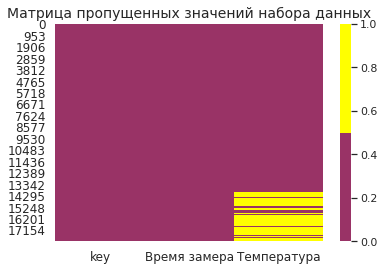

6) Кол-во уникальных дупликатов.

Уникальных дупликатов: 0


7) Выведим общую информацию о данных в столбцах.



key   Температура
count  18092.000000  14665.000000
mean    1616.460977   1590.722741
std      934.641385     20.394381
min        1.000000   1191.000000
25%      807.750000   1580.000000
50%     1618.000000   1590.000000
75%     2429.000000   1599.000000
max     3241.000000   1705.000000


8) Построение "ящика с усами"



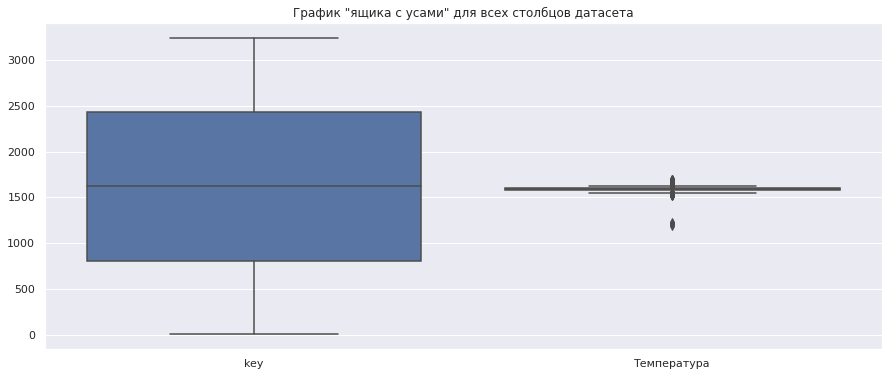

9) Построение общей гистограммы для всех числовых столбцов таблицы



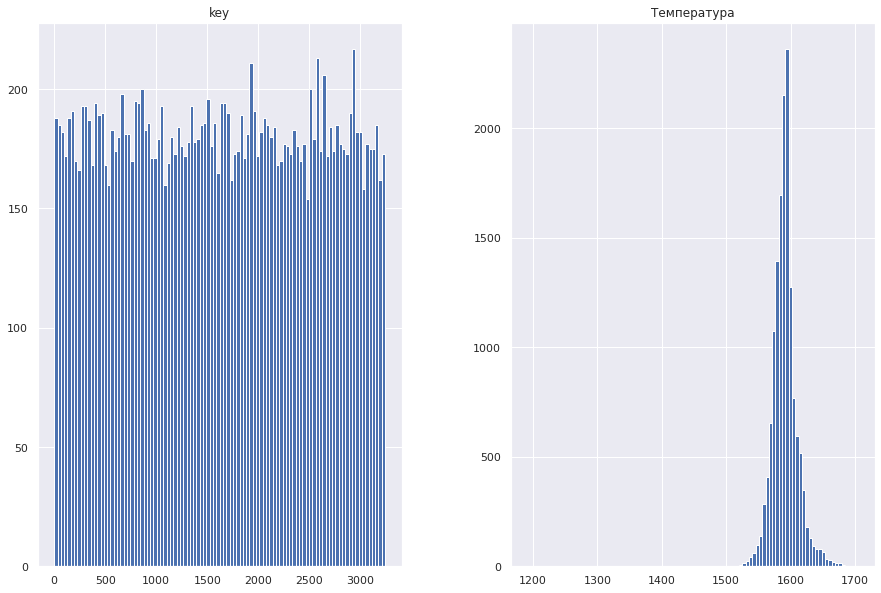


10) Корреляция между столбцами

Посчет корреляции


key  Температура
key          1.00000     -0.05627
Температура -0.05627      1.00000


Построение графиков


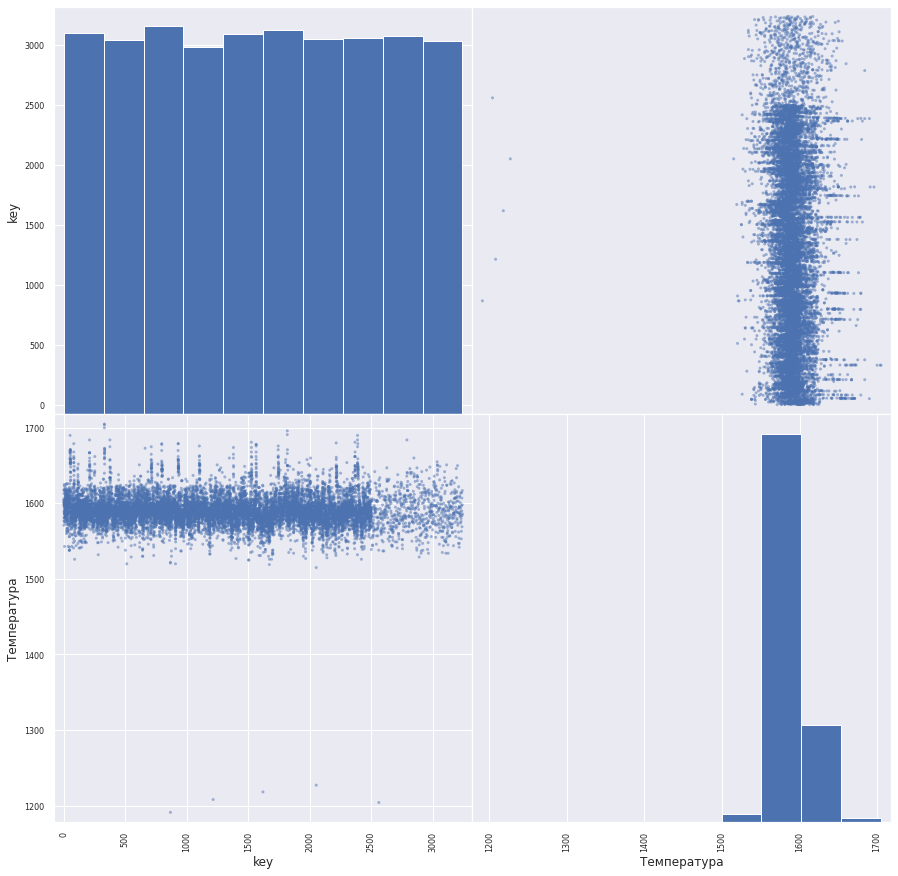

In [22]:
all_info(data_temp_new,'Результаты измерения температуры')

На оснвании представленных данных можно выделить следующее:
- датасет содержит  18092 строк и 3 столбца
- В датасете присутсвует пропуски. Вероятно датчик не фиксировал температуру. Данные партии необходимо будет удалить.
- Дубликаты также отсутсвуют
- Кол-во партий: 3216
- Столбце "Температура" необходимо будет переименовать
- Столбец "Время замера" измеить тип данных на datetime, а "Температура" можно перевести к целочисленному типу данных

Рассмотрим график "ящик с усами" для столбца "Температура" отдельно.

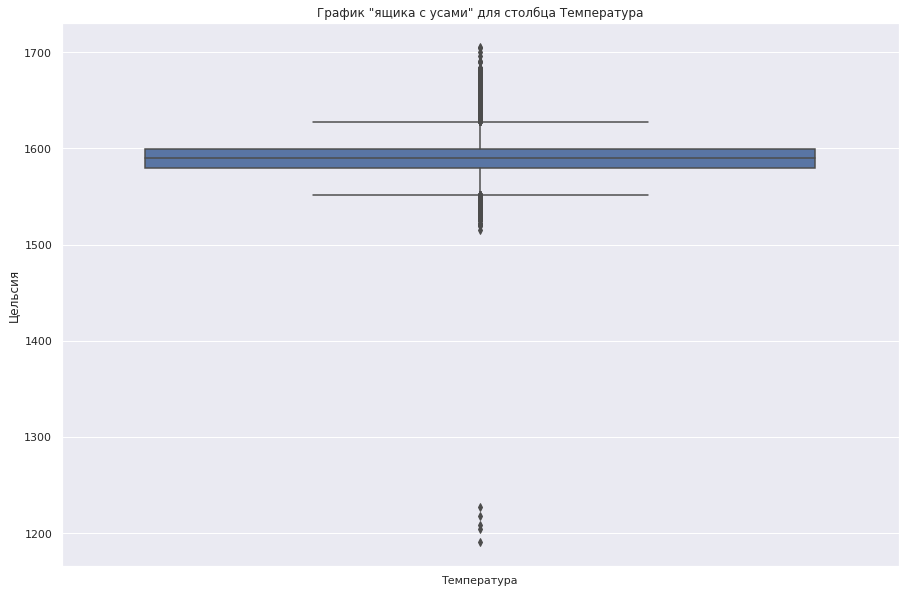

In [23]:
# построим диаграмму размаха
plt.figure(figsize=(15,10))
sns.boxplot(data=data_temp_new.loc[:,['Температура']])
plt.title('График "ящика с усами" для столбца Температура')
plt.ylabel('Цельсия');

- Температура плавления стали находится в диапазоне от 1450 до 1535°С. Следовательно все температуры ниже 1450 необходимо отсеч.

In [24]:
data_temp_new.loc[data_temp_new['Температура'].isna()== True].head()

key         Время замера  Температура
13927  2500  2019-08-10 14:13:11          NaN
13928  2500  2019-08-10 14:18:12          NaN
13929  2500  2019-08-10 14:25:53          NaN
13930  2500  2019-08-10 14:29:39          NaN
13932  2501  2019-08-10 14:49:15          NaN

Стоит обратить внимание, что пропуски активно начали возникать с 2500 парти

#### Данные о проволочных материалах (объём)

----------------------- Данные о проволочных материалах (объём) -----------------------


1) Вывод первых 5 строк датафрейма


key     Wire 1   Wire 2  Wire 3  Wire 4  Wire 5  Wire 6  Wire 7  Wire 8  \
0    1  60.059998      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1    2  96.052315      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2    3  91.160157      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3    4  89.063515      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4    5  89.238236  9.11456     NaN     NaN     NaN     NaN     NaN     NaN   

   Wire 9  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN


2) Размер выборки.

(3081, 10)

3) Выведим основную информацию о датафрейме.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


None


Посмотрим на уникальные значения в столбцах базы данных.

Кол-во уникальных значений в столбце key : 3081
[   1    2    3 ... 3239 3240 3241]

Кол-во уникальных значений в столбце Wire 1 : 2251
[  1.9188     2.09664    3.10128  ... 280.987214 330.314424        nan]

Кол-во уникальных значений в столбце Wire 2 : 713
[3.01600000e-02 6.03200000e-02 9.04800000e-02 9.04800000e-02
 1.74720000e-01 5.82400000e-01 1.17624000e+00 1.60160000e+00
 2.74456000e+00 3.98112000e+00 4.10176000e+00 4.13192000e+00
 5.12720000e+00 7.72096000e+00 8.08288000e+00 8.11304000e+00
 8.17336000e+00 8.83688000e+00 9.01784000e+00 9.04800000e+00
 9.07816000e+00 9.08544100e+00 9.10832000e+00 9.11456000e+00
 9.13848000e+00 9.14368100e+00 9.16864000e+00 9.19880000e+00
 9.22896000e+00 9.31944000e+00 9.68136000e+00 1.00432800e+01
 1.00734400e+01 1.01036000e+01 1.01337590e+01 1.01337600e+01
 1.01639190e+01 1.01940790e+01 1.02242400e+01 1.10385600e+01
 1.10687200e+01 1.10988800e+01 1.11238400e+01 1.11290400e+01
 1.11592000

name_columns  count    count,%
5       Wire 5   3080  99.967543
7       Wire 7   3070  99.642973
4       Wire 4   3067  99.545602
8       Wire 8   3062  99.383317
9       Wire 9   3052  99.058747
3       Wire 3   3018  97.955209
6       Wire 6   3008  97.630639
2       Wire 2   2002  64.978903
1       Wire 1     26   0.843882
0          key      0   0.000000


Колв-во столбцов с пропусками: 9

5) Построение матрицы пропущенных значений


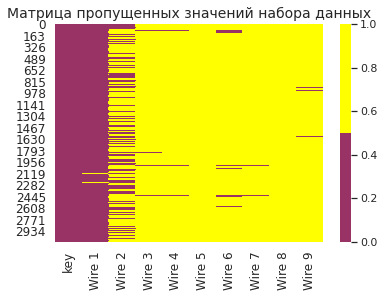

6) Кол-во уникальных дупликатов.

Уникальных дупликатов: 0


7) Выведим общую информацию о данных в столбцах.



key       Wire 1       Wire 2      Wire 3      Wire 4  Wire 5  \
count  3081.000000  3055.000000  1079.000000   63.000000   14.000000   1.000   
mean   1623.426485   100.895853    50.577323  189.482681   57.442841  15.132   
std     932.996726    42.012518    39.320216   99.513444   28.824667     NaN   
min       1.000000     1.918800     0.030160    0.144144   24.148801  15.132   
25%     823.000000    72.115684    20.193680   95.135044   40.807002  15.132   
50%    1619.000000   100.158234    40.142956  235.194977   45.234282  15.132   
75%    2434.000000   126.060483    70.227558  276.252014   76.124619  15.132   
max    3241.000000   330.314424   282.780152  385.008668  113.231044  15.132   

           Wire 6     Wire 7      Wire 8     Wire 9  
count   73.000000  11.000000   19.000000  29.000000  
mean    48.016974  10.039007   53.625193  34.155752  
std     33.919845   8.610584   16.881728  19.931616  
min      0.034320   0.234208   45.076721   4.622800  
25%     25.053600   6.762756   46.094879  22.058401  
50%     42.076324   9.017009   46.279999  30.066399  
75%     64.212723  11.886057   48.089603  43.862003  
max    180.454575  32.847674  102.762401  90.053604


8) Построение "ящика с усами"



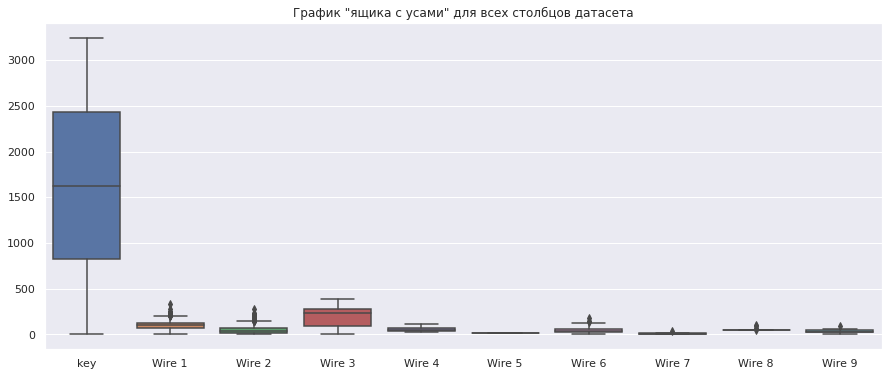

9) Построение общей гистограммы для всех числовых столбцов таблицы



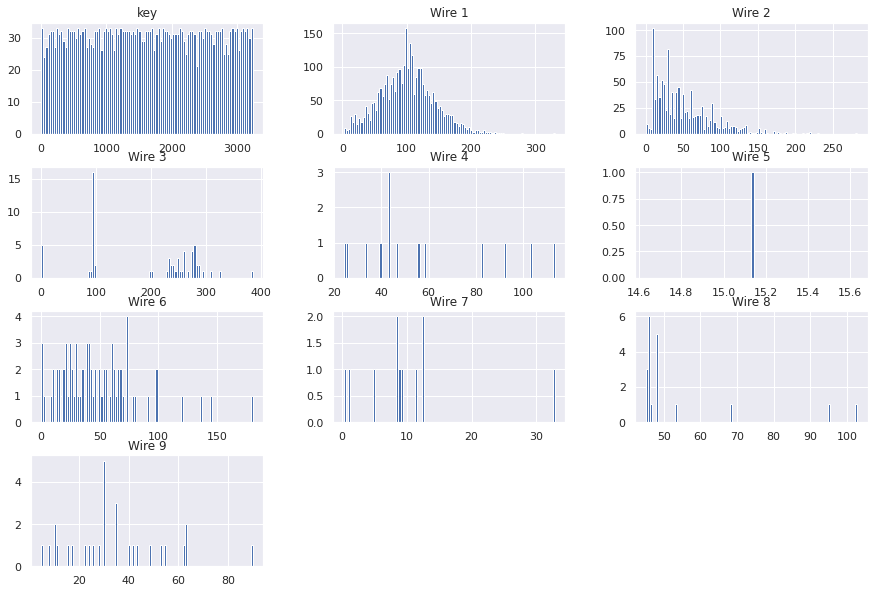


10) Корреляция между столбцами

Посчет корреляции


key    Wire 1    Wire 2    Wire 3    Wire 4  Wire 5    Wire 6  \
key     1.000000 -0.083352 -0.005461 -0.084460  0.389064     NaN  0.082274   
Wire 1 -0.083352  1.000000 -0.030892  0.724370  0.054001     NaN -0.280807   
Wire 2 -0.005461 -0.030892  1.000000 -0.081852       NaN     NaN -0.265706   
Wire 3 -0.084460  0.724370 -0.081852  1.000000  0.069854     NaN -0.221602   
Wire 4  0.389064  0.054001       NaN  0.069854  1.000000     NaN  0.237456   
Wire 5       NaN       NaN       NaN       NaN       NaN     NaN       NaN   
Wire 6  0.082274 -0.280807 -0.265706 -0.221602  0.237456     NaN  1.000000   
Wire 7  0.578898 -0.035072       NaN -0.056948 -0.404865     NaN -0.224093   
Wire 8  0.323891  0.068697  0.250477       NaN       NaN     NaN       NaN   
Wire 9 -0.012200  0.010104  0.011019       NaN       NaN     NaN       NaN   

          Wire 7    Wire 8    Wire 9  
key     0.578898  0.323891 -0.012200  
Wire 1 -0.035072  0.068697  0.010104  
Wire 2       NaN  0.250477  0.011019  
Wire 3 -0.056948       NaN       NaN  
Wire 4 -0.404865       NaN       NaN  
Wire 5       NaN       NaN       NaN  
Wire 6 -0.224093       NaN       NaN  
Wire 7  1.000000       NaN       NaN  
Wire 8       NaN  1.000000       NaN  
Wire 9       NaN       NaN  1.000000


Построение графиков


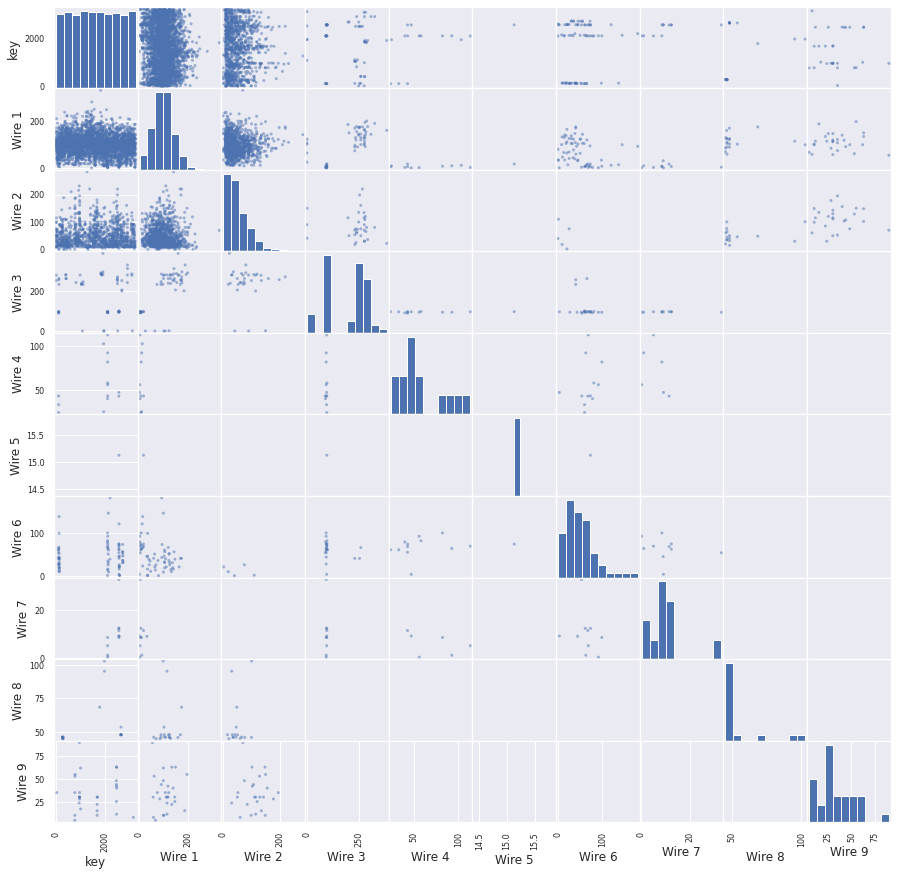

In [25]:
all_info(data_wire_new,'Данные о проволочных материалах (объём)')

На оснвании представленных данных можно выделить следующее:
- датасет содержит  3081 строк и 10 столбцов
- В датасете присутсвует большое кол-во пропусков. Вероятно некоторые виды проволочных материалов не добавлялось в партию. Данные можно заполнить 0 
- Дубликаты также отсутсвуют
- Кол-во партий: 3081
- Аномальные значения не наблюдаются.
- столбцы не записаны по правилам хорошего тона. Надо будет их скорректировать.

#### Данные о проволочных материалах (время)

----------------------- Данные о проволочных материалах (время) -----------------------


1) Вывод первых 5 строк датафрейма


key               Wire 1               Wire 2 Wire 3 Wire 4 Wire 5 Wire 6  \
0    1  2019-05-03 11:06:19                  NaN    NaN    NaN    NaN    NaN   
1    2  2019-05-03 11:36:50                  NaN    NaN    NaN    NaN    NaN   
2    3  2019-05-03 12:11:46                  NaN    NaN    NaN    NaN    NaN   
3    4  2019-05-03 12:43:22                  NaN    NaN    NaN    NaN    NaN   
4    5  2019-05-03 13:20:44  2019-05-03 13:15:34    NaN    NaN    NaN    NaN   

  Wire 7 Wire 8 Wire 9  
0    NaN    NaN    NaN  
1    NaN    NaN    NaN  
2    NaN    NaN    NaN  
3    NaN    NaN    NaN  
4    NaN    NaN    NaN


2) Размер выборки.

(3081, 10)

3) Выведим основную информацию о датафрейме.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


None


Посмотрим на уникальные значения в столбцах базы данных.

Кол-во уникальных значений в столбце key : 3081
[   1    2    3 ... 3239 3240 3241]

Кол-во уникальных значений в столбце Wire 1 : 3055
['2019-05-03 11:06:19' '2019-05-03 11:36:50' '2019-05-03 12:11:46' ...
 '2019-09-06 15:33:55' '2019-09-06 17:10:06' nan]

Кол-во уникальных значений в столбце Wire 2 : 1079
['2019-05-03 13:15:34' '2019-05-03 13:48:52' '2019-05-03 15:39:37' ...
 '2019-09-06 01:38:22' '2019-09-06 07:35:40' nan]

Кол-во уникальных значений в столбце Wire 3 : 63
['2019-05-04 04:34:27' '2019-05-04 05:41:29' '2019-05-07 15:39:35'
 '2019-05-07 17:12:49' '2019-05-07 22:24:56' '2019-05-07 23:37:44'
 '2019-05-08 02:25:41' '2019-05-08 06:25:36' '2019-05-08 07:00:18'
 '2019-05-08 07:47:18' '2019-05-19 02:20:39' '2019-05-19 02:57:29'
 '2019-05-19 10:05:03' '2019-05-19 11:07:37' '2019-06-04 12:35:52'
 '2019-06-10 15:07:04' '2019-06-12 13:28:13' '2019-06-12 14:01:36'
 '2019-06-12 14:38:14' '2019-06-14 02:18:05' '2019-06-14 21

name_columns  count    count,%
5       Wire 5   3080  99.967543
7       Wire 7   3070  99.642973
4       Wire 4   3067  99.545602
8       Wire 8   3062  99.383317
9       Wire 9   3052  99.058747
3       Wire 3   3018  97.955209
6       Wire 6   3008  97.630639
2       Wire 2   2002  64.978903
1       Wire 1     26   0.843882
0          key      0   0.000000


Колв-во столбцов с пропусками: 9

5) Построение матрицы пропущенных значений


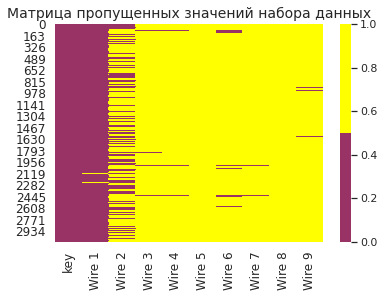

6) Кол-во уникальных дупликатов.

Уникальных дупликатов: 0


7) Выведим общую информацию о данных в столбцах.



key
count  3081.000000
mean   1623.426485
std     932.996726
min       1.000000
25%     823.000000
50%    1619.000000
75%    2434.000000
max    3241.000000


8) Построение "ящика с усами"



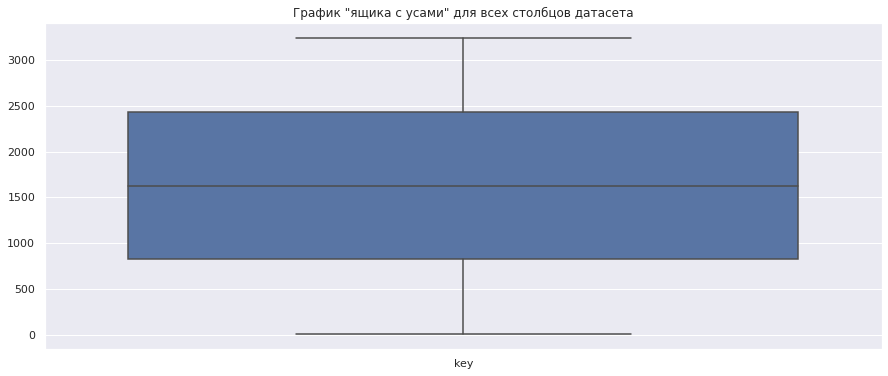

9) Построение общей гистограммы для всех числовых столбцов таблицы



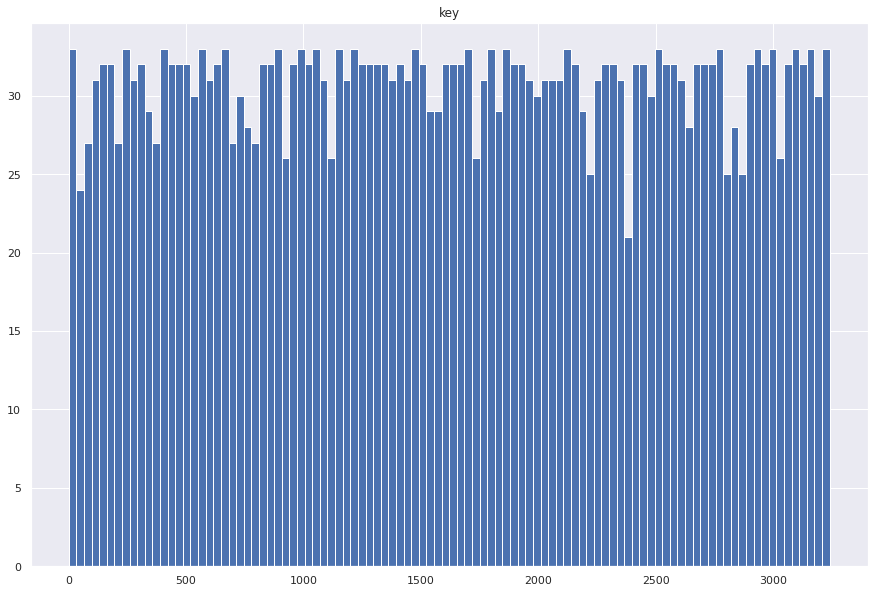


10) Корреляция между столбцами

Посчет корреляции


key
key  1.0


Построение графиков


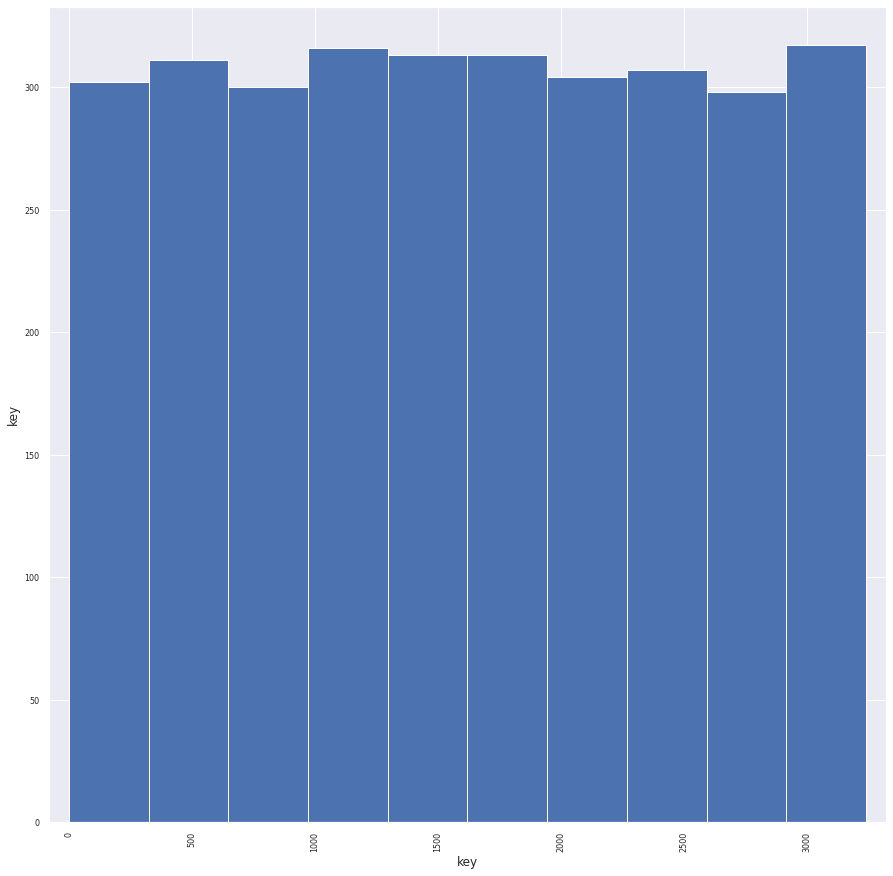

In [26]:
all_info(data_wire_time_new,'Данные о проволочных материалах (время)')

На оснвании представленных данных можно выделить следующее:
- датасет содержит  3081 строк и 10 столбцов
- В датасете присутсвует большое кол-во пропусков. Вероятно проволочне материалы не добавлялись в партию и время не фиксировалось. Данные можно заполнить 0 или значением "unknown"
- Дубликаты также отсутсвуют
- Кол-во партий: 3081
- Аномальные значения не наблюдаются.

Данный датасет полезную инфомрацию для нашего исследования не несет. В дальнейшем его использовать не будем.

### Вывод 

На данном этапе были загружены датафреймы:

- `data_arc_new.csv` — данные об электродах;
- `data_bulk_new.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time_new.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas_new.csv` — данные о продувке сплава газом;
- `data_temp_new.csv` — результаты измерения температуры;
- `data_wire_new.csv` — данные о проволочных материалах (объём);
- `data_wire_time_new.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.


По выведеным данным можно сказать следующее:

1. data_arc_new
- Строк: 14876. Столбцов: 5
- Кол-во столбцов с пропусками: 0. 
- Уникальные дупликаты отсутсвуют
- Кол-во партий: 3214
- Значения в столбцах "Начало нагрева дугой" и "Конец нагрева дугой" необходимо будет перевести в datetime
- Данные представлены за май-сентябрь 2019 года. По представленными датам и времени можно вычислить длительность нагрева дугой для каждого дйствия в партии и кол-во итераций в партии.
- Наблюдаются аномальные значения. Так в реактивной мощности всречаются аномальные значения вплодь до -715.479924. Для реактивной мощности в нашем случае это не подходит.Вероятно это ошибка измерения и партии с значением ниже нуля необходимо будет удалить
- необходимо будет столбцы все переименовать на англ язык.
- необходимо будет рассчитать полную мощность 


2. data_bulk_new
- датасет содержит  3129 строк и 16 столбцами
- В датасете присутсвует большое кол-во пропусков. Вероятно значения некоторых видов сыпучих материалов не добавлялось в партию. И следовательно пустые значения можно будет заполнить 0.
- Дубликаты также отсутсвуют
- Кол-во партий: 3129
- Аномальные значения не наблюдаются.
- столбцы не записаны по правилам хорошего тона. Надо будет их скорректировать.

3. data_gas_new
- датасет содержит  3239 строк и 2 столбца
- Пропуски в датасете отсутсвуют
- Дубликаты также отсутсвуют
- Кол-во партий: 3129
- Аномальные значения не наблюдаются.
- Данные распределены равномерно.
- необходимо будет столбец "Газ 1" переименовать.

4. data_temp_new
- датасет содержит  18092 строк и 3 столбца
- В датасете присутсвует пропуски. Вероятно датчик не фиксировал температуру. Данные партии необходимо будет удалить. Стоит обратить внимание, что пропуски активно начали возникать с 2500 парти
- - Температура плавления стали находится в диапазоне от 1450 до 1535°С. Следовательно все температуры ниже 1450 необходимо отсеч.
- Дубликаты также отсутсвуют
- Кол-во партий: 3216
- Столбцы "Температура" и "Время замера" необходимо будет переименовать
- Столбец "Время замера" измеить тип данных на datetime, а "Температура" можно перевести к целочисленному типу данных

5. data_wire_new
- датасет содержит  3081 строк и 10 столбцов
- В датасете присутсвует большое кол-во пропусков. Вероятно некоторые виды проволочных материалов не добавлялось в партию. Данные можно заполнить 0 
- Дубликаты также отсутсвуют
- Кол-во партий: 3081
- Аномальные значения не наблюдаются.
- столбцы не записаны по правилам хорошего тона. Надо будет их скорректировать.


data_bulk_time_new и data_wire_time_new оказались не информативными и было принято решение от них отказаться.
Замечено, что во всех данных столбцы не записаны по правилам хорошего тона. Надо будет их скорректировать.

**Вопросы по проекту**
1. Какая единица измерения у столбца Газ 1 в data_gas_new?
2. какие единицы измерения у данных: "Данные о проволочных материалах (объём)",' Данные о подаче сыпучих материалов (объём)'?
3. Я нашел информацию, что температура плавления стали от 1350 до 1535°С. В презентации 1450-1520. Какую актальную брать иформацию? 


## Предобработка данных

### Приведение название столбцов в правильному виду

#### Датасет data_arc_new

Выведем название всех столбцов

In [27]:
data_arc_new.columns

Index(['key', 'Начало нагрева дугой', 'Конец нагрева дугой',
       'Активная мощность', 'Реактивная мощность'],
      dtype='object')

In [28]:
data_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


Выполним переименование

In [29]:
# переименование столбцов
data_arc_new = data_arc_new.rename(
    columns={
    'Начало нагрева дугой': 'start_heating',
       'Конец нагрева дугой': 'end_heating',
       'Активная мощность': 'active_power',
        'Реактивная мощность': 'reactive_power'
    }
)

In [30]:
data_arc_new.columns

Index(['key', 'start_heating', 'end_heating', 'active_power',
       'reactive_power'],
      dtype='object')

In [31]:
data_arc_new.head()

key        start_heating          end_heating  active_power  reactive_power
0    1  2019-05-03 11:02:14  2019-05-03 11:06:02      0.305130        0.211253
1    1  2019-05-03 11:07:28  2019-05-03 11:10:33      0.765658        0.477438
2    1  2019-05-03 11:11:44  2019-05-03 11:14:36      0.580313        0.430460
3    1  2019-05-03 11:18:14  2019-05-03 11:24:19      0.518496        0.379979
4    1  2019-05-03 11:26:09  2019-05-03 11:28:37      0.867133        0.643691

In [32]:
data_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   key             14876 non-null  int64  
 1   start_heating   14876 non-null  object 
 2   end_heating     14876 non-null  object 
 3   active_power    14876 non-null  float64
 4   reactive_power  14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


#### Датасет data_bulk_new

In [33]:
data_bulk_new.columns

Index(['key', 'Bulk 1', 'Bulk 2', 'Bulk 3', 'Bulk 4', 'Bulk 5', 'Bulk 6',
       'Bulk 7', 'Bulk 8', 'Bulk 9', 'Bulk 10', 'Bulk 11', 'Bulk 12',
       'Bulk 13', 'Bulk 14', 'Bulk 15'],
      dtype='object')

In [34]:
# data_bulk_new.info()

In [35]:
corect_columns= []

In [36]:
for i in range(len(data_bulk_new.columns)):
    corect_columns.append(data_bulk_new.columns[i].lower().replace(' ','_'))

In [37]:
# corect_columns

In [38]:
data_bulk_new.columns = corect_columns

In [39]:
#data_bulk_new.columns

In [40]:
data_bulk_new.head()

key  bulk_1  bulk_2  bulk_3  bulk_4  bulk_5  bulk_6  bulk_7  bulk_8  \
0    1     NaN     NaN     NaN    43.0     NaN     NaN     NaN     NaN   
1    2     NaN     NaN     NaN    73.0     NaN     NaN     NaN     NaN   
2    3     NaN     NaN     NaN    34.0     NaN     NaN     NaN     NaN   
3    4     NaN     NaN     NaN    81.0     NaN     NaN     NaN     NaN   
4    5     NaN     NaN     NaN    78.0     NaN     NaN     NaN     NaN   

   bulk_9  bulk_10  bulk_11  bulk_12  bulk_13  bulk_14  bulk_15  
0     NaN      NaN      NaN    206.0      NaN    150.0    154.0  
1     NaN      NaN      NaN    206.0      NaN    149.0    154.0  
2     NaN      NaN      NaN    205.0      NaN    152.0    153.0  
3     NaN      NaN      NaN    207.0      NaN    153.0    154.0  
4     NaN      NaN      NaN    203.0      NaN    151.0    152.0

In [41]:
data_bulk_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   bulk_1   252 non-null    float64
 2   bulk_2   22 non-null     float64
 3   bulk_3   1298 non-null   float64
 4   bulk_4   1014 non-null   float64
 5   bulk_5   77 non-null     float64
 6   bulk_6   576 non-null    float64
 7   bulk_7   25 non-null     float64
 8   bulk_8   1 non-null      float64
 9   bulk_9   19 non-null     float64
 10  bulk_10  176 non-null    float64
 11  bulk_11  177 non-null    float64
 12  bulk_12  2450 non-null   float64
 13  bulk_13  18 non-null     float64
 14  bulk_14  2806 non-null   float64
 15  bulk_15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [42]:
del corect_columns

#### Датасет data_gas_new

In [43]:
data_gas_new.columns

Index(['key', 'Газ 1'], dtype='object')

In [44]:
# переименование столбцов
data_gas_new = data_gas_new.rename(
    columns={'Газ 1': 'gas_1'}
)

In [45]:
#data_gas_new.columns

In [46]:
data_gas_new.head()

key      gas_1
0    1  29.749986
1    2  12.555561
2    3  28.554793
3    4  18.841219
4    5   5.413692

In [47]:
data_gas_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   gas_1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


#### Датасет data_temp_new

In [48]:
data_temp_new.columns

Index(['key', 'Время замера', 'Температура'], dtype='object')

In [49]:
# data_temp_new.info()

In [50]:
# переименование столбцов
data_temp_new = data_temp_new.rename(
    columns={
    'Время замера': 'time_measuring',
       'Температура': 'temperature'
    }
)

In [51]:
data_temp_new.columns

Index(['key', 'time_measuring', 'temperature'], dtype='object')

In [52]:
data_temp_new.head()

key       time_measuring  temperature
0    1  2019-05-03 11:02:04       1571.0
1    1  2019-05-03 11:07:18       1604.0
2    1  2019-05-03 11:11:34       1618.0
3    1  2019-05-03 11:18:04       1601.0
4    1  2019-05-03 11:25:59       1606.0

In [53]:
data_temp_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   key             18092 non-null  int64  
 1   time_measuring  18092 non-null  object 
 2   temperature     14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


#### Датасет data_wire_new

In [54]:
data_wire_new.columns

Index(['key', 'Wire 1', 'Wire 2', 'Wire 3', 'Wire 4', 'Wire 5', 'Wire 6',
       'Wire 7', 'Wire 8', 'Wire 9'],
      dtype='object')

In [55]:
# data_wire_new.info()

In [56]:
corect_columns= []

In [57]:
for i in range(len(data_wire_new.columns)):
    corect_columns.append(data_wire_new.columns[i].lower().replace(' ','_'))

In [58]:
# corect_columns

In [59]:
data_wire_new.columns = corect_columns

In [60]:
# data_wire_new.columns

In [61]:
data_wire_new.head()

key     wire_1   wire_2  wire_3  wire_4  wire_5  wire_6  wire_7  wire_8  \
0    1  60.059998      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1    2  96.052315      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2    3  91.160157      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3    4  89.063515      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4    5  89.238236  9.11456     NaN     NaN     NaN     NaN     NaN     NaN   

   wire_9  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN

In [62]:
data_wire_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   wire_1  3055 non-null   float64
 2   wire_2  1079 non-null   float64
 3   wire_3  63 non-null     float64
 4   wire_4  14 non-null     float64
 5   wire_5  1 non-null      float64
 6   wire_6  73 non-null     float64
 7   wire_7  11 non-null     float64
 8   wire_8  19 non-null     float64
 9   wire_9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [63]:
del corect_columns

### Заполнение  пустых столбцов

#### Датасет data_bulk_new

In [64]:
data_bulk_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   bulk_1   252 non-null    float64
 2   bulk_2   22 non-null     float64
 3   bulk_3   1298 non-null   float64
 4   bulk_4   1014 non-null   float64
 5   bulk_5   77 non-null     float64
 6   bulk_6   576 non-null    float64
 7   bulk_7   25 non-null     float64
 8   bulk_8   1 non-null      float64
 9   bulk_9   19 non-null     float64
 10  bulk_10  176 non-null    float64
 11  bulk_11  177 non-null    float64
 12  bulk_12  2450 non-null   float64
 13  bulk_13  18 non-null     float64
 14  bulk_14  2806 non-null   float64
 15  bulk_15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [65]:
data_bulk_new = data_bulk_new.fillna(0)

In [66]:
data_bulk_new.head()

key  bulk_1  bulk_2  bulk_3  bulk_4  bulk_5  bulk_6  bulk_7  bulk_8  \
0    1     0.0     0.0     0.0    43.0     0.0     0.0     0.0     0.0   
1    2     0.0     0.0     0.0    73.0     0.0     0.0     0.0     0.0   
2    3     0.0     0.0     0.0    34.0     0.0     0.0     0.0     0.0   
3    4     0.0     0.0     0.0    81.0     0.0     0.0     0.0     0.0   
4    5     0.0     0.0     0.0    78.0     0.0     0.0     0.0     0.0   

   bulk_9  bulk_10  bulk_11  bulk_12  bulk_13  bulk_14  bulk_15  
0     0.0      0.0      0.0    206.0      0.0    150.0    154.0  
1     0.0      0.0      0.0    206.0      0.0    149.0    154.0  
2     0.0      0.0      0.0    205.0      0.0    152.0    153.0  
3     0.0      0.0      0.0    207.0      0.0    153.0    154.0  
4     0.0      0.0      0.0    203.0      0.0    151.0    152.0

In [67]:
data_bulk_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   bulk_1   3129 non-null   float64
 2   bulk_2   3129 non-null   float64
 3   bulk_3   3129 non-null   float64
 4   bulk_4   3129 non-null   float64
 5   bulk_5   3129 non-null   float64
 6   bulk_6   3129 non-null   float64
 7   bulk_7   3129 non-null   float64
 8   bulk_8   3129 non-null   float64
 9   bulk_9   3129 non-null   float64
 10  bulk_10  3129 non-null   float64
 11  bulk_11  3129 non-null   float64
 12  bulk_12  3129 non-null   float64
 13  bulk_13  3129 non-null   float64
 14  bulk_14  3129 non-null   float64
 15  bulk_15  3129 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


#### Датасет data_wire_new

In [68]:
data_wire_new = data_wire_new.fillna(0)

In [69]:
data_wire_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   wire_1  3081 non-null   float64
 2   wire_2  3081 non-null   float64
 3   wire_3  3081 non-null   float64
 4   wire_4  3081 non-null   float64
 5   wire_5  3081 non-null   float64
 6   wire_6  3081 non-null   float64
 7   wire_7  3081 non-null   float64
 8   wire_8  3081 non-null   float64
 9   wire_9  3081 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [70]:
data_wire_new.head()

key     wire_1   wire_2  wire_3  wire_4  wire_5  wire_6  wire_7  wire_8  \
0    1  60.059998  0.00000     0.0     0.0     0.0     0.0     0.0     0.0   
1    2  96.052315  0.00000     0.0     0.0     0.0     0.0     0.0     0.0   
2    3  91.160157  0.00000     0.0     0.0     0.0     0.0     0.0     0.0   
3    4  89.063515  0.00000     0.0     0.0     0.0     0.0     0.0     0.0   
4    5  89.238236  9.11456     0.0     0.0     0.0     0.0     0.0     0.0   

   wire_9  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

#### Датасет data_temp_new

Не снятые значения температуры предлагается временно заполнить 0 значением.

In [71]:
data_temp_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   key             18092 non-null  int64  
 1   time_measuring  18092 non-null  object 
 2   temperature     14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


In [72]:
data_temp_new['temperature'] = data_temp_new['temperature'].fillna(0)

In [73]:
data_temp_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   key             18092 non-null  int64  
 1   time_measuring  18092 non-null  object 
 2   temperature     18092 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


### Приведение  столбцов в нужному типу данных

#### Датасет data_arc_new

In [74]:
data_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   key             14876 non-null  int64  
 1   start_heating   14876 non-null  object 
 2   end_heating     14876 non-null  object 
 3   active_power    14876 non-null  float64
 4   reactive_power  14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


In [75]:
data_arc_new.head()

key        start_heating          end_heating  active_power  reactive_power
0    1  2019-05-03 11:02:14  2019-05-03 11:06:02      0.305130        0.211253
1    1  2019-05-03 11:07:28  2019-05-03 11:10:33      0.765658        0.477438
2    1  2019-05-03 11:11:44  2019-05-03 11:14:36      0.580313        0.430460
3    1  2019-05-03 11:18:14  2019-05-03 11:24:19      0.518496        0.379979
4    1  2019-05-03 11:26:09  2019-05-03 11:28:37      0.867133        0.643691

In [76]:
data_arc_new['start_heating'] = pd.to_datetime(
    data_arc_new['start_heating'],
    format='%Y-%m-%d %H:%M:%S'
)

In [77]:
data_arc_new['end_heating'] = pd.to_datetime(
    data_arc_new['end_heating'],
    format='%Y-%m-%d %H:%M:%S'
)

In [78]:
data_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   key             14876 non-null  int64         
 1   start_heating   14876 non-null  datetime64[ns]
 2   end_heating     14876 non-null  datetime64[ns]
 3   active_power    14876 non-null  float64       
 4   reactive_power  14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


In [79]:
data_arc_new.head()

key       start_heating         end_heating  active_power  reactive_power
0    1 2019-05-03 11:02:14 2019-05-03 11:06:02      0.305130        0.211253
1    1 2019-05-03 11:07:28 2019-05-03 11:10:33      0.765658        0.477438
2    1 2019-05-03 11:11:44 2019-05-03 11:14:36      0.580313        0.430460
3    1 2019-05-03 11:18:14 2019-05-03 11:24:19      0.518496        0.379979
4    1 2019-05-03 11:26:09 2019-05-03 11:28:37      0.867133        0.643691

#### Датасет data_temp_new

Переведом столбец time_measuring в тип данных datetime64, а temperature  в целочисленный тип

In [80]:
data_temp_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   key             18092 non-null  int64  
 1   time_measuring  18092 non-null  object 
 2   temperature     18092 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


In [81]:
data_temp_new.head()

key       time_measuring  temperature
0    1  2019-05-03 11:02:04       1571.0
1    1  2019-05-03 11:07:18       1604.0
2    1  2019-05-03 11:11:34       1618.0
3    1  2019-05-03 11:18:04       1601.0
4    1  2019-05-03 11:25:59       1606.0

In [82]:
data_temp_new['time_measuring'] = pd.to_datetime(
    data_temp_new['time_measuring'],
    format='%Y-%m-%d %H:%M:%S'
)

In [83]:
data_temp_new['temperature'] = data_temp_new['temperature'].astype('int64')

In [84]:
data_temp_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   key             18092 non-null  int64         
 1   time_measuring  18092 non-null  datetime64[ns]
 2   temperature     18092 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 424.2 KB


In [85]:
data_temp_new.head()

key      time_measuring  temperature
0    1 2019-05-03 11:02:04         1571
1    1 2019-05-03 11:07:18         1604
2    1 2019-05-03 11:11:34         1618
3    1 2019-05-03 11:18:04         1601
4    1 2019-05-03 11:25:59         1606

###  Удаление неинформативных строк

Удалим строки, которые содержит ошибку техническую и которым нельзя доверять. А так как некоторые строки являются часть партии, следовательно приедтся удалять строки из одной партии.

#### Датасет data_arc_new

В data_arc_new в столбце reactive_power встречаются отрицательные значения. Удалим данные строки и партии.

In [86]:
# data_arc_new.head()

In [87]:
data_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   key             14876 non-null  int64         
 1   start_heating   14876 non-null  datetime64[ns]
 2   end_heating     14876 non-null  datetime64[ns]
 3   active_power    14876 non-null  float64       
 4   reactive_power  14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


Узнаем партии в которых содержатся отрицательные знаечния в reactive_power

In [88]:
key = data_arc_new.loc[data_arc_new['reactive_power']<0,'key'].unique()

In [89]:
print('Уникальные партии:',key)

Уникальные партии: [2116]


Избавимся от данных партий

In [90]:
data_arc_new = data_arc_new.loc[data_arc_new['key']!= key[0]]

In [91]:
data_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14872 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   key             14872 non-null  int64         
 1   start_heating   14872 non-null  datetime64[ns]
 2   end_heating     14872 non-null  datetime64[ns]
 3   active_power    14872 non-null  float64       
 4   reactive_power  14872 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 697.1 KB


#### Датасет data_temp_new

В данном датасете удалим партии, где строках встречается температруа с 0 значением.

In [92]:
data_temp_new.head()

key      time_measuring  temperature
0    1 2019-05-03 11:02:04         1571
1    1 2019-05-03 11:07:18         1604
2    1 2019-05-03 11:11:34         1618
3    1 2019-05-03 11:18:04         1601
4    1 2019-05-03 11:25:59         1606

In [93]:
data_temp_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   key             18092 non-null  int64         
 1   time_measuring  18092 non-null  datetime64[ns]
 2   temperature     18092 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 424.2 KB


In [94]:
data_temp_new.describe()

key   temperature
count  18092.000000  18092.000000
mean    1616.460977   1289.406865
std      934.641385    623.600333
min        1.000000      0.000000
25%      807.750000   1567.000000
50%     1618.000000   1586.000000
75%     2429.000000   1597.000000
max     3241.000000   1705.000000

Узнаем партии в которых содержатся нулевое знаечние в temperature и партии с температурой плавление меньше 1450.

In [95]:
key = (
    data_temp_new.loc[(data_temp_new['temperature']<1450),
                      'key']).unique()

In [96]:
print('Все партии с температурой 0 или ниже 1450:',key)

Все партии с температурой 0 или ниже 1450: [ 867 1214 1619 2052 2500 2501 2502 2503 2504 2505 2506 2507 2508 2509
 2510 2511 2512 2513 2514 2515 2516 2517 2518 2519 2520 2521 2522 2523
 2524 2525 2526 2527 2528 2529 2530 2531 2532 2533 2534 2535 2536 2537
 2538 2539 2540 2541 2542 2543 2544 2545 2546 2547 2548 2549 2550 2551
 2552 2553 2554 2555 2556 2557 2558 2559 2560 2561 2562 2563 2564 2565
 2566 2567 2568 2569 2570 2571 2572 2573 2574 2575 2576 2577 2578 2579
 2580 2581 2582 2583 2584 2585 2586 2587 2588 2589 2590 2591 2592 2593
 2594 2595 2596 2597 2598 2599 2600 2601 2602 2603 2604 2605 2606 2607
 2608 2609 2610 2611 2612 2613 2614 2615 2616 2617 2618 2619 2620 2621
 2622 2623 2624 2625 2626 2627 2628 2629 2630 2631 2632 2633 2634 2635
 2636 2637 2638 2639 2640 2641 2642 2643 2644 2645 2646 2647 2648 2649
 2650 2651 2652 2653 2654 2655 2656 2657 2658 2659 2660 2661 2662 2663
 2664 2665 2666 2667 2668 2669 2670 2671 2672 2673 2674 2675 2676 2677
 2678 2679 2680 2681 2682 2684 268

Удаляем партии

In [97]:
for i in range(len(key)):
    data_temp_new = data_temp_new.loc[data_temp_new['key']!= key[i]]

In [98]:
data_temp_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13905 entries, 0 to 13925
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   key             13905 non-null  int64         
 1   time_measuring  13905 non-null  datetime64[ns]
 2   temperature     13905 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 434.5 KB


In [99]:
data_temp_new.describe()

key   temperature
count  13905.00000  13905.000000
mean    1243.32571   1590.924847
std      719.39552     18.750314
min        1.00000   1519.000000
25%      623.00000   1580.000000
50%     1246.00000   1590.000000
75%     1870.00000   1599.000000
max     2499.00000   1705.000000

### Выделение признаков для модели

#### Работаем c data_arc_new

Рассчитаем полную мощность

In [100]:
data_arc_new.head()

key       start_heating         end_heating  active_power  reactive_power
0    1 2019-05-03 11:02:14 2019-05-03 11:06:02      0.305130        0.211253
1    1 2019-05-03 11:07:28 2019-05-03 11:10:33      0.765658        0.477438
2    1 2019-05-03 11:11:44 2019-05-03 11:14:36      0.580313        0.430460
3    1 2019-05-03 11:18:14 2019-05-03 11:24:19      0.518496        0.379979
4    1 2019-05-03 11:26:09 2019-05-03 11:28:37      0.867133        0.643691

In [101]:
data_arc_new['full_power'] = (
    (data_arc_new['active_power']**2 + data_arc_new['reactive_power']**2)**0.5
)

In [102]:
data_arc_new.head()

key       start_heating         end_heating  active_power  reactive_power  \
0    1 2019-05-03 11:02:14 2019-05-03 11:06:02      0.305130        0.211253   
1    1 2019-05-03 11:07:28 2019-05-03 11:10:33      0.765658        0.477438   
2    1 2019-05-03 11:11:44 2019-05-03 11:14:36      0.580313        0.430460   
3    1 2019-05-03 11:18:14 2019-05-03 11:24:19      0.518496        0.379979   
4    1 2019-05-03 11:26:09 2019-05-03 11:28:37      0.867133        0.643691   

   full_power  
0    0.371123  
1    0.902319  
2    0.722536  
3    0.642824  
4    1.079934

In [103]:
data_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14872 entries, 0 to 14875
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   key             14872 non-null  int64         
 1   start_heating   14872 non-null  datetime64[ns]
 2   end_heating     14872 non-null  datetime64[ns]
 3   active_power    14872 non-null  float64       
 4   reactive_power  14872 non-null  float64       
 5   full_power      14872 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(1)
memory usage: 813.3 KB


In [104]:
data_arc_new.describe()

key  active_power  reactive_power    full_power
count  14872.000000  14872.000000    14872.000000  14872.000000
mean    1615.085732      0.662753        0.487112      0.823385
std      934.661090      0.258916        0.197623      0.323494
min        1.000000      0.223120        0.153777      0.275718
25%      806.000000      0.467114        0.337175      0.578813
50%     1616.000000      0.599587        0.441667      0.746591
75%     2429.000000      0.830314        0.608201      1.030390
max     3241.000000      1.463773        1.270284      1.898158

Получив стобец full_power, который несет инфомрацию сразу о активной и реактивнйо мощности удалим их.

In [105]:
data_arc_new = data_arc_new.drop(
    ['active_power',
     'reactive_power'],
    axis=1
)

In [106]:
data_arc_new.head()

key       start_heating         end_heating  full_power
0    1 2019-05-03 11:02:14 2019-05-03 11:06:02    0.371123
1    1 2019-05-03 11:07:28 2019-05-03 11:10:33    0.902319
2    1 2019-05-03 11:11:44 2019-05-03 11:14:36    0.722536
3    1 2019-05-03 11:18:14 2019-05-03 11:24:19    0.642824
4    1 2019-05-03 11:26:09 2019-05-03 11:28:37    1.079934

In [107]:
data_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14872 entries, 0 to 14875
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   key            14872 non-null  int64         
 1   start_heating  14872 non-null  datetime64[ns]
 2   end_heating    14872 non-null  datetime64[ns]
 3   full_power     14872 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 580.9 KB


За счет столбцов start_heating и end_heating можно получить информацию о длительности подаваемой энергии на каждом этапе

In [108]:
data_arc_new['time_duration'] = (
    data_arc_new.loc[:,'end_heating'] -\
    data_arc_new.loc[:,'start_heating'])

In [109]:
data_arc_new.head()

key       start_heating         end_heating  full_power   time_duration
0    1 2019-05-03 11:02:14 2019-05-03 11:06:02    0.371123 0 days 00:03:48
1    1 2019-05-03 11:07:28 2019-05-03 11:10:33    0.902319 0 days 00:03:05
2    1 2019-05-03 11:11:44 2019-05-03 11:14:36    0.722536 0 days 00:02:52
3    1 2019-05-03 11:18:14 2019-05-03 11:24:19    0.642824 0 days 00:06:05
4    1 2019-05-03 11:26:09 2019-05-03 11:28:37    1.079934 0 days 00:02:28

Время представлено не со всем в удобном виде. Рассчитаем длительность в секундах

In [110]:
for i in data_arc_new.index:
    data_arc_new.loc[i,'time_duration'] = data_arc_new.loc[i,'time_duration'].seconds

In [111]:
data_arc_new.head()

key       start_heating         end_heating  full_power time_duration
0    1 2019-05-03 11:02:14 2019-05-03 11:06:02    0.371123           228
1    1 2019-05-03 11:07:28 2019-05-03 11:10:33    0.902319           185
2    1 2019-05-03 11:11:44 2019-05-03 11:14:36    0.722536           172
3    1 2019-05-03 11:18:14 2019-05-03 11:24:19    0.642824           365
4    1 2019-05-03 11:26:09 2019-05-03 11:28:37    1.079934           148

In [112]:
data_arc_new['time_duration'] = data_arc_new['time_duration'].astype('int64')

In [113]:
data_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14872 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   key            14872 non-null  int64         
 1   start_heating  14872 non-null  datetime64[ns]
 2   end_heating    14872 non-null  datetime64[ns]
 3   full_power     14872 non-null  float64       
 4   time_duration  14872 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2)
memory usage: 1.2 MB


Удаляем столбцы start_heating и end_heating. Вся необходимая инофмрация теперь находится в time_duration

In [114]:
data_arc_new = data_arc_new.drop(
    ['start_heating',
     'end_heating'],
    axis=1
)

In [115]:
data_arc_new.head(10)

key  full_power  time_duration
0    1    0.371123            228
1    1    0.902319            185
2    1    0.722536            172
3    1    0.642824            365
4    1    1.079934            148
5    2    0.440239            137
6    2    0.332731            338
7    2    0.860064            126
8    2    0.955315            210
9    3    1.373863            280

In [116]:
data_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14872 entries, 0 to 14875
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   key            14872 non-null  int64  
 1   full_power     14872 non-null  float64
 2   time_duration  14872 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 980.8 KB


Сгруппируем таблицу по партии и псочитаем общую полную энергию на партию и введем в датасет таблицу с информацией о кол-ве иттераций. время также рассчитаем общее.

In [117]:
data_arc_new_pivot = (
    data_arc_new.pivot_table(
        index='key',
        values = ['full_power','time_duration'],
        aggfunc = {'full_power':np.sum,
                  'time_duration':np.sum,
                  'key':len})
)

In [118]:
data_arc_new_pivot.head()

full_power  key  time_duration
key                                
1      3.718736    5           1098
2      2.588349    4            811
3      5.019223    5            655
4      3.400038    4            741
5      2.816980    4            869

In [119]:
data_arc_new_pivot = data_arc_new_pivot.rename(columns={
    'full_power': 'total_power',
    'key':'iterations',
       'time_duration': 'total_time_duration'
    })

In [120]:
data_arc_new_pivot.head()

total_power  iterations  total_time_duration
key                                              
1       3.718736           5                 1098
2       2.588349           4                  811
3       5.019223           5                  655
4       3.400038           4                  741
5       2.816980           4                  869

In [121]:
data_arc_new_pivot = data_arc_new_pivot.reset_index()

In [122]:
data_arc_new_pivot.head()

key  total_power  iterations  total_time_duration
0    1     3.718736           5                 1098
1    2     2.588349           4                  811
2    3     5.019223           5                  655
3    4     3.400038           4                  741
4    5     2.816980           4                  869

In [123]:
data_arc_new_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3213 entries, 0 to 3212
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   key                  3213 non-null   int64  
 1   total_power          3213 non-null   float64
 2   iterations           3213 non-null   int64  
 3   total_time_duration  3213 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 100.5 KB


#### Работаем c data_temp_new

In [124]:
 #data_temp_new.head(10)

In [125]:
# data_temp_new.info()

Создадим табицу в которой будет информация о номере партии и начальной и конечной температры в партии

In [126]:
data_temp_new = data_temp_new.sort_values(by='time_measuring')

In [127]:
data_temp_new_pivot = (
    data_temp_new.pivot_table(
        index='key',
        values = ['temperature'],
        aggfunc = ['first', 'last'])
)

In [128]:
data_temp_new_pivot.head()

first        last
    temperature temperature
key                        
1          1571        1613
2          1581        1602
3          1596        1599
4          1601        1625
5          1576        1602

In [129]:
data_temp_new_pivot.head().reset_index()

key       first        last
      temperature temperature
0   1        1571        1613
1   2        1581        1602
2   3        1596        1599
3   4        1601        1625
4   5        1576        1602

In [130]:
d_t = {'key': data_temp_new_pivot.reset_index()['key'],
     'first_temp': data_temp_new_pivot.reset_index()['first']['temperature'],
     'last_temp': data_temp_new_pivot.reset_index()['last']['temperature']
      }

In [131]:
data_temp_new_pivot = pd.DataFrame(data=d_t)

In [132]:
data_temp_new_pivot.head()

key  first_temp  last_temp
0    1        1571       1613
1    2        1581       1602
2    3        1596       1599
3    4        1601       1625
4    5        1576       1602

In [133]:
data_temp_new_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473 entries, 0 to 2472
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   key         2473 non-null   int64
 1   first_temp  2473 non-null   int64
 2   last_temp   2473 non-null   int64
dtypes: int64(3)
memory usage: 58.1 KB


In [134]:
data_temp_new_pivot.describe()

key   first_temp    last_temp
count  2473.000000  2473.000000  2473.000000
mean   1249.664375  1589.016175  1595.338051
std     720.395663    24.996127    16.031388
min       1.000000  1519.000000  1541.000000
25%     627.000000  1572.000000  1587.000000
50%    1251.000000  1588.000000  1593.000000
75%    1872.000000  1605.000000  1599.000000
max    2499.000000  1679.000000  1700.000000

###  Объединяем таблицы с признаками в единый датасет

Объединять будем следующие таблицы.

- data_arc_new_pivot
- data_temp_new_pivot
- data_bulk_new
- data_wire_new
- data_gas_new

Объединять будем по столбцу key. Присоединять будем столбцы к data_arc_new_pivot

In [135]:
display(data_arc_new_pivot.head())
display(data_arc_new_pivot.info())

key  total_power  iterations  total_time_duration
0    1     3.718736           5                 1098
1    2     2.588349           4                  811
2    3     5.019223           5                  655
3    4     3.400038           4                  741
4    5     2.816980           4                  869

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3213 entries, 0 to 3212
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   key                  3213 non-null   int64  
 1   total_power          3213 non-null   float64
 2   iterations           3213 non-null   int64  
 3   total_time_duration  3213 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 100.5 KB


None

In [136]:
data_arc_new_pivot =  (
    data_arc_new_pivot.join(
        data_temp_new_pivot.set_index('key'), 
        how='inner', 
        on='key').join(data_bulk_new.set_index('key'), 
                       how='inner', 
                       on='key').join(data_wire_new.set_index('key'), 
                                      how='inner', 
                                      on='key').join(data_gas_new.set_index('key'),
                                                     how='inner', 
                                                     on='key')
                        )

In [137]:
display(data_arc_new_pivot.head())
display(data_arc_new_pivot.info())

key  total_power  iterations  total_time_duration  first_temp  last_temp  \
0    1     3.718736           5                 1098        1571       1613   
1    2     2.588349           4                  811        1581       1602   
2    3     5.019223           5                  655        1596       1599   
3    4     3.400038           4                  741        1601       1625   
4    5     2.816980           4                  869        1576       1602   

   bulk_1  bulk_2  bulk_3  bulk_4  bulk_5  bulk_6  bulk_7  bulk_8  bulk_9  \
0     0.0     0.0     0.0    43.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0    73.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0    34.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0    81.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0    78.0     0.0     0.0     0.0     0.0     0.0   

   bulk_10  bulk_11  bulk_12  bulk_13  bulk_14  bulk_15     wire_1   wire_2  \
0      0.0      0.0    206.0      0.0    150.0    154.0  60.059998  0.00000   
1      0.0      0.0    206.0      0.0    149.0    154.0  96.052315  0.00000   
2      0.0      0.0    205.0      0.0    152.0    153.0  91.160157  0.00000   
3      0.0      0.0    207.0      0.0    153.0    154.0  89.063515  0.00000   
4      0.0      0.0    203.0      0.0    151.0    152.0  89.238236  9.11456   

   wire_3  wire_4  wire_5  wire_6  wire_7  wire_8  wire_9      gas_1  
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  29.749986  
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0  12.555561  
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0  28.554793  
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0  18.841219  
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0   5.413692

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324 entries, 0 to 2473
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   key                  2324 non-null   int64  
 1   total_power          2324 non-null   float64
 2   iterations           2324 non-null   int64  
 3   total_time_duration  2324 non-null   int64  
 4   first_temp           2324 non-null   int64  
 5   last_temp            2324 non-null   int64  
 6   bulk_1               2324 non-null   float64
 7   bulk_2               2324 non-null   float64
 8   bulk_3               2324 non-null   float64
 9   bulk_4               2324 non-null   float64
 10  bulk_5               2324 non-null   float64
 11  bulk_6               2324 non-null   float64
 12  bulk_7               2324 non-null   float64
 13  bulk_8               2324 non-null   float64
 14  bulk_9               2324 non-null   float64
 15  bulk_10              2324 non-null   f

None

#### Работа с таблицей data_arc_new_pivot

Все таблицы объединили. Удалим столбец key. Так как номер партии не является инфомративным признаком

In [138]:
data_arc_new_pivot = data_arc_new_pivot.drop(['key'],axis=1)

In [139]:
display(data_arc_new_pivot.head())
display(data_arc_new_pivot.info())
display(data_arc_new_pivot.describe())

total_power  iterations  total_time_duration  first_temp  last_temp  \
0     3.718736           5                 1098        1571       1613   
1     2.588349           4                  811        1581       1602   
2     5.019223           5                  655        1596       1599   
3     3.400038           4                  741        1601       1625   
4     2.816980           4                  869        1576       1602   

   bulk_1  bulk_2  bulk_3  bulk_4  bulk_5  bulk_6  bulk_7  bulk_8  bulk_9  \
0     0.0     0.0     0.0    43.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0    73.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0    34.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0    81.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0    78.0     0.0     0.0     0.0     0.0     0.0   

   bulk_10  bulk_11  bulk_12  bulk_13  bulk_14  bulk_15     wire_1   wire_2  \
0      0.0      0.0    206.0      0.0    150.0    154.0  60.059998  0.00000   
1      0.0      0.0    206.0      0.0    149.0    154.0  96.052315  0.00000   
2      0.0      0.0    205.0      0.0    152.0    153.0  91.160157  0.00000   
3      0.0      0.0    207.0      0.0    153.0    154.0  89.063515  0.00000   
4      0.0      0.0    203.0      0.0    151.0    152.0  89.238236  9.11456   

   wire_3  wire_4  wire_5  wire_6  wire_7  wire_8  wire_9      gas_1  
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  29.749986  
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0  12.555561  
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0  28.554793  
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0  18.841219  
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0   5.413692

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324 entries, 0 to 2473
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_power          2324 non-null   float64
 1   iterations           2324 non-null   int64  
 2   total_time_duration  2324 non-null   int64  
 3   first_temp           2324 non-null   int64  
 4   last_temp            2324 non-null   int64  
 5   bulk_1               2324 non-null   float64
 6   bulk_2               2324 non-null   float64
 7   bulk_3               2324 non-null   float64
 8   bulk_4               2324 non-null   float64
 9   bulk_5               2324 non-null   float64
 10  bulk_6               2324 non-null   float64
 11  bulk_7               2324 non-null   float64
 12  bulk_8               2324 non-null   float64
 13  bulk_9               2324 non-null   float64
 14  bulk_10              2324 non-null   float64
 15  bulk_11              2324 non-null   f

None

total_power   iterations  total_time_duration   first_temp  \
count  2324.000000  2324.000000          2324.000000  2324.000000   
mean      3.886143     4.696644           808.196644  1587.368761   
std       1.517584     1.606210           340.813828    23.627590   
min       0.331897     1.000000            57.000000  1519.000000   
25%       2.846893     4.000000           581.000000  1571.000000   
50%       3.770584     5.000000           778.000000  1587.000000   
75%       4.769753     6.000000           993.000000  1603.000000   
max      15.288271    16.000000          4189.000000  1660.000000   

         last_temp       bulk_1       bulk_2       bulk_3       bulk_4  \
count  2324.000000  2324.000000  2324.000000  2324.000000  2324.000000   
mean   1593.372633     3.435026     1.425559    47.317126    37.347676   
std      11.207457    12.424463    19.102530    75.238050    58.677890   
min    1541.000000     0.000000     0.000000     0.000000     0.000000   
25%    1587.000000     0.000000     0.000000     0.000000     0.000000   
50%    1593.000000     0.000000     0.000000     0.000000     0.000000   
75%    1598.000000     0.000000     0.000000    80.000000    77.250000   
max    1653.000000   185.000000   325.000000   454.000000   281.000000   

            bulk_5       bulk_6       bulk_7       bulk_8       bulk_9  \
count  2324.000000  2324.000000  2324.000000  2324.000000  2324.000000   
mean      2.645869    22.419535     2.009036     0.021084     0.445783   
std      22.426054    55.792509    30.709089     1.016431     6.227298   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max     603.000000   503.000000   772.000000    49.000000   147.000000   

           bulk_10      bulk_11      bulk_12      bulk_13      bulk_14  \
count  2324.000000  2324.000000  2324.000000  2324.000000  2324.000000   
mean      5.063683     4.254303   208.597676     1.069707   153.952668   
std      20.938984    22.538843   157.112117    14.250280    81.410544   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000   105.000000     0.000000   105.000000   
50%       0.000000     0.000000   206.000000     0.000000   149.000000   
75%       0.000000     0.000000   283.000000     0.000000   204.000000   
max     159.000000   313.000000  1849.000000   305.000000   636.000000   

           bulk_15       wire_1       wire_2       wire_3       wire_4  \
count  2324.000000  2324.000000  2324.000000  2324.000000  2324.000000   
mean    120.078313   102.423900    17.613213     3.241876     0.307209   
std      84.655967    43.540975    33.648176    27.972523     4.762842   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000    73.204559     0.000000     0.000000     0.000000   
50%     107.000000   101.103600     0.000000     0.000000     0.000000   
75%     204.000000   128.075222    23.102560     0.000000     0.000000   
max     405.000000   330.314424   282.780152   385.008668   113.231044   

       wire_5       wire_6       wire_7       wire_8       wire_9        gas_1  
count  2324.0  2324.000000  2324.000000  2324.000000  2324.000000  2324.000000  
mean      0.0     0.980926     0.006374     0.311981     0.317795    11.378854  
std       0.0     8.702531     0.205926     4.407419     3.460248     6.397008  
min       0.0     0.000000     0.000000     0.000000     0.000000     0.008399  
25%       0.0     0.000000     0.000000     0.000000     0.000000     7.282534  
50%       0.0     0.000000     0.000000     0.000000     0.000000    10.100687  
75%       0.0     0.000000     0.000000     0.000000     0.000000    14.218487  
max       0.0   180.454575     8.490040   102.762401    62.025600    

In [140]:
data = data_arc_new_pivot.copy()

После всех объединений таблиц можно заметить, что в столбце wire_5 все значения равны 0. рпедлагается удалить данный столбце

In [141]:
data = data.drop('wire_5', axis=1)

In [142]:
display(data.head())
display(data.info())
display(data.describe())

total_power  iterations  total_time_duration  first_temp  last_temp  \
0     3.718736           5                 1098        1571       1613   
1     2.588349           4                  811        1581       1602   
2     5.019223           5                  655        1596       1599   
3     3.400038           4                  741        1601       1625   
4     2.816980           4                  869        1576       1602   

   bulk_1  bulk_2  bulk_3  bulk_4  bulk_5  bulk_6  bulk_7  bulk_8  bulk_9  \
0     0.0     0.0     0.0    43.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0    73.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0    34.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0    81.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0    78.0     0.0     0.0     0.0     0.0     0.0   

   bulk_10  bulk_11  bulk_12  bulk_13  bulk_14  bulk_15     wire_1   wire_2  \
0      0.0      0.0    206.0      0.0    150.0    154.0  60.059998  0.00000   
1      0.0      0.0    206.0      0.0    149.0    154.0  96.052315  0.00000   
2      0.0      0.0    205.0      0.0    152.0    153.0  91.160157  0.00000   
3      0.0      0.0    207.0      0.0    153.0    154.0  89.063515  0.00000   
4      0.0      0.0    203.0      0.0    151.0    152.0  89.238236  9.11456   

   wire_3  wire_4  wire_6  wire_7  wire_8  wire_9      gas_1  
0     0.0     0.0     0.0     0.0     0.0     0.0  29.749986  
1     0.0     0.0     0.0     0.0     0.0     0.0  12.555561  
2     0.0     0.0     0.0     0.0     0.0     0.0  28.554793  
3     0.0     0.0     0.0     0.0     0.0     0.0  18.841219  
4     0.0     0.0     0.0     0.0     0.0     0.0   5.413692

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324 entries, 0 to 2473
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_power          2324 non-null   float64
 1   iterations           2324 non-null   int64  
 2   total_time_duration  2324 non-null   int64  
 3   first_temp           2324 non-null   int64  
 4   last_temp            2324 non-null   int64  
 5   bulk_1               2324 non-null   float64
 6   bulk_2               2324 non-null   float64
 7   bulk_3               2324 non-null   float64
 8   bulk_4               2324 non-null   float64
 9   bulk_5               2324 non-null   float64
 10  bulk_6               2324 non-null   float64
 11  bulk_7               2324 non-null   float64
 12  bulk_8               2324 non-null   float64
 13  bulk_9               2324 non-null   float64
 14  bulk_10              2324 non-null   float64
 15  bulk_11              2324 non-null   f

None

total_power   iterations  total_time_duration   first_temp  \
count  2324.000000  2324.000000          2324.000000  2324.000000   
mean      3.886143     4.696644           808.196644  1587.368761   
std       1.517584     1.606210           340.813828    23.627590   
min       0.331897     1.000000            57.000000  1519.000000   
25%       2.846893     4.000000           581.000000  1571.000000   
50%       3.770584     5.000000           778.000000  1587.000000   
75%       4.769753     6.000000           993.000000  1603.000000   
max      15.288271    16.000000          4189.000000  1660.000000   

         last_temp       bulk_1       bulk_2       bulk_3       bulk_4  \
count  2324.000000  2324.000000  2324.000000  2324.000000  2324.000000   
mean   1593.372633     3.435026     1.425559    47.317126    37.347676   
std      11.207457    12.424463    19.102530    75.238050    58.677890   
min    1541.000000     0.000000     0.000000     0.000000     0.000000   
25%    1587.000000     0.000000     0.000000     0.000000     0.000000   
50%    1593.000000     0.000000     0.000000     0.000000     0.000000   
75%    1598.000000     0.000000     0.000000    80.000000    77.250000   
max    1653.000000   185.000000   325.000000   454.000000   281.000000   

            bulk_5       bulk_6       bulk_7       bulk_8       bulk_9  \
count  2324.000000  2324.000000  2324.000000  2324.000000  2324.000000   
mean      2.645869    22.419535     2.009036     0.021084     0.445783   
std      22.426054    55.792509    30.709089     1.016431     6.227298   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max     603.000000   503.000000   772.000000    49.000000   147.000000   

           bulk_10      bulk_11      bulk_12      bulk_13      bulk_14  \
count  2324.000000  2324.000000  2324.000000  2324.000000  2324.000000   
mean      5.063683     4.254303   208.597676     1.069707   153.952668   
std      20.938984    22.538843   157.112117    14.250280    81.410544   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000   105.000000     0.000000   105.000000   
50%       0.000000     0.000000   206.000000     0.000000   149.000000   
75%       0.000000     0.000000   283.000000     0.000000   204.000000   
max     159.000000   313.000000  1849.000000   305.000000   636.000000   

           bulk_15       wire_1       wire_2       wire_3       wire_4  \
count  2324.000000  2324.000000  2324.000000  2324.000000  2324.000000   
mean    120.078313   102.423900    17.613213     3.241876     0.307209   
std      84.655967    43.540975    33.648176    27.972523     4.762842   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000    73.204559     0.000000     0.000000     0.000000   
50%     107.000000   101.103600     0.000000     0.000000     0.000000   
75%     204.000000   128.075222    23.102560     0.000000     0.000000   
max     405.000000   330.314424   282.780152   385.008668   113.231044   

            wire_6       wire_7       wire_8       wire_9        gas_1  
count  2324.000000  2324.000000  2324.000000  2324.000000  2324.000000  
mean      0.980926     0.006374     0.311981     0.317795    11.378854  
std       8.702531     0.205926     4.407419     3.460248     6.397008  
min       0.000000     0.000000     0.000000     0.000000     0.008399  
25%       0.000000     0.000000     0.000000     0.000000     7.282534  
50%       0.000000     0.000000     0.000000     0.000000    10.100687  
75%       0.000000     0.000000     0.000000     0.000000    14.218487  
max     180.454575     8.490040   102.762401    62.025600    77.995040

###  Взаимосвязь между признаками

Мультиколлинеарность между признаками



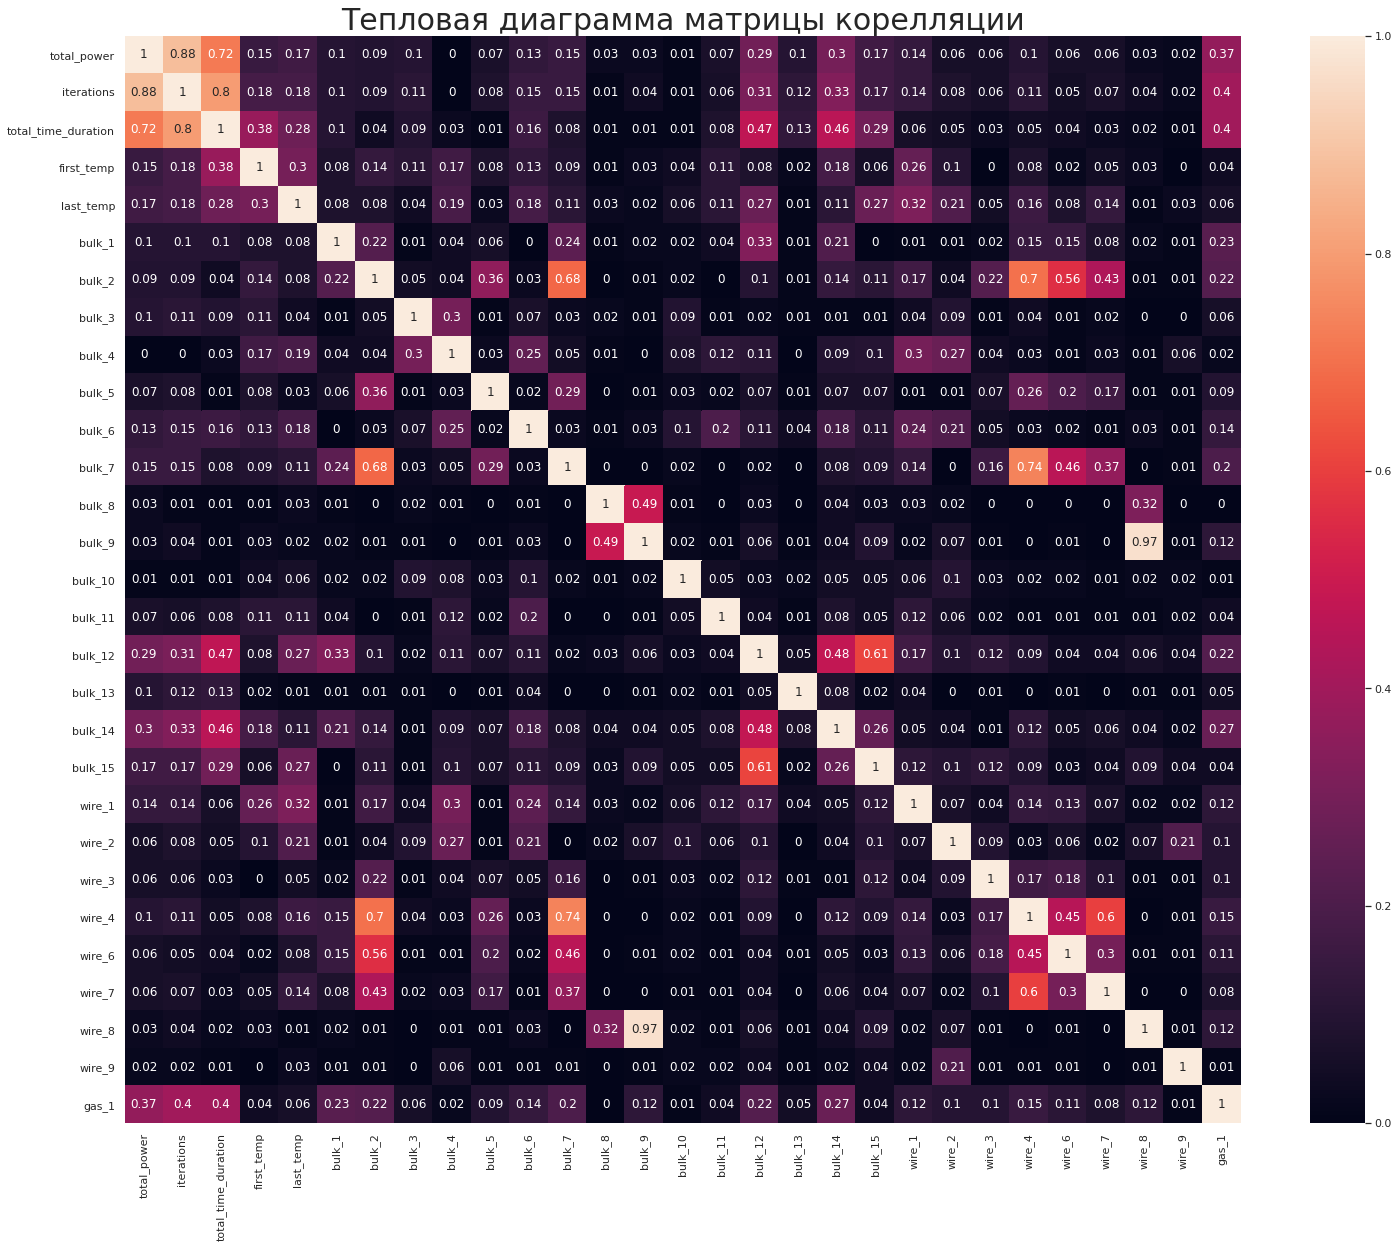

In [143]:
print('\033[1m'+'Мультиколлинеарность между признаками'+'\033[0m')
print('')
plt.figure(figsize=(25,20))
sns.heatmap(abs(data.corr().round(2)),annot=True)
plt.title('Тепловая диаграмма матрицы корелляции',size= 30)
plt.show()
print('')

Наблюдается сильная взаимосвязь между столбцом total power и столбцами iterations и total_time_duration., а также  iterations с total_time_duration. По условию тимлида пороговым значением для удаления является корелляция выше 0.9. 

Такая сильная зависимость наблюдается между wire_8 и bulk_9. Предлагается удалить один из признаков.

In [144]:
data = data.drop('bulk_9', axis=1)

In [145]:
display(data.head())
display(data.info())
display(data.describe())

total_power  iterations  total_time_duration  first_temp  last_temp  \
0     3.718736           5                 1098        1571       1613   
1     2.588349           4                  811        1581       1602   
2     5.019223           5                  655        1596       1599   
3     3.400038           4                  741        1601       1625   
4     2.816980           4                  869        1576       1602   

   bulk_1  bulk_2  bulk_3  bulk_4  bulk_5  bulk_6  bulk_7  bulk_8  bulk_10  \
0     0.0     0.0     0.0    43.0     0.0     0.0     0.0     0.0      0.0   
1     0.0     0.0     0.0    73.0     0.0     0.0     0.0     0.0      0.0   
2     0.0     0.0     0.0    34.0     0.0     0.0     0.0     0.0      0.0   
3     0.0     0.0     0.0    81.0     0.0     0.0     0.0     0.0      0.0   
4     0.0     0.0     0.0    78.0     0.0     0.0     0.0     0.0      0.0   

   bulk_11  bulk_12  bulk_13  bulk_14  bulk_15     wire_1   wire_2  wire_3  \
0      0.0    206.0      0.0    150.0    154.0  60.059998  0.00000     0.0   
1      0.0    206.0      0.0    149.0    154.0  96.052315  0.00000     0.0   
2      0.0    205.0      0.0    152.0    153.0  91.160157  0.00000     0.0   
3      0.0    207.0      0.0    153.0    154.0  89.063515  0.00000     0.0   
4      0.0    203.0      0.0    151.0    152.0  89.238236  9.11456     0.0   

   wire_4  wire_6  wire_7  wire_8  wire_9      gas_1  
0     0.0     0.0     0.0     0.0     0.0  29.749986  
1     0.0     0.0     0.0     0.0     0.0  12.555561  
2     0.0     0.0     0.0     0.0     0.0  28.554793  
3     0.0     0.0     0.0     0.0     0.0  18.841219  
4     0.0     0.0     0.0     0.0     0.0   5.413692

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324 entries, 0 to 2473
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_power          2324 non-null   float64
 1   iterations           2324 non-null   int64  
 2   total_time_duration  2324 non-null   int64  
 3   first_temp           2324 non-null   int64  
 4   last_temp            2324 non-null   int64  
 5   bulk_1               2324 non-null   float64
 6   bulk_2               2324 non-null   float64
 7   bulk_3               2324 non-null   float64
 8   bulk_4               2324 non-null   float64
 9   bulk_5               2324 non-null   float64
 10  bulk_6               2324 non-null   float64
 11  bulk_7               2324 non-null   float64
 12  bulk_8               2324 non-null   float64
 13  bulk_10              2324 non-null   float64
 14  bulk_11              2324 non-null   float64
 15  bulk_12              2324 non-null   f

None

total_power   iterations  total_time_duration   first_temp  \
count  2324.000000  2324.000000          2324.000000  2324.000000   
mean      3.886143     4.696644           808.196644  1587.368761   
std       1.517584     1.606210           340.813828    23.627590   
min       0.331897     1.000000            57.000000  1519.000000   
25%       2.846893     4.000000           581.000000  1571.000000   
50%       3.770584     5.000000           778.000000  1587.000000   
75%       4.769753     6.000000           993.000000  1603.000000   
max      15.288271    16.000000          4189.000000  1660.000000   

         last_temp       bulk_1       bulk_2       bulk_3       bulk_4  \
count  2324.000000  2324.000000  2324.000000  2324.000000  2324.000000   
mean   1593.372633     3.435026     1.425559    47.317126    37.347676   
std      11.207457    12.424463    19.102530    75.238050    58.677890   
min    1541.000000     0.000000     0.000000     0.000000     0.000000   
25%    1587.000000     0.000000     0.000000     0.000000     0.000000   
50%    1593.000000     0.000000     0.000000     0.000000     0.000000   
75%    1598.000000     0.000000     0.000000    80.000000    77.250000   
max    1653.000000   185.000000   325.000000   454.000000   281.000000   

            bulk_5       bulk_6       bulk_7       bulk_8      bulk_10  \
count  2324.000000  2324.000000  2324.000000  2324.000000  2324.000000   
mean      2.645869    22.419535     2.009036     0.021084     5.063683   
std      22.426054    55.792509    30.709089     1.016431    20.938984   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max     603.000000   503.000000   772.000000    49.000000   159.000000   

           bulk_11      bulk_12      bulk_13      bulk_14      bulk_15  \
count  2324.000000  2324.000000  2324.000000  2324.000000  2324.000000   
mean      4.254303   208.597676     1.069707   153.952668   120.078313   
std      22.538843   157.112117    14.250280    81.410544    84.655967   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000   105.000000     0.000000   105.000000     0.000000   
50%       0.000000   206.000000     0.000000   149.000000   107.000000   
75%       0.000000   283.000000     0.000000   204.000000   204.000000   
max     313.000000  1849.000000   305.000000   636.000000   405.000000   

            wire_1       wire_2       wire_3       wire_4       wire_6  \
count  2324.000000  2324.000000  2324.000000  2324.000000  2324.000000   
mean    102.423900    17.613213     3.241876     0.307209     0.980926   
std      43.540975    33.648176    27.972523     4.762842     8.702531   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      73.204559     0.000000     0.000000     0.000000     0.000000   
50%     101.103600     0.000000     0.000000     0.000000     0.000000   
75%     128.075222    23.102560     0.000000     0.000000     0.000000   
max     330.314424   282.780152   385.008668   113.231044   180.454575   

            wire_7       wire_8       wire_9        gas_1  
count  2324.000000  2324.000000  2324.000000  2324.000000  
mean      0.006374     0.311981     0.317795    11.378854  
std       0.205926     4.407419     3.460248     6.397008  
min       0.000000     0.000000     0.000000     0.008399  
25%       0.000000     0.000000     0.000000     7.282534  
50%       0.000000     0.000000     0.000000    10.100687  
75%       0.000000     0.000000     0.000000    14.218487  
max       8.490040   102.762401    62.025600    77.995040

Расмотрим мультикореллиарность еще раз

Мультиколлинеарность между признаками



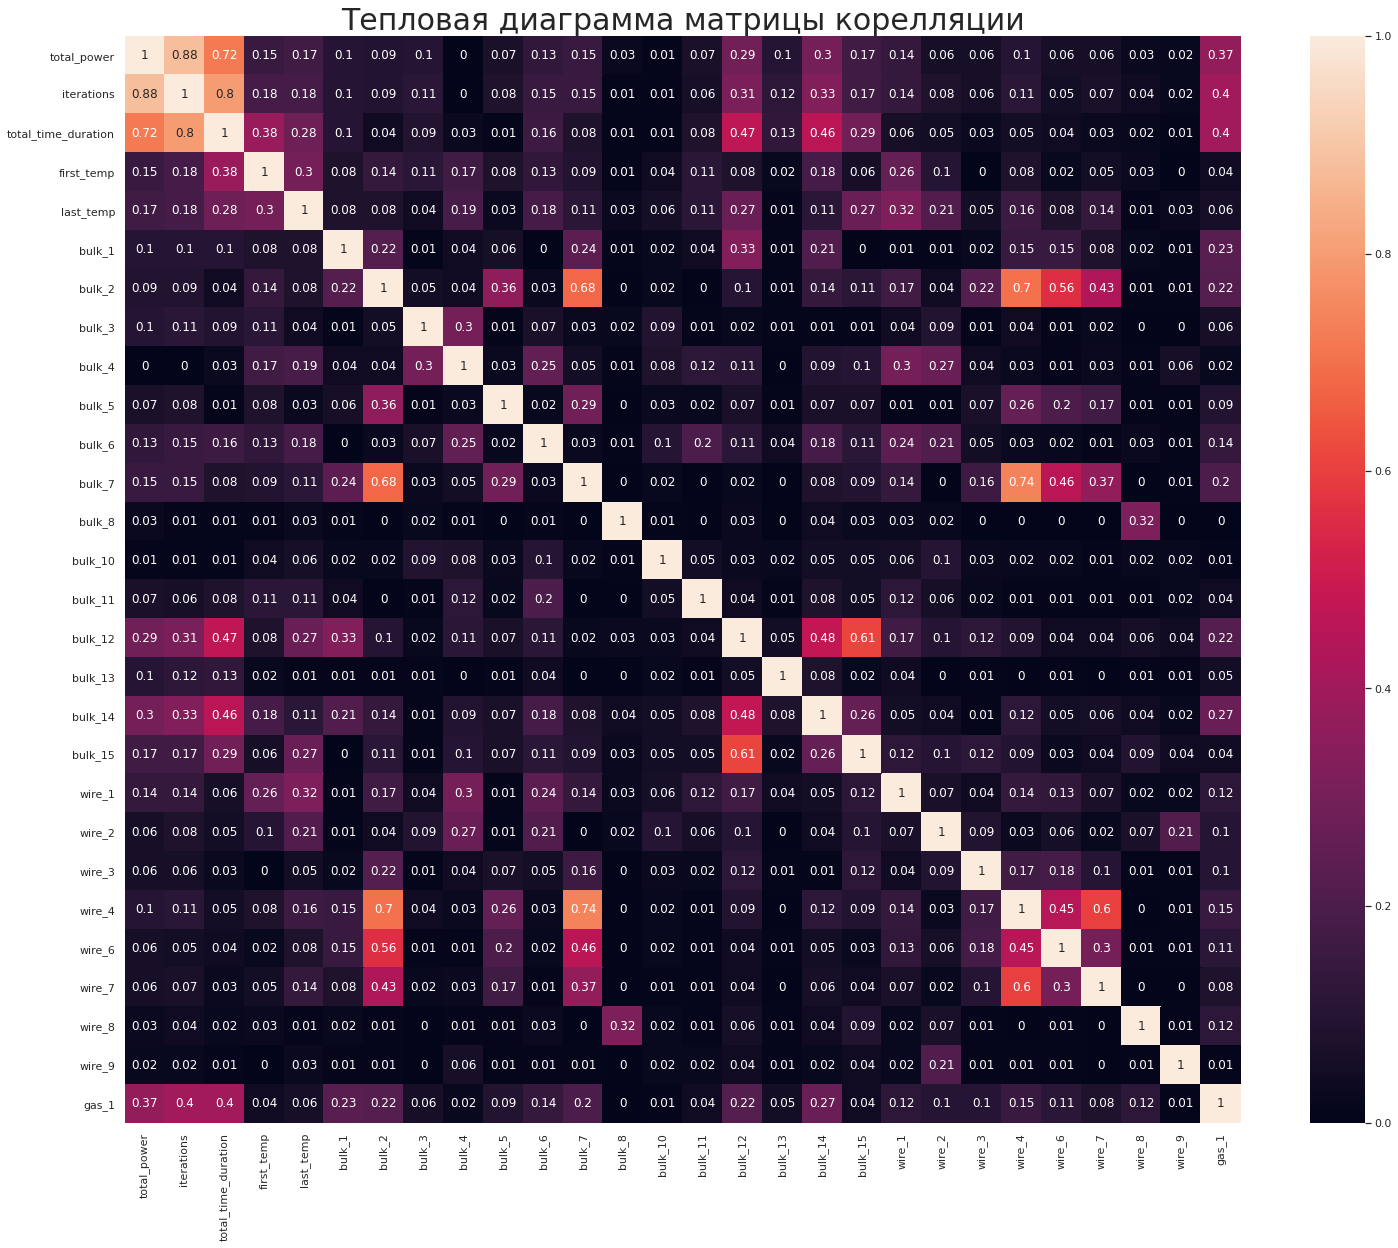

In [146]:
print('\033[1m'+'Мультиколлинеарность между признаками'+'\033[0m')
print('')
plt.figure(figsize=(25,20))
sns.heatmap(abs(data.corr().round(2)),annot=True)
plt.title('Тепловая диаграмма матрицы корелляции',size= 30)
plt.show()
print('')

Кореллиарность выше 0.9 не получили.

В предыдущих пунктах в таблицах data_bulk_new и data_wire_new было большое кол-во пропущенных значений, которые мы заполнили нулями. Рассмотрим столбцы, которые вошли в итоговую data из данных датасетов на кол-во ненулевых значений

In [147]:
count_null = data.loc[:,'bulk_1':'wire_9']

In [148]:
count_null.head()

bulk_1  bulk_2  bulk_3  bulk_4  bulk_5  bulk_6  bulk_7  bulk_8  bulk_10  \
0     0.0     0.0     0.0    43.0     0.0     0.0     0.0     0.0      0.0   
1     0.0     0.0     0.0    73.0     0.0     0.0     0.0     0.0      0.0   
2     0.0     0.0     0.0    34.0     0.0     0.0     0.0     0.0      0.0   
3     0.0     0.0     0.0    81.0     0.0     0.0     0.0     0.0      0.0   
4     0.0     0.0     0.0    78.0     0.0     0.0     0.0     0.0      0.0   

   bulk_11  bulk_12  bulk_13  bulk_14  bulk_15     wire_1   wire_2  wire_3  \
0      0.0    206.0      0.0    150.0    154.0  60.059998  0.00000     0.0   
1      0.0    206.0      0.0    149.0    154.0  96.052315  0.00000     0.0   
2      0.0    205.0      0.0    152.0    153.0  91.160157  0.00000     0.0   
3      0.0    207.0      0.0    153.0    154.0  89.063515  0.00000     0.0   
4      0.0    203.0      0.0    151.0    152.0  89.238236  9.11456     0.0   

   wire_4  wire_6  wire_7  wire_8  wire_9  
0     0.0     0.0     0.0     0.0     0.0  
1     0.0     0.0     0.0     0.0     0.0  
2     0.0     0.0     0.0     0.0     0.0  
3     0.0     0.0     0.0     0.0     0.0  
4     0.0     0.0     0.0     0.0     0.0

Построение общей гистограммы для всех числовых столбцов таблицы count_null



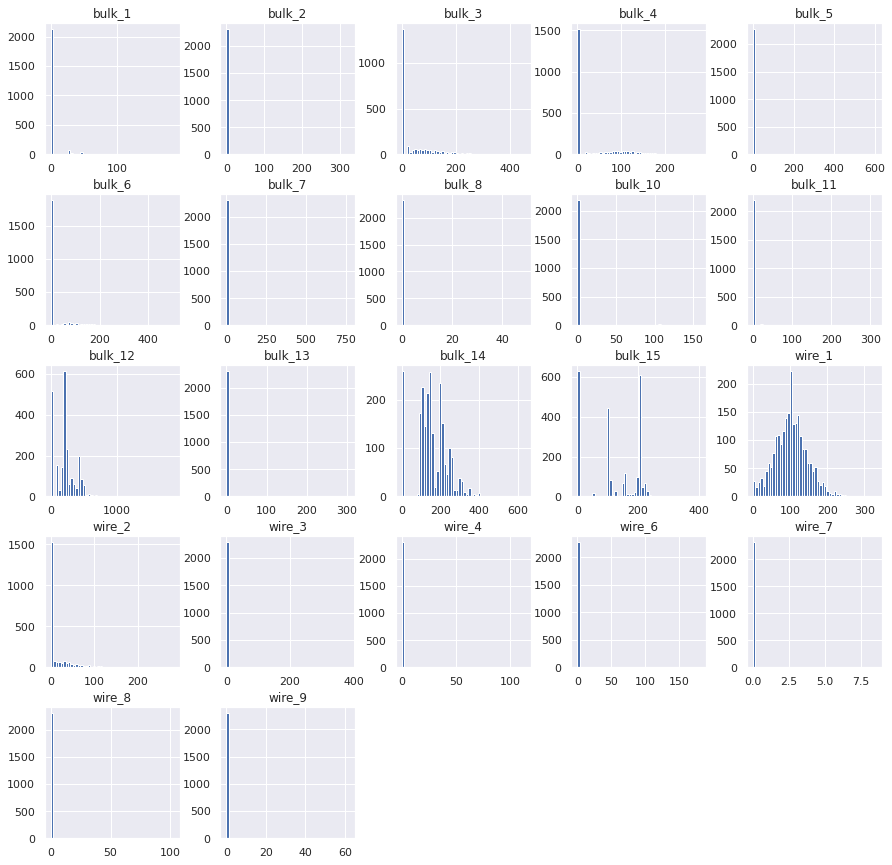

In [149]:
print('\033[1m'+'Построение общей гистограммы для всех числовых столбцов таблицы count_null'+'\033[0m')
print('')
count_null.hist(bins = 50, figsize=(15,15))
plt.show();
print('')

Наблюдаются стобцы в которых большое кол-во нулвых значений. Рассмотрим подробно их распределение.

In [150]:
list_columns = count_null.columns

In [151]:
list_columns

Index(['bulk_1', 'bulk_2', 'bulk_3', 'bulk_4', 'bulk_5', 'bulk_6', 'bulk_7',
       'bulk_8', 'bulk_10', 'bulk_11', 'bulk_12', 'bulk_13', 'bulk_14',
       'bulk_15', 'wire_1', 'wire_2', 'wire_3', 'wire_4', 'wire_6', 'wire_7',
       'wire_8', 'wire_9'],
      dtype='object')

In [152]:
a = []
b = []
c = []
d = []

In [153]:
for value in count_null.columns:
    a.append((count_null[value] == 0).sum())
    b.append((count_null[value] != 0).sum())
    c.append(((count_null[value] == 0).sum()/len(count_null[value]))*100)
    d.append(((count_null[value] != 0).sum()/len(count_null[value]))*100)

In [154]:
d_1 = {'Столбец': list_columns,
     'Кол-во строк с нулевым занчением': a,
     'Кол-во строк с ненулевым занчением': b,
     'Процент строк с нулевым занчением': c,
     'Процент строк с ненулевым занчением': d
     }
pd.DataFrame(data=d_1)

Столбец  Кол-во строк с нулевым занчением  \
0    bulk_1                              2125   
1    bulk_2                              2311   
2    bulk_3                              1366   
3    bulk_4                              1513   
4    bulk_5                              2271   
5    bulk_6                              1887   
6    bulk_7                              2311   
7    bulk_8                              2323   
8   bulk_10                              2181   
9   bulk_11                              2194   
10  bulk_12                               515   
11  bulk_13                              2310   
12  bulk_14                               260   
13  bulk_15                               628   
14   wire_1                                23   
15   wire_2                              1515   
16   wire_3                              2285   
17   wire_4                              2312   
18   wire_6                              2279   
19   wire_7                              2320   
20   wire_8                              2311   
21   wire_9                              2300   

    Кол-во строк с ненулевым занчением  Процент строк с нулевым занчением  \
0                                  199                          91.437177   
1                                   13                          99.440620   
2                                  958                          58.777969   
3                                  811                          65.103270   
4                                   53                          97.719449   
5                                  437                          81.196213   
6                                   13                          99.440620   
7                                    1                          99.956971   
8                                  143                          93.846816   
9                                  130                          94.406196   
10                                1809                          22.160069   
11                                  14                          99.397590   
12                                2064                          11.187608   
13                                1696                          27.022375   
14                                2301                           0.989673   
15                                 809                          65.189329   
16                                  39                          98.321859   
17                                  12                          99.483649   
18                                  45                          98.063683   
19                                   4                          99.827883   
20                                  13                          99.440620   
21                                  24                          98.967298   

    Процент строк с ненулевым занчением  
0                              8.562823  
1                              0.559380  
2                             41.222031  
3                             34.896730  
4                              2.280551  
5                             18.803787  
6                              0.559380  
7                              0.043029  
8                              6.153184  
9                              5.593804  
10                            77.839931  
11                             0.602410  
12                            88.812392  
13                            72.977625  
14                            99.010327  
15                            34.810671  
16                             1.678141  
17                             0.516351  
18                             1.936317  
19                             0.172117  
20                             0.559380  
21                             1.032702

на основании представленной таблицы можно сделать вывод, что в столбце bulk_8 всего одна строка с ненулевым знаением. Значит данный компонент использовался только один раз. Предлагается удалить данный столбец из признаков. также предлагается удалить столбец wire_7. В нем также присутсвует всего 4 значения, что тоже можно посчитать очень малым набором для такого кол-ва данных.

In [155]:
data = data.drop(['wire_7','bulk_8'], axis=1)

In [156]:
display(data.head())
display(data.info())
display(data.describe())

total_power  iterations  total_time_duration  first_temp  last_temp  \
0     3.718736           5                 1098        1571       1613   
1     2.588349           4                  811        1581       1602   
2     5.019223           5                  655        1596       1599   
3     3.400038           4                  741        1601       1625   
4     2.816980           4                  869        1576       1602   

   bulk_1  bulk_2  bulk_3  bulk_4  bulk_5  bulk_6  bulk_7  bulk_10  bulk_11  \
0     0.0     0.0     0.0    43.0     0.0     0.0     0.0      0.0      0.0   
1     0.0     0.0     0.0    73.0     0.0     0.0     0.0      0.0      0.0   
2     0.0     0.0     0.0    34.0     0.0     0.0     0.0      0.0      0.0   
3     0.0     0.0     0.0    81.0     0.0     0.0     0.0      0.0      0.0   
4     0.0     0.0     0.0    78.0     0.0     0.0     0.0      0.0      0.0   

   bulk_12  bulk_13  bulk_14  bulk_15     wire_1   wire_2  wire_3  wire_4  \
0    206.0      0.0    150.0    154.0  60.059998  0.00000     0.0     0.0   
1    206.0      0.0    149.0    154.0  96.052315  0.00000     0.0     0.0   
2    205.0      0.0    152.0    153.0  91.160157  0.00000     0.0     0.0   
3    207.0      0.0    153.0    154.0  89.063515  0.00000     0.0     0.0   
4    203.0      0.0    151.0    152.0  89.238236  9.11456     0.0     0.0   

   wire_6  wire_8  wire_9      gas_1  
0     0.0     0.0     0.0  29.749986  
1     0.0     0.0     0.0  12.555561  
2     0.0     0.0     0.0  28.554793  
3     0.0     0.0     0.0  18.841219  
4     0.0     0.0     0.0   5.413692

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324 entries, 0 to 2473
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_power          2324 non-null   float64
 1   iterations           2324 non-null   int64  
 2   total_time_duration  2324 non-null   int64  
 3   first_temp           2324 non-null   int64  
 4   last_temp            2324 non-null   int64  
 5   bulk_1               2324 non-null   float64
 6   bulk_2               2324 non-null   float64
 7   bulk_3               2324 non-null   float64
 8   bulk_4               2324 non-null   float64
 9   bulk_5               2324 non-null   float64
 10  bulk_6               2324 non-null   float64
 11  bulk_7               2324 non-null   float64
 12  bulk_10              2324 non-null   float64
 13  bulk_11              2324 non-null   float64
 14  bulk_12              2324 non-null   float64
 15  bulk_13              2324 non-null   f

None

total_power   iterations  total_time_duration   first_temp  \
count  2324.000000  2324.000000          2324.000000  2324.000000   
mean      3.886143     4.696644           808.196644  1587.368761   
std       1.517584     1.606210           340.813828    23.627590   
min       0.331897     1.000000            57.000000  1519.000000   
25%       2.846893     4.000000           581.000000  1571.000000   
50%       3.770584     5.000000           778.000000  1587.000000   
75%       4.769753     6.000000           993.000000  1603.000000   
max      15.288271    16.000000          4189.000000  1660.000000   

         last_temp       bulk_1       bulk_2       bulk_3       bulk_4  \
count  2324.000000  2324.000000  2324.000000  2324.000000  2324.000000   
mean   1593.372633     3.435026     1.425559    47.317126    37.347676   
std      11.207457    12.424463    19.102530    75.238050    58.677890   
min    1541.000000     0.000000     0.000000     0.000000     0.000000   
25%    1587.000000     0.000000     0.000000     0.000000     0.000000   
50%    1593.000000     0.000000     0.000000     0.000000     0.000000   
75%    1598.000000     0.000000     0.000000    80.000000    77.250000   
max    1653.000000   185.000000   325.000000   454.000000   281.000000   

            bulk_5       bulk_6       bulk_7      bulk_10      bulk_11  \
count  2324.000000  2324.000000  2324.000000  2324.000000  2324.000000   
mean      2.645869    22.419535     2.009036     5.063683     4.254303   
std      22.426054    55.792509    30.709089    20.938984    22.538843   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max     603.000000   503.000000   772.000000   159.000000   313.000000   

           bulk_12      bulk_13      bulk_14      bulk_15       wire_1  \
count  2324.000000  2324.000000  2324.000000  2324.000000  2324.000000   
mean    208.597676     1.069707   153.952668   120.078313   102.423900   
std     157.112117    14.250280    81.410544    84.655967    43.540975   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     105.000000     0.000000   105.000000     0.000000    73.204559   
50%     206.000000     0.000000   149.000000   107.000000   101.103600   
75%     283.000000     0.000000   204.000000   204.000000   128.075222   
max    1849.000000   305.000000   636.000000   405.000000   330.314424   

            wire_2       wire_3       wire_4       wire_6       wire_8  \
count  2324.000000  2324.000000  2324.000000  2324.000000  2324.000000   
mean     17.613213     3.241876     0.307209     0.980926     0.311981   
std      33.648176    27.972523     4.762842     8.702531     4.407419   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%      23.102560     0.000000     0.000000     0.000000     0.000000   
max     282.780152   385.008668   113.231044   180.454575   102.762401   

            wire_9        gas_1  
count  2324.000000  2324.000000  
mean      0.317795    11.378854  
std       3.460248     6.397008  
min       0.000000     0.008399  
25%       0.000000     7.282534  
50%       0.000000    10.100687  
75%       0.000000    14.218487  
max      62.025600    77.995040

Расмотрим мультикореллиарность еще раз

Мультиколлинеарность между признаками



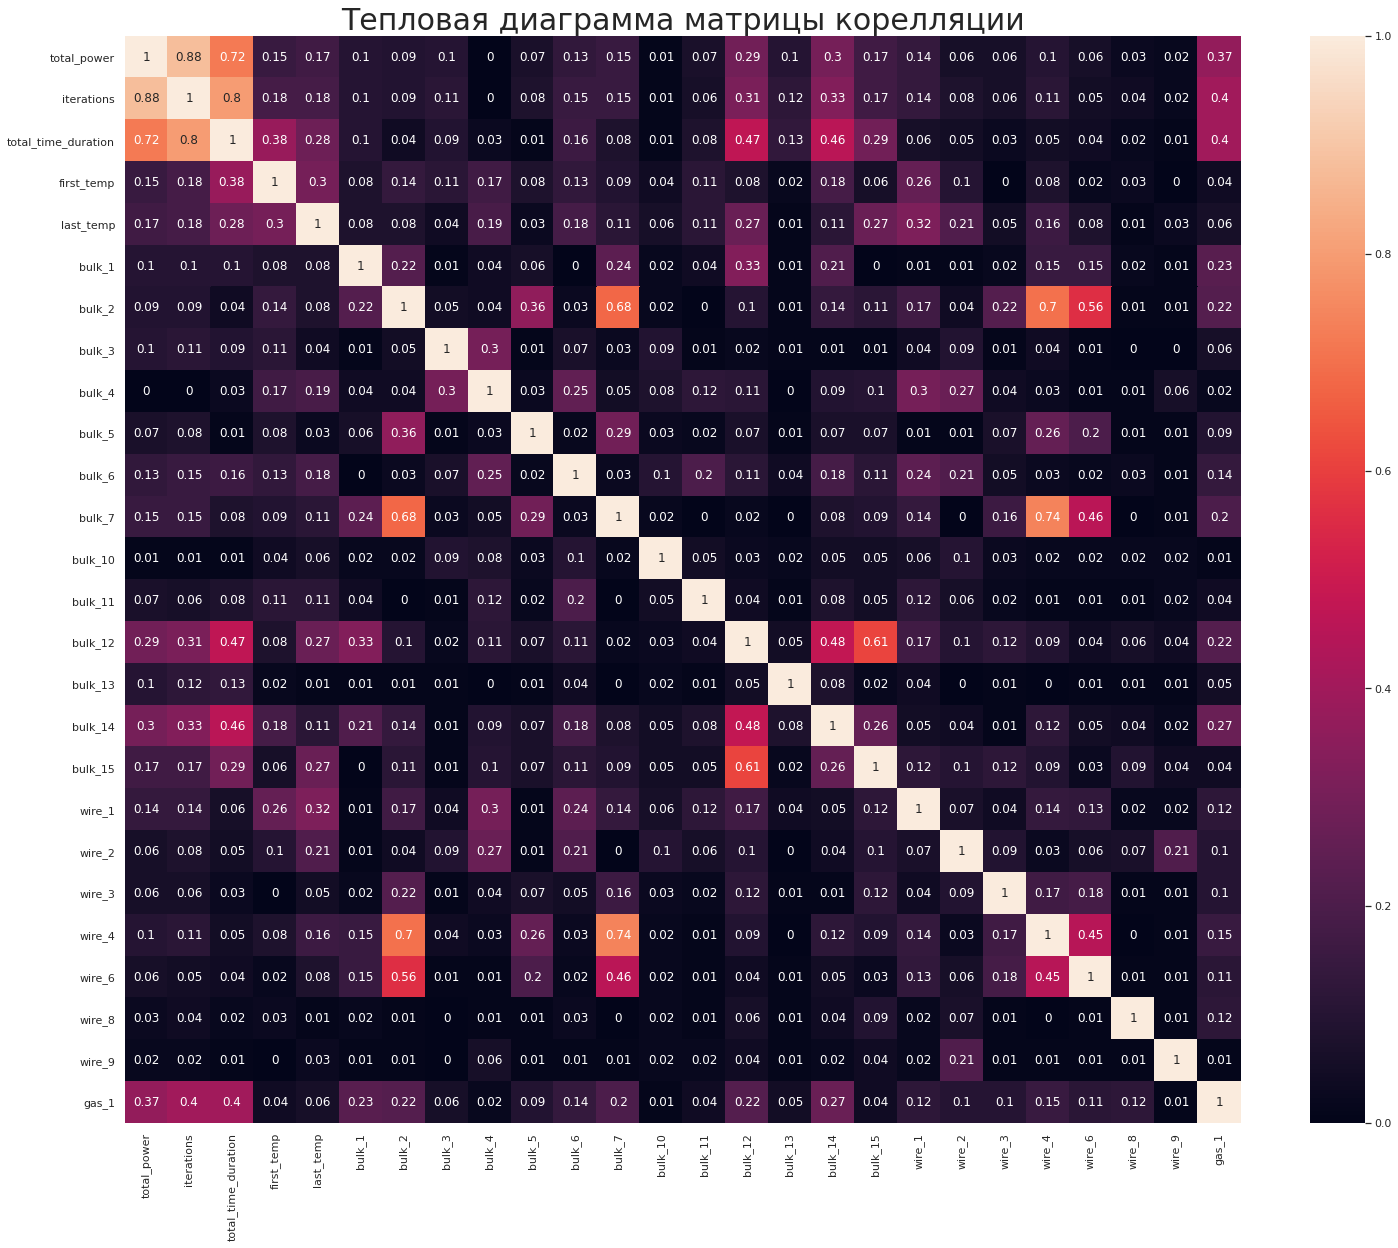

In [157]:
print('\033[1m'+'Мультиколлинеарность между признаками'+'\033[0m')
print('')
plt.figure(figsize=(25,20))
sns.heatmap(abs(data.corr().round(2)),annot=True)
plt.title('Тепловая диаграмма матрицы корелляции',size= 30)
plt.show()
print('')

Кореллиарность выше 0.9 не получили.

###  Выделение признаков и целевого признака

В данном проекте целевым признаком является last_temp

In [158]:
target = data['last_temp']
features = data.drop('last_temp', axis=1)

In [159]:
print(target.shape)
print(features.shape)

(2324,)
(2324, 25)


### Разбиение выборки на обучающую и тестовую 

Выполним разделение собранной нашей выборки на обучающуюся и тестовую. (в соотношения 75:25).

In [160]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.25, random_state=RANDOM_STATE
)

In [161]:
print(X_train.shape)
print(X_test.shape)

(1743, 25)
(581, 25)


In [162]:
print(y_train.shape)
print(y_test.shape)

(1743,)
(581,)


###  Масштабирование данных

In [163]:
numeric = X_train.select_dtypes(exclude='object').columns.to_list()
print(numeric)

['total_power', 'iterations', 'total_time_duration', 'first_temp', 'bulk_1', 'bulk_2', 'bulk_3', 'bulk_4', 'bulk_5', 'bulk_6', 'bulk_7', 'bulk_10', 'bulk_11', 'bulk_12', 'bulk_13', 'bulk_14', 'bulk_15', 'wire_1', 'wire_2', 'wire_3', 'wire_4', 'wire_6', 'wire_8', 'wire_9', 'gas_1']


In [164]:
scaler = StandardScaler()
scaler.fit(X_train[numeric])
X_train[numeric] = scaler.transform(X_train[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])

In [165]:
X_train.head()

total_power  iterations  total_time_duration  first_temp    bulk_1  \
2297    -0.679055   -0.438316            -0.386950   -0.126462 -0.278423   
1557     2.971615    2.644757             1.181323   -0.932628 -0.278423   
893      0.011935    0.178298             1.659384   -0.975058 -0.278423   
45       0.378145    0.178298            -0.366545   -0.593190 -0.278423   
2011     0.012452   -0.438316            -0.655130   -0.508330 -0.278423   

        bulk_2    bulk_3    bulk_4    bulk_5    bulk_6   bulk_7   bulk_10  \
2297 -0.071572 -0.630744  1.724848 -0.113604 -0.419238 -0.06396 -0.241625   
1557 -0.071572  0.183782 -0.619391 -0.113604 -0.419238 -0.06396 -0.241625   
893  -0.071572  2.023035 -0.619391 -0.113604  2.361367 -0.06396 -0.241625   
45   -0.071572 -0.630744 -0.619391 -0.113604  2.627030 -0.06396 -0.241625   
2011 -0.071572  0.078682 -0.619391 -0.113604  1.015342 -0.06396 -0.241625   

       bulk_11   bulk_12   bulk_13   bulk_14   bulk_15    wire_1    wire_2  \
2297 -0.196036 -0.322863 -0.076578 -0.080278 -0.180127 -0.262477 -0.246183   
1557 -0.196036  1.606452 -0.076578  0.564257  1.054773  0.424907  0.069425   
893  -0.196036  1.289131 -0.076578  2.461380  1.031025 -1.291056  0.524593   
45   -0.196036 -1.312907 -0.076578 -1.867952 -1.415027 -0.671854  0.886878   
2011  3.538976 -1.312907 -0.076578  1.196632 -1.415027 -1.062261  0.038411   

        wire_3    wire_4   wire_6    wire_8    wire_9     gas_1  
2297 -0.119171 -0.059751 -0.11876 -0.062681 -0.102043 -0.913752  
1557 -0.119171 -0.059751 -0.11876 -0.062681 -0.102043  0.529208  
893  -0.119171 -0.059751 -0.11876 -0.062681 -0.102043 -1.451546  
45   -0.119171 -0.059751 -0.11876 -0.062681 -0.102043 -0.500446  
2011 -0.119171 -0.059751 -0.11876 -0.062681 -0.102043 -0.103796

In [166]:
X_test.head()

total_power  iterations  total_time_duration  first_temp    bulk_1  \
1675    -0.522062   -0.438316             0.181476   -0.805339 -0.278423   
2281    -0.710402   -1.054931            -0.888331    1.401012 -0.278423   
1623     0.939909    0.794913            -0.480230    0.085687 -0.278423   
1904     1.947405    2.028142             0.306821    1.061573 -0.278423   
667     -0.791730   -1.054931            -1.442182    1.019143 -0.278423   

        bulk_2    bulk_3    bulk_4    bulk_5    bulk_6   bulk_7   bulk_10  \
1675 -0.071572 -0.630744 -0.619391 -0.113604  2.113415 -0.06396 -0.241625   
2281 -0.071572  0.814383  0.527061 -0.113604 -0.419238 -0.06396 -0.241625   
1623 -0.071572  0.604183 -0.619391 -0.113604 -0.419238 -0.06396 -0.241625   
1904 -0.071572  0.144370 -0.619391 -0.113604  0.731968 -0.06396 -0.241625   
667  -0.071572  0.039269 -0.619391 -0.113604 -0.419238 -0.06396 -0.241625   

       bulk_11   bulk_12   bulk_13   bulk_14   bulk_15    wire_1    wire_2  \
1675  3.622909 -0.138817 -0.076578 -0.299177 -0.144505  0.651705  2.165571   
2281 -0.196036 -1.312907 -0.076578 -1.867952 -1.415027 -0.813639 -0.538987   
1623 -0.196036 -1.312907 -0.076578  1.756040 -1.415027  0.559702  3.486380   
1904 -0.196036  2.266481 -0.076578  0.916928  1.054773  0.812888 -0.538987   
667  -0.196036 -0.652878 -0.076578 -0.250533 -0.761955 -0.126041 -0.538987   

        wire_3    wire_4   wire_6    wire_8    wire_9     gas_1  
1675 -0.119171 -0.059751 -0.11876 -0.062681 -0.102043 -0.444587  
2281 -0.119171 -0.059751 -0.11876 -0.062681 -0.102043 -0.623032  
1623 -0.119171 -0.059751 -0.11876 -0.062681 -0.102043  0.703935  
1904 -0.119171 -0.059751 -0.11876 -0.062681 -0.102043  0.699207  
667  -0.119171 -0.059751 -0.11876 -0.062681 -0.102043 -0.848181

###  Вывод 

  В ходе выполнения данного пункта было выполнено следующие действия:
 - Переведены названия столбцов data_arc_new, data_bulk_new, data_gas_new, data_temp_new, data_wire_new в правильному виду
 - Выполнено заполнение пустых строк в столбцах data_bulk_new,data_temp_new, data_wire_new нулевым знаечнием.
 - В столбцах data_arc_new и data_temp_new значения к нужному типу данных.
 - Выполнили удаление неинформативных строк, которые являются очевидными ошибками.
    - Датасет data_arc_new: устранили парти с строками с отрицательным знаечнием в столбце reactive_power
    - Датасет data_temp_new:В данном датасете удалим партии, где в строках встречается температруа с 0 значением и значение температуры ниже 1450.
 - Выделили признаки для модели:
    - так для начале в датасете data_arc_new сформировали столбцы 
        - full_power - Полная мощность вычисленная по столбцам reactive_power и active_power в рамках одной итерации
        - time_duration - длительность подаваемой мощности в рамках одной итерации
    - Затем  была сформирована сводная таблица data_arc_new_pivot по партиям с столбцами:
         - key	- номер партии
         - total_power	- суммарная полная мощность  в партии 
         - iterations	- кол-во итераций в партии 
         - total_time_duration - суммарная длительность подаваемой мощности в партии
    - Из датасета data_temp_new сформировали сводную таблицу  data_temp_new_pivot с столбцами:
         - key	- номер партии
         - first_temp	- температру ковша в начале процесса
         - last_temp - температру ковша в конце процесса
         Предварительно отсортировали данные по столбцу time_measuring по возрастанию.
 - Выполнили объединение нужных данных в одну таблицу data_arc_new_pivot. Объединение происходило по столбцу key. 
     - Объединенная таблицы содержит следующие столбцы: total_power,	iterations,	total_time_duration,	first_temp,	last_temp,	bulk_1,	bulk_2,	bulk_3,	bulk_4,	bulk_5,	bulk_6,	bulk_7,	bulk_8,	bulk_9,	bulk_10,	bulk_11,	bulk_12, bulk_13,	bulk_14,	bulk_15,	wire_1,	wire_2,	wire_3,	wire_4,	wire_6,	wire_7,	wire_8,	wire_9,	gas_1
     - Удалили столбец wire_5, так как в нем все значения равны 0
     - Кол-во строк и столбцов собранной таблицы 2324 и 30
 - Исслдеовали объединенную таблицу на мультикореллиарность. Выыявлена сильная взаимовязь выще 0.9 между столбцами wire_8 и bulk_9.
     - Удален столбец bulk_9 
     - Также удалены столбцы 'wire_7','bulk_8', так как в них 1-4 зачения больше 0.
     - Кол-во строк и столбцов собранной таблицы после очистки выше 2324 и 26 соответсвенно
 
 - Выделили в данной таблице признаки: total_power,	iterations,	total_time_duration,	first_temp,	bulk_1,	bulk_2,	bulk_3,	bulk_4,	bulk_5,	bulk_6,	bulk_7,	bulk_10,	bulk_11,	bulk_12, bulk_13,	bulk_14,	bulk_15,	wire_1,	wire_2,	wire_3,	wire_4,	wire_6,	wire_8,	wire_9,	gas_1
 - Выделил ицелевой признак  last_temp.
 - Выполнили разделение собранной нашей выборки на обучающуюся и тестовую. (в соотношения 75:25).
 - Размер признаков: 
     - на обучающей выборке (1743, 25)
     - на тестовй выборке (581, 25)
 - Размер целевого признака:
     - на обучающей выборке (1743,) 
     - на тестовй выборке (581,)
 - Выполнили масштабирование данных с помощью StandardScaler.

##  Обучение моделей

В данном пункте будут рассмотрены 3 модели машинного обучения:
1. LinearRegression
2. LightGBM
3. CatBoost

In [167]:
all_model =['LinearRegression','LightGBM','CatBoost']

In [168]:
all_parametrs = []

In [169]:
all_mae = []

### LinearRegression

In [170]:
%%time
model_linear = LinearRegression()

CPU times: user 13 µs, sys: 1 µs, total: 14 µs
Wall time: 16 µs


In [171]:
CV = 10

In [172]:
%%time
scores = cross_val_score(
    model_linear, 
    X_train, 
    y_train, 
    cv=CV, 
    n_jobs=-1,
    scoring='neg_mean_absolute_error'
)
                        
linear_score = abs(scores.mean())

CPU times: user 282 ms, sys: 342 ms, total: 624 ms
Wall time: 626 ms


In [173]:
# лучшее значение MAE 
print(f'best_score:',linear_score)

# лучшие гиперпараметры
print(f'best_params: {CV}')

best_score: 6.307243423924263
best_params: 10


In [174]:
all_parametrs.append(f'CV = {CV}')
all_mae.append(linear_score)

### LGBMRegressor 

In [175]:
%%time
model_gbm = lgb.LGBMRegressor()

CPU times: user 34 µs, sys: 3 µs, total: 37 µs
Wall time: 39.8 µs


In [176]:
param_grid_gbm = {
    'num_leaves':[30,50], 
    'learning_rate':[0.2,0.5],
    'random_state':[RANDOM_STATE]
                 }

In [177]:
%%time
gs_gbm = GridSearchCV(
    model_gbm,
    param_grid=param_grid_gbm,
    scoring='neg_mean_absolute_error')

CPU times: user 20 µs, sys: 2 µs, total: 22 µs
Wall time: 25 µs


In [178]:
%%time
gs_gbm.fit(X_train, y_train)

CPU times: user 7min 8s, sys: 8.84 s, total: 7min 17s
Wall time: 7min 23s


GridSearchCV(estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.2, 0.5], 'num_leaves': [30, 50],
                         'random_state': [50623]},
             scoring='neg_mean_absolute_error')

In [179]:
# лучшее значение MAE 
print(f'best_score: {gs_gbm.best_score_ * -1}')

# лучшие гиперпараметры
print(f'best_params: {gs_gbm.best_params_}')

best_score: 6.578474022914608
best_params: {'learning_rate': 0.2, 'num_leaves': 30, 'random_state': 50623}


In [180]:
all_parametrs.append(gs_gbm.best_params_)
all_mae.append(gs_gbm.best_score_ * -1)

### CatBoostRegressor

In [181]:
%%time
model_catboost = CatBoostRegressor(
    verbose=False,
    loss_function='MAE')

CPU times: user 119 µs, sys: 3 µs, total: 122 µs
Wall time: 131 µs


In [182]:
param_grid_catboost = {
    'depth'         : [6,8,10],
    'learning_rate' : [0.01,0.02,0.1],
    'iterations'    : [20,50],
    'random_state'  : [RANDOM_STATE]
}

In [183]:
%%time
gs_catboost = GridSearchCV(
    model_catboost,
    param_grid=param_grid_catboost,
    scoring='neg_mean_absolute_error')

CPU times: user 23 µs, sys: 1 µs, total: 24 µs
Wall time: 27.7 µs


In [184]:
%%time
gs_catboost.fit(X_train, y_train)

CPU times: user 43.1 s, sys: 618 ms, total: 43.7 s
Wall time: 1min 47s


GridSearchCV(estimator=<catboost.core.CatBoostRegressor object at 0x7f2d5bc21070>,
             param_grid={'depth': [6, 8, 10], 'iterations': [20, 50],
                         'learning_rate': [0.01, 0.02, 0.1],
                         'random_state': [50623]},
             scoring='neg_mean_absolute_error')

In [185]:
# лучшее значение МАЕ 
print(f'best_score: {gs_catboost.best_score_ * -1}')

# лучшие гиперпараметры
print(f'best_params: {gs_catboost.best_params_}')

best_score: 6.279571165441586
best_params: {'depth': 6, 'iterations': 50, 'learning_rate': 0.1, 'random_state': 50623}


In [186]:
all_parametrs.append(gs_catboost.best_params_)
all_mae.append(gs_catboost.best_score_ * -1)

### Сравнение моделей

In [187]:
result_1 = pd.DataFrame([all_model,
                        all_parametrs,
                        all_mae], 
                        index=['model',
                               'best_parametrs',
                               'mae'
                              ]
                       )

In [188]:
pd.options.display.max_colwidth = 0
result_1.T

model  \
0  LinearRegression   
1  LightGBM           
2  CatBoost           

                                                                best_parametrs  \
0  CV = 10                                                                       
1  {'learning_rate': 0.2, 'num_leaves': 30, 'random_state': 50623}               
2  {'depth': 6, 'iterations': 50, 'learning_rate': 0.1, 'random_state': 50623}   

        mae  
0  6.307243  
1  6.578474  
2  6.279571

### Выводы

На основе приведенных расчетов лучшей оказалсь у модели СatBoost с гипермпараметром 
best_params: {'depth': 6, 'iterations': 50, 'learning_rate': 0.1, 'random_state': 50623}. Она в дальнейшем будет проверена на тестовой выборке

## Проверка лучшей модели на тестовой выборке

### Лучшая модель

In [189]:
model_cat_best = CatBoostRegressor(depth=6, 
                                   iterations = 50,
                                   learning_rate = 0.1, 
                                   loss_function = 'MAE', 
                                   verbose=False,
                                   random_state = RANDOM_STATE
                                  )

model_cat_best.fit(X_train,y_train)
predictions = model_cat_best.predict(X_test)
print('MAE на тестовой выборке:', mean_absolute_error(predictions,y_test))

MAE на тестовой выборке: 6.484210545372362


### Контсантная модель

Оценим адекватность модели относительно среднего значения

In [190]:
dummy = DummyRegressor(strategy = 'mean')
dummy.fit(X_train, y_train)
predict = dummy.predict(X_test)
final_score_dummy = mean_absolute_error(y_test,predict)
print('МАЕ константной модели на тестовой выборке:', final_score_dummy)

МАЕ константной модели на тестовой выборке: 8.121556301428965


### Исследование важности признаков

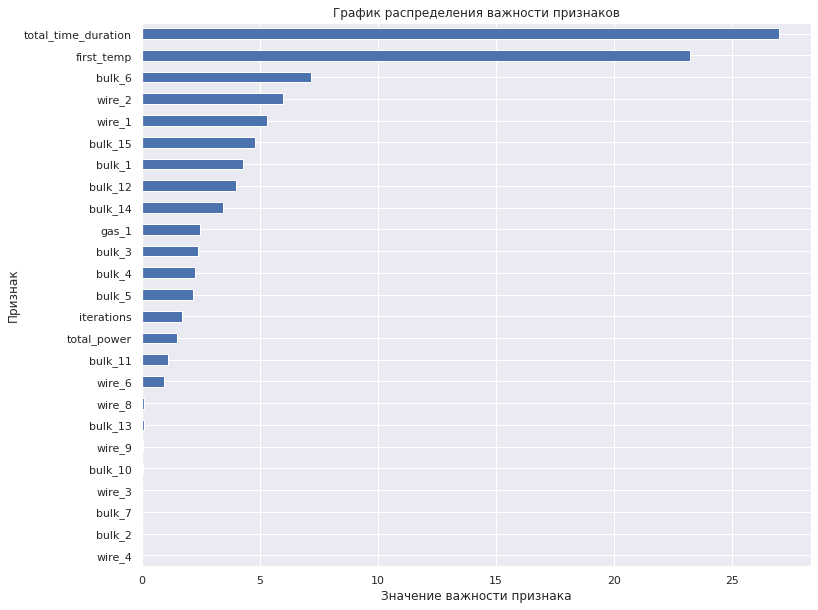

In [192]:
(pd.DataFrame(model_cat_best.feature_importances_,
                      index=features.columns).sort_values(by=0)
                                         .plot(kind='barh', grid=True,
                                               figsize=(12,10), legend=False))
plt.title('График распределения важности признаков')
plt.xlabel('Значение важности признака')
plt.ylabel('Признак');

Как можно наблюдать длительность подавайемой энергии и изначальная температура являются наиболее важными приззнаками

### Выводы

 По итогу данного исследование МАЕ на catboost на тестовой выборке дало значение 6.484210545372362, что меньше 6.8, являющимся нашим условием. Относительно константной модели знаечение тоже оказалось меньше.
 Следовательно работа выполнена.
 Важными признаками можно выделить длительность водаваемой энергии и изначальная температура

## Общий вывод по работе

По проекту нужно построить модель, которая предскажет температуру стали. Данная модель необходима для металлургического комбината. Комбинат решил оптимизировать производственные расходы за счет уменьшения потребления электроэнергии на этапе обработки металла.

Для достижения поставленной цели были поставлены следующие шаги:

**Шаг 1**

На данном этапе были загружены датафреймы:

- `data_arc_new.csv` — данные об электродах;
- `data_bulk_new.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time_new.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas_new.csv` — данные о продувке сплава газом;
- `data_temp_new.csv` — результаты измерения температуры;
- `data_wire_new.csv` — данные о проволочных материалах (объём);
- `data_wire_time_new.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.


По выведеным данным можно сказать следующее:

1. data_arc_new
- Строк: 14876. Столбцов: 5
- Кол-во столбцов с пропусками: 0. 
- Уникальные дупликаты отсутсвуют
- Кол-во партий: 3214
- Значения в столбцах "Начало нагрева дугой" и "Конец нагрева дугой" необходимо будет перевести в datetime
- Данные представлены за май-сентябрь 2019 года. По представленными датам и времени можно вычислить длительность нагрева дугой для каждого дйствия в партии и кол-во итераций в партии.
- Наблюдаются аномальные значения. Так в реактивной мощности всречаются аномальные значения вплодь до -715.479924. Для реактивной мощности в нашем случае это не подходит.Вероятно это ошибка измерения и партии с значением ниже нуля необходимо будет удалить
- необходимо будет столбцы все переименовать на англ язык.
- необходимо будет рассчитать полную мощность 


2. data_bulk_new
- датасет содержит  3129 строк и 16 столбцами
- В датасете присутсвует большое кол-во пропусков. Вероятно значения некоторых видов сыпучих материалов не добавлялось в партию. И следовательно пустые значения можно будет заполнить 0.
- Дубликаты также отсутсвуют
- Кол-во партий: 3129
- Аномальные значения не наблюдаются.
- столбцы не записаны по правилам хорошего тона. Надо будет их скорректировать.

3. data_gas_new
- датасет содержит  3239 строк и 2 столбца
- Пропуски в датасете отсутсвуют
- Дубликаты также отсутсвуют
- Кол-во партий: 3129
- Аномальные значения не наблюдаются.
- Данные распределены равномерно.
- необходимо будет столбец "Газ 1" переименовать.

4. data_temp_new
- датасет содержит  18092 строк и 3 столбца
- В датасете присутсвует пропуски. Вероятно датчик не фиксировал температуру. Данные партии необходимо будет удалить. Стоит обратить внимание, что пропуски активно начали возникать с 2500 парти
- - Температура плавления стали находится в диапазоне от 1450 до 1535°С. Следовательно все температуры ниже 1450 необходимо отсеч.
- Дубликаты также отсутсвуют
- Кол-во партий: 3216
- Столбцы "Температура" и "Время замера" необходимо будет переименовать
- Столбец "Время замера" измеить тип данных на datetime, а "Температура" можно перевести к целочисленному типу данных

5. data_wire_new
- датасет содержит  3081 строк и 10 столбцов
- В датасете присутсвует большое кол-во пропусков. Вероятно некоторые виды проволочных материалов не добавлялось в партию. Данные можно заполнить 0 
- Дубликаты также отсутсвуют
- Кол-во партий: 3081
- Аномальные значения не наблюдаются.
- столбцы не записаны по правилам хорошего тона. Надо будет их скорректировать.


data_bulk_time_new и data_wire_time_new оказались не информативными и было принято решение от них отказаться.
Замечено, что во всех данных столбцы не записаны по правилам хорошего тона. Надо будет их скорректировать.

**Шаг 2**

 В ходе выполнения данного пункта было выполнено следующие действия:
 - Переведены названия столбцов data_arc_new, data_bulk_new, data_gas_new, data_temp_new, data_wire_new в правильному виду
 - Выполнено заполнение пустых строк в столбцах data_bulk_new,data_temp_new, data_wire_new нулевым знаечнием.
 - В столбцах data_arc_new и data_temp_new значения к нужному типу данных.
 - Выполнили удаление неинформативных строк, которые являются очевидными ошибками.
    - Датасет data_arc_new: устранили парти с строками с отрицательным знаечнием в столбце reactive_power
    - Датасет data_temp_new:В данном датасете удалим партии, где в строках встречается температруа с 0 значением и значение температуры ниже 1450.
 - Выделили признаки для модели:
    - так для начале в датасете data_arc_new сформировали столбцы 
        - full_power - Полная мощность вычисленная по столбцам reactive_power и active_power в рамках одной итерации
        - time_duration - длительность подаваемой мощности в рамках одной итерации
    - Затем  была сформирована сводная таблица data_arc_new_pivot по партиям с столбцами:
         - key	- номер партии
         - total_power	- суммарная полная мощность  в партии 
         - iterations	- кол-во итераций в партии 
         - total_time_duration - суммарная длительность подаваемой мощности в партии
    - Из датасета data_temp_new сформировали сводную таблицу  data_temp_new_pivot с столбцами:
         - key	- номер партии
         - first_temp	- температру ковша в начале процесса
         - last_temp - температру ковша в конце процесса
         Предварительно отсортировали данные по столбцу time_measuring по возрастанию.
 - Выполнили объединение нужных данных в одну таблицу data_arc_new_pivot. Объединение происходило по столбцу key. 
     - Объединенная таблицы содержит следующие столбцы: total_power,	iterations,	total_time_duration,	first_temp,	last_temp,	bulk_1,	bulk_2,	bulk_3,	bulk_4,	bulk_5,	bulk_6,	bulk_7,	bulk_8,	bulk_9,	bulk_10,	bulk_11,	bulk_12, bulk_13,	bulk_14,	bulk_15,	wire_1,	wire_2,	wire_3,	wire_4,	wire_6,	wire_7,	wire_8,	wire_9,	gas_1
     - Удалили столбец wire_5, так как в нем все значения равны 0
     - Кол-во строк и столбцов собранной таблицы 2324 и 30
 - Исслдеовали объединенную таблицу на мультикореллиарность. Выыявлена сильная взаимовязь выще 0.9 между столбцами wire_8 и bulk_9.
     - Удален столбец bulk_9 
     - Также удалены столбцы 'wire_7','bulk_8', так как в них 1-4 зачения больше 0.
     - Кол-во строк и столбцов собранной таблицы после очистки выше 2324 и 26 соответсвенно
 
 - Выделили в данной таблице признаки: total_power,	iterations,	total_time_duration,	first_temp,	bulk_1,	bulk_2,	bulk_3,	bulk_4,	bulk_5,	bulk_6,	bulk_7,	bulk_10,	bulk_11,	bulk_12, bulk_13,	bulk_14,	bulk_15,	wire_1,	wire_2,	wire_3,	wire_4,	wire_6,	wire_8,	wire_9,	gas_1
 - Выделил ицелевой признак  last_temp.
 - Выполнили разделение собранной нашей выборки на обучающуюся и тестовую. (в соотношения 75:25).
 - Размер признаков: 
     - на обучающей выборке (1743, 25)
     - на тестовй выборке (581, 25)
 - Размер целевого признака:
     - на обучающей выборке (1743,) 
     - на тестовй выборке (581,)
 - Выполнили масштабирование данных с помощью StandardScaler.
 
 
 **Шаг 3**
 
 - Обучены модели: LinearRegression, CatBoostRegressor, LGBMRegressor. Значения перебирались с помощью GridSearch. 

Получены следующие гиперпараметры и метрики MAE:


| Модель            | Гиперпараметры                                                                | MAE      |
| :---              | :----                                                                         | :---     |
| LinearRegression  | CV = 10	                                                                    | 6.307243 |
| LGBMRegressor     | {'learning_rate': 0.2, 'num_leaves': 30, 'random_state': 50623}               | 6.578474 |
| CatBoostRegressor | {'depth': 6, 'iterations': 50, 'learning_rate': 0.1, 'random_state': 50623}   | 6.279571 |



 - На основе приведенных расчетов лучшей оказалсь модель СatBoost с гипермпараметром 
     - best_params: {'depth': 6, 'iterations': 50, 'learning_rate': 0.1, 'random_state': 50623}.
     
**Шаг 4**

   - MAE на тестовой выборке лучшей модели: 6.484210545372362
   - Оценка адекватности модели с помощью контсантной модели. МАЕ константной модели на тестовой выборке: 8.121556301428965
   - MAE на тестовой выборке меньше 6.8. Что означет что условие проекта выполнено. Относительно константной модели знаечение тоже оказалось меньше.
   - На основе анализа важности признаков модели-победителя  можно выделить длительность водаваемой энергии (total_time_duration) и изначальная температура(first_temp)

## Итоговый отчет

* 		**Какие пункты плана были выполнены, а какие — нет. Почему?**
    - в шаге 2  был пункт "Выполним удаление неинформативных строк, которые являются очевидными ошибками. При удалении строки фиксируем информацию есть ли связь с другими таблицами и в других таблицах данную связь тоже удаляем." Из данного пункта не была выполнена вторая его часть, так как данное действие выполнялось в результате объединения таблиц с помощью join.
    - Также в данном шаге дополнительно к плану выполнено исследование признаков на мультикоррелиарность. И столбцы с значением корреелиальрности выше 0.9 были удалены.
    - в шаге 3 пропущен этап "Проверим на тестовой выборке", так как он выполнялся далее в 4 шаге.
    - также в шаге 4 добавлен анализ важности признаков модели-победителя. 
    - все оставшиеся пункты плана выполнены


* 		**Какие трудности возникли и как вы их преодолели?**
    - трудностей не возникло 
    
    
* 		**Какие ключевые шаги в решении задачи вы выделили?**
    - Анализ данных ( выявление необходимых дальнейших действий  )
    - Предобработка данных (заполнение пустых строк нулем, перевод столбцов к нужному типу данных)
    - Создание столбца полная мощность, заменяющего активную и реактивную мощность
    - Создание столбца длительность подаваемой энергии, заменяющего "Начало нагрева дугой" и "Конец нагрева дугой" 
    - создание столбца кол-во и итераций в партии
    - удаление партий с температурой ниже 1450 градусов до объединения таблиц и создания сводной таблицы по первой и последней темпертаруе в партии
    - Объединение все столбцов.Формирование признаков ( масштабирование признавков с помощью StandardScaler) 
    - Проверка признаков на мультикоррелиарность
    - Разбиение выборки на обучающую и тестовую в соотношении 75:25
    - Обучение моделей ( с использованеи cross-valid и GridSearchCV)
    - Выявление лучшей модели
    - Оценка адекватности на константной модели
    - Анализа важности признаков модели-победителя
    
    
* 		**Какие признаки использовали для обучения модели и какая предобработка этих признаков была выполнена?**
    - Выделили в данной таблице признаки: total_power,	iterations,	total_time_duration,	first_temp,	bulk_1,	bulk_2,	bulk_3,	bulk_4,	bulk_5,	bulk_6,	bulk_7,	bulk_10,	bulk_11,	bulk_12, bulk_13,	bulk_14,	bulk_15,	wire_1,	wire_2,	wire_3,	wire_4,	wire_6,	wire_8,	wire_9,	gas_1
    - Выделили целевой признак  last_temp
    
Предобработка:
- удаление партий с отрицательными знаечниями в реактивной мощности
- заполнение пустых строк нулями.
- удаление партий с температурой ниже 1450 градусов до объединения таблиц и создания сводной таблицы по первой и последней темпертаруе в партии
- удаление одного из признаков между которыми корреляция выше 0.9
- удаление стобцов с сыпучими и проволочными материалами в которых ненулеых строк всего 0-4.


* 		**Какая ваша итоговая модель, какие у неё гиперпараметы и какое качество?**
    - Модель: СatBoost
    - best_params: {'depth': 6, 'iterations': 50, 'learning_rate': 0.1, 'random_state': 50623}.
    - MAE на обучающей выборке:6.279571
    - MAE на тестовой выборке: 6.484210545372362

Вид кода обучения модели с лучшими гиперпараметрами:

```python
model_cat_best = CatBoostRegressor(depth=6, 
                                   iterations = 50,
                                   learning_rate = 0.1, 
                                   loss_function = 'MAE', 
                                   verbose=False,
                                   random_state = RANDOM_STATE
                                  )

model_cat_best.fit(X_train,y_train)
```

* 		**Рекомендации по улучшению решения**
 - Попробовать провести исследование с учетом объединения признака total_power и total_time_duration за счет их перемножения. 
 - поиследовать дополнительно выбросы и избавится от них, если необходимо еще меньше сделать получаемую метрику.